## **Step 1: Loading Data**

In [ ]:
import pandas as pd
import numpy as np
import os
import datetime as dt
from sklearn.decomposition import PCA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

output_dir_path = '/content/drive/My Drive/DSC_201/Results/'

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DSC_201/REM.csv')

In [ ]:
data.head()

,Date,Close,High,Low,Open,Volume,MACD,ATR,MFI,RSI,...,VIX,USDX,EFFR,UNRATE,UMCSENT,CPI,IPI,HPI,MR,BY10
0,2007-12-03,150.369995,151.539993,148.589996,151.539993,0,3.552184,4.679423,100.0,53.361877,...,23.610001,75.930000,4.52,5.0,75.5,211.445,102.3074,173.339,6.10,3.895
1,2007-12-04,146.330002,150.279999,146.220001,150.279999,0,3.470452,4.641606,100.0,44.320134,...,23.790001,75.690002,4.50,5.0,75.5,211.445,102.3074,173.339,6.10,3.889
2,2007-12-05,151.690002,151.740005,146.389999,146.389999,0,2.939289,4.696492,100.0,55.788225,...,22.530001,76.410004,4.31,5.0,75.5,211.445,102.3074,173.339,6.10,3.911
3,2007-12-06,156.660004,156.690002,150.940002,151.630005,0,2.093172,4.771743,100.0,63.771526,...,20.959999,76.379997,4.49,5.0,75.5,211.445,102.3074,173.339,5.96,3.998
4,2007-12-07,155.509995,158.240005,155.139999,156.600006,0,1.498145,4.652333,100.0,60.838501,...,20.850000,76.290001,4.41,5.0,75.5,211.445,102.3074,173.339,5.96,4.120


In [ ]:
# Convert the 'Date' column to a datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')

In [ ]:
data1 = data.set_index('Date')
data1

,Close,High,Low,Open,Volume,MACD,ATR,MFI,RSI,MA10,...,VIX,USDX,EFFR,UNRATE,UMCSENT,CPI,IPI,HPI,MR,BY10
Date,,,,,,,,,,,,,,,,,,,,,
2007-12-03,150.369995,151.539993,148.589996,151.539993,0,3.552184,4.679423,100.000000,53.361877,145.901003,...,23.610001,75.930000,4.52,5.0,75.5,211.445,102.3074,173.339,6.10,3.895
2007-12-04,146.330002,150.279999,146.220001,150.279999,0,3.470452,4.641606,100.000000,44.320134,145.862003,...,23.790001,75.690002,4.50,5.0,75.5,211.445,102.3074,173.339,6.10,3.889
2007-12-05,151.690002,151.740005,146.389999,146.389999,0,2.939289,4.696492,100.000000,55.788225,146.660002,...,22.530001,76.410004,4.31,5.0,75.5,211.445,102.3074,173.339,6.10,3.911
2007-12-06,156.660004,156.690002,150.940002,151.630005,0,2.093172,4.771743,100.000000,63.771526,148.038002,...,20.959999,76.379997,4.49,5.0,75.5,211.445,102.3074,173.339,5.96,3.998
2007-12-07,155.509995,158.240005,155.139999,156.600006,0,1.498145,4.652333,100.000000,60.838501,148.961002,...,20.850000,76.290001,4.41,5.0,75.5,211.445,102.3074,173.339,5.96,4.120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,275.019989,276.850006,274.070007,276.410004,57354900,-3.554793,4.988096,67.466224,73.884200,267.449997,...,22.840000,105.449997,2.33,3.7,58.2,295.620,104.6544,303.472,5.30,2.606
2022-08-02,271.440002,275.869995,271.260010,274.910004,71356000,-3.604843,4.961088,66.731670,61.447368,268.462997,...,23.930000,106.239998,2.33,3.7,58.2,295.620,104.6544,303.472,5.30,2.741
2022-08-03,272.549988,275.109985,272.500000,273.010010,70311100,-3.691521,4.868866,73.280430,63.637145,269.725995,...,21.950001,106.510002,2.33,3.7,58.2,295.620,104.6544,303.472,5.30,2.748


## **Step 2: Data Exploration**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_theme(style="whitegrid")
# plt.style.use('ggplot')

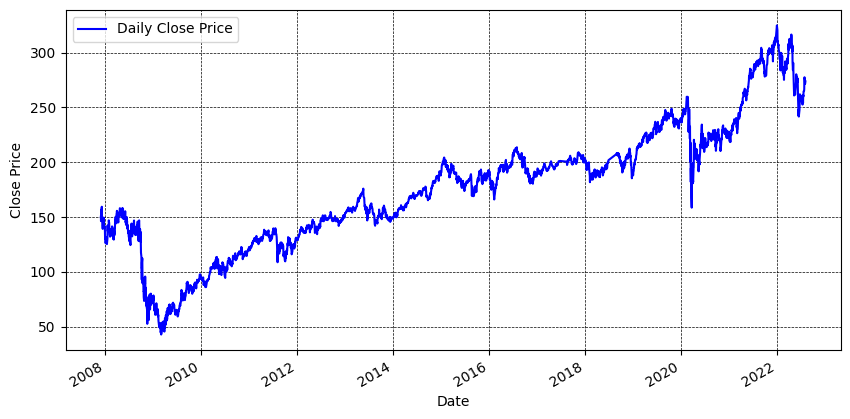

In [ ]:
df = data1.copy()
fig, ax = plt.subplots(figsize=(10, 5))

# Set both figure and axes background to white
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Plot the data
data1['Close'].plot(ax=ax, color='blue', linewidth=1.5)

# Enable grid lines
ax.grid(True, which='both',
        color='k',
        linestyle='--',
        linewidth=0.5)

# Customize plot
plt.legend(['Daily Close Price'], loc='best')
plt.xlabel('Date', color='k')
plt.ylabel('Close Price', color='k')
plt.rcParams["axes.edgecolor"] = "0.15"
plt.rcParams["axes.linewidth"] = 1.5
plt.rc('xtick', labelsize=10, color='k')
plt.rc('ytick', labelsize=10, color='k')

# Save the figure
# fig.savefig(output_dir_path + "original_Passengers_data.png",
#             dpi=600, facecolor='white')

# Show the plot
plt.show()

In [ ]:
X = data1.drop('Close', axis=1)

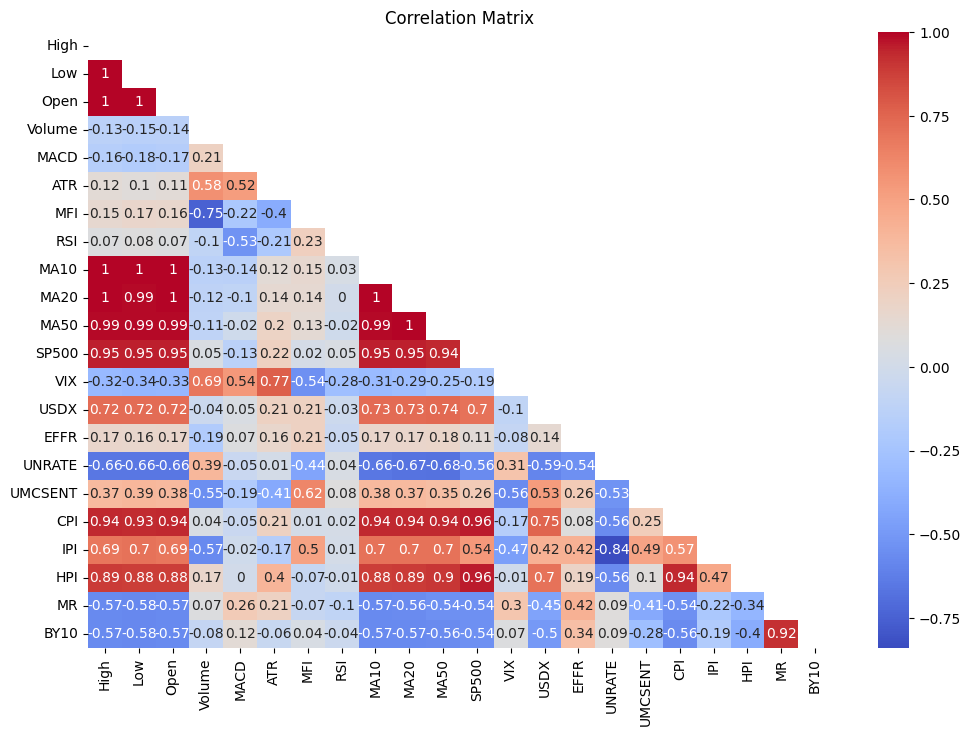

In [ ]:
#plot lower triangular correlation heatmap for X with two decimal values
plt.figure(figsize=(12, 8))
# sns.heatmap(X.corr().round(decimals=2), annot=True, cmap='coolwarm')
# remove grid
plt.grid(False)
# make background color white
plt.rcParams["axes.facecolor"] = "white"
# remove box
plt.box(False)
mask=np.triu(np.ones_like(X.corr()))
sns.heatmap(X.corr().round(decimals=2), annot=True, cmap='coolwarm', mask=mask)
plt.title("Correlation Matrix")
plt.show()

### **Descriptive Statistics**

In [ ]:
data1.describe()

,Close,High,Low,Open,Volume,MACD,ATR,MFI,RSI,MA10,...,VIX,USDX,EFFR,UNRATE,UMCSENT,CPI,IPI,HPI,MR,BY10
count,3567.000000,3567.000000,3567.000000,3567.000000,3.567000e+03,3567.000000,3567.000000,3567.000000,3567.000000,3567.000000,...,3567.000000,3567.000000,3567.000000,3567.000000,3567.000000,3567.000000,3567.000000,3567.000000,3567.000000,3567.000000
mean,174.974354,176.370886,173.425697,174.971862,3.239631e+07,-0.213231,3.111129,74.194426,53.500230,174.812136,...,20.678778,87.949078,0.617903,6.437903,80.208102,239.632623,98.043131,182.710138,4.179282,2.380623
std,57.766173,57.836603,57.694692,57.766702,3.713372e+07,2.610380,1.699256,25.839340,15.203483,57.574976,...,9.591658,8.800241,0.856881,2.234536,12.970719,19.566756,4.848964,41.929439,0.835244,0.815440
min,42.950001,43.450001,40.470001,42.950001,0.000000e+00,-7.191297,0.806594,12.228054,6.042427,46.569001,...,9.140000,71.330002,0.040000,3.500000,50.000000,211.398000,84.727700,133.997000,2.650000,0.499000
25%,136.644997,137.945000,134.794998,136.570000,0.000000e+00,-1.737864,2.032761,50.592216,42.596780,136.697000,...,14.240000,80.110001,0.090000,4.700000,70.800000,224.806000,95.745500,147.938000,3.600000,1.789000
50%,177.410004,178.800003,175.940002,177.339996,2.655520e+07,-0.569587,2.597558,72.860414,53.777562,177.477000,...,18.010000,89.309998,0.150000,6.000000,79.300000,237.231000,99.078200,169.193000,4.060000,2.347000
75%,207.724998,208.915001,206.474998,207.555000,5.461140e+07,0.827156,3.686547,100.000000,64.784552,207.056000,...,23.925000,96.084999,0.910000,8.200000,92.000000,252.862000,101.763200,205.387000,4.660000,2.924500
max,324.750000,326.970001,323.859985,325.429993,2.315290e+08,20.392969,13.191450,100.000000,92.682279,319.348001,...,82.690002,108.540001,4.520000,14.700000,101.400000,295.620000,104.757700,308.422000,6.630000,4.281000


## **Step 3: Writing Supporting functions**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import time
import math
import ast

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    return (np.mean(np.abs((y_true - y_pred)/(y_true))*100))

def calculate_scores(y_true, y_pred):
  rmse = math.sqrt(mean_squared_error(y_true, y_pred))
  #R2_score = r2_score(y_true, y_pred)
  R = np.corrcoef(y_true, y_pred)
  #mae = mean_absolute_error(y_true, y_pred)
  mape = mean_absolute_percentage_error(y_true, y_pred)
  #dic = {'rmse':rmse, 'R2_score': R2_score, 'R':R[0,1], 'mae': mae, 'mape': mape}
  dic = {'rmse':rmse, 'R': R[0,1], 'mape': mape}
  return (dic)

In [ ]:
def data_split(data, split = 0.2):

  # creating training and test data
  l1   = int(len(data) * (1- split))
  l2    = len(data) - l1
  train  = data[0:l1]
  test   = data[l1:len(data)]
  return train, test

In [ ]:
def min_max_transform(data, feature_range=(0, 1)):
   scaler = MinMaxScaler(feature_range)
   return scaler.fit_transform(data)

def min_max_inverse_transform(data_scaled, min_original, max_original):
    return min_original +  data_scaled*(max_original - min_original)

In [ ]:
## returns the X and Y data
def DatasetCreation(X, y, time_step = 5):
   DataX, DataY = [], []
   for i in range(len(X)- time_step -1):
         a = X[i:(i+ time_step)]
         DataX.append(a)
         DataY.append(y[i + time_step])

   return np.array(DataX), np.array(DataY)

In [ ]:
def write_dic_to_file(dic_name, file_name):
  file = open(file_name, 'w')
  file.write(str(dic_name))
  file.close()



def read_dic_from_file(file_name):
  file = open(file_name, "r")
  contents = file.read()
  dictionary = ast.literal_eval(contents)
  file.close()
  return dictionary

In [ ]:
def loss_plot(model_output, file_name):

  loss =  model_output.history['loss']
  val_loss = model_output.history['val_loss']

  epochs = model_output.epoch
  fig = plt.figure(figsize = (8,5))
  plt.subplot(111)
  plt.plot(epochs, loss, color = 'red', marker = "s")
  plt.plot(epochs, val_loss, color = 'blue', marker = "^")
  plt.legend(["loss", "validation loss"], loc="best")
  plt.xlabel("epoch")
  plt.ylabel("loss")
  plt.title("Training and Validation Loss")

  fig.savefig(file_name, dpi = 600)
  plt.show()

## **Step 4: Input Preparation**

In [ ]:
X= data1
y = data1['Close']

In [ ]:
pca = PCA(n_components=0.99)
X_pca = pca.fit_transform(X)

In [ ]:
X_pca.shape

(3567, 1)

In [ ]:
X_train, X_test = data_split(X_pca, split=0.2)
y_train, y_test = data_split(y, split=0.2)

In [ ]:
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

In [ ]:
y_train.shape, y_test.shape

((2853, 1), (714, 1))

In [ ]:
y_train_min, y_train_max = y_train.min(), y_train.max()
y_test_min, y_test_max = y_test.min(), y_test.max()

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2853, 1), (714, 1), (2853, 1), (714, 1))

In [ ]:
X_train

array([[-32396313.09316635],
       [-32396313.09317774],
       [-32396313.09314707],
       ...,
       [ 24522486.90870075],
       [ 24468386.90872825],
       [ 13586586.90880062]])

### **Normalize Train and Test Data Separately**

In [ ]:
X_train_scaled = min_max_transform(X_train)
X_test_scaled = min_max_transform(X_test)

y_train_scaled = min_max_transform(y_train)
y_test_scaled = min_max_transform(y_test)

### **Inverse Trainsform of the y data**

In [ ]:

y_train_original = min_max_inverse_transform(y_train_scaled, y_train.min(), y_train.max())
y_test_original = min_max_inverse_transform(y_test_scaled, y_test.min(), y_test.max())

### **Creating X and y data for supervised learning**

In [ ]:
X_train, y_train = DatasetCreation(X_train_scaled, y_train_scaled, time_step = 5)
X_test, y_test = DatasetCreation(X_test_scaled, y_test_scaled, time_step = 5)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2847, 5, 1), (708, 5, 1), (2847, 1), (708, 1))

### **Making Sure the input-output shpae for the Models**

In [ ]:
print(X_train.shape )# must be in (num_observations, time_step, number_features)
print(X_test.shape )# must be in (num_observations, time_step, number_features)
print(y_train.shape )# must be 1-D array of lentgh = num_observations
print(y_test.shape )# must be 1-D array of lentgh = num_observations

(2847, 5, 1)
(708, 5, 1)
(2847, 1)
(708, 1)


In [ ]:
# a 2D array(matrix) of shape:  (time_step, num_features)
X_train[0]

array([[2.78455037e-12],
       [2.73533973e-12],
       [2.86778934e-12],
       [2.98489011e-12],
       [2.95871661e-12]])

In [ ]:
y_train[0]

array([0.56896552])

## **Step 5: Building LSTM and GRU Models**

In [ ]:
import tensorflow as tf

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense, Input, BatchNormalization, Dropout
from keras import optimizers
from keras.optimizers.schedules import ExponentialDecay
from keras.callbacks import EarlyStopping

### **LSTM Model**

In [ ]:
def Build_LSTM_Model(layers,
                    time_step,
                    num_features,
                    optimizer='Adam',
                    initial_learning_rate=0.01,
                    decay_steps=5,
                    decay_rate=0.95):

    model = Sequential()
    model.add(Input(shape=(time_step, num_features)))

    for i, units in enumerate(layers):  # Use enumerate for index and value
        return_sequences = (i < len(layers) - 1)  # return True/False, if True, proceeds

        model.add(LSTM(units, return_sequences=return_sequences))

    model.add(Dense(1, activation='linear'))

    # Learning rate scheduler
    learning_rate = ExponentialDecay(
        initial_learning_rate=initial_learning_rate,
        decay_steps=decay_steps,
        decay_rate=decay_rate,
        staircase=True
    )

    # Optimizer selection
    optimizer_mapping = {
        'Adam': optimizers.Adam,
        'Adagrad': optimizers.Adagrad,
        'Nadam': optimizers.Nadam,
        'Adadelta': optimizers.Adadelta,
        'RMSprop': optimizers.RMSprop
    }

    if optimizer in optimizer_mapping:
        opt = optimizer_mapping[optimizer](learning_rate=learning_rate)
    else:
        raise ValueError(f"Unsupported optimizer: {optimizer}. Choose from: {list(optimizer_mapping.keys())}")  # Raise error for unsupported optimizers

    model.compile(loss='mean_squared_error', optimizer=opt)

    return model

In [ ]:
# Sample code to run the model:
optimizers_names = ['Adam']
time_step = 5
num_features = 1
layers = [16]

In [ ]:
# Build and compile the model
model = Build_LSTM_Model(
    layers,
    time_step,
    num_features,
    optimizer=optimizers_names[0]
)

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 16)                  │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,169 (4.57 KB)

 Trainable params: 1,169 (4.57 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Note make sure the data is the training data only!
# X_train = X_train_scaled
# y_train is not the scaled one

def LSTM_Hyper_Parameter_Tuning(layers,
                                X_train,
                                y_train,
                                time_step,
                                split,
                                optimizers_names,
                                initial_learning_rate,
                                batch_sizes,
                                epochs,
                                num_replicates=2):
    # Data Preparation
    y_train_min, y_train_max = y_train.min(), y_train.max()


    # X_train_scaled = min_max_transform(X_train)
    y_train_scaled = min_max_transform(y_train)



    X_train1, X_val = data_split(X_train, split)
    y_train, y_val = data_split(y_train_scaled, split)

    num_features = X_train.shape[1]


    # Hyperparameter Tuning
    best_avg_rmse = float('inf')  # Use infinity to start
    all_avg_rmse = np.zeros((len(optimizers_names), len(batch_sizes)))
    best_hyper_parameters = {"model": layers, "optimizer": None, "batch_size": None, "best_avg_rmse": None}

    for opt_idx, optimizer_name in enumerate(optimizers_names):
        for bs_idx, batch_size in enumerate(batch_sizes):
            collect_rmse = []

            for i in range(num_replicates):
                print(f"Running for optimizer {optimizer_name}, batch size {batch_size}, replicate {i + 1}")

                model = Build_LSTM_Model(layers,
                                         time_step,
                                         num_features,
                                         optimizer_name,
                                         initial_learning_rate=initial_learning_rate)

                callback = EarlyStopping(monitor='val_loss', patience=5)
                history = model.fit(X_train1, y_train,
                                    batch_size=batch_size,
                                    epochs=epochs,
                                    validation_data=(X_val, y_val),
                                    callbacks=[callback],
                                    verbose=1)

                val_pred = model.predict(X_val).ravel()
                # min_val, max_val = y_train.min(), train_data[target_var].max()

                val_pred_original = min_max_inverse_transform(val_pred, y_train_min, y_train_max)
                y_val_original = min_max_inverse_transform(y_val, y_train_min, y_train_max)
                collect_rmse.append(math.sqrt(mean_squared_error(y_val_original, val_pred_original)))

            avg_rmse = np.mean(np.array(collect_rmse))
            all_avg_rmse[opt_idx][bs_idx] = avg_rmse

            if avg_rmse < best_avg_rmse:
                best_avg_rmse = avg_rmse
                best_hyper_parameters = {
                    "model": layers, "optimizer": optimizer_name, "batch_size": batch_size, "best_avg_rmse": best_avg_rmse
                }

    # Output and Results
    file_name = output_dir_path + "lstm-" + str(layers[0]) + "N-hyperparameter_tuning__results" + ".txt"
    write_dic_to_file(best_hyper_parameters, file_name)  # Just write best_hyper_parameters

    print("Best hyperparameters (LSTM): \n", best_hyper_parameters)
    print("All average RMSE (LSTM): \n", all_avg_rmse)

    return best_hyper_parameters

In [ ]:
#these are fixed
time_step = 5
test_split = 0.2
val_split =  0.15
optimizers_names = ['Adam', 'Nadam', 'Adagrad']
batch_sizes =  [8, 16, 32]
initial_learning_rate=0.01
epochs = 30
num_replicates = 2

In [ ]:
layers = [8]
lstm_N8_best_hyper_parameters = LSTM_Hyper_Parameter_Tuning(
                                  layers,
                                  X_train,
                                  y_train,
                                  time_step,
                                  val_split,
                                  optimizers_names,
                                  initial_learning_rate=initial_learning_rate,
                                  batch_sizes=batch_sizes,
                                  epochs=epochs,
                                  num_replicates=num_replicates
                              )

print(lstm_N8_best_hyper_parameters)

In [ ]:
#{'model': [8], 'optimizer': 'Nadam', 'batch_size': 16, 'best_avg_rmse': 0.2868527052986293}

In [ ]:
layers = [16]
lstm_N16_best_hyper_parameters = LSTM_Hyper_Parameter_Tuning(
                                  layers,
                                  X_train,
                                  y_train,
                                  time_step,
                                  val_split,
                                  optimizers_names,
                                  initial_learning_rate=initial_learning_rate,
                                  batch_sizes=batch_sizes,
                                  epochs=epochs,
                                  num_replicates=num_replicates
                              )

print(lstm_N16_best_hyper_parameters)

In [ ]:
# {'model': [16], 'optimizer': 'Nadam', 'batch_size': 8, 'best_avg_rmse': 0.2876010740540223}

In [ ]:
layers = [32]
lstm_N32_best_hyper_parameters = LSTM_Hyper_Parameter_Tuning(
                                  layers,
                                  X_train,
                                  y_train,
                                  time_step,
                                  val_split,
                                  optimizers_names,
                                  initial_learning_rate=initial_learning_rate,
                                  batch_sizes=batch_sizes,
                                  epochs=epochs,
                                  num_replicates=num_replicates
                              )

print(lstm_N32_best_hyper_parameters)

In [ ]:
#{'model': [32], 'optimizer': 'Adam', 'batch_size': 8, 'best_avg_rmse': 0.2873680136019986}

In [ ]:
layers = [64]
lstm_N64_best_hyper_parameters = LSTM_Hyper_Parameter_Tuning(
                                  layers,
                                  X_train,
                                  y_train,
                                  time_step,
                                  val_split,
                                  optimizers_names,
                                  initial_learning_rate=initial_learning_rate,
                                  batch_sizes=batch_sizes,
                                  epochs=epochs,
                                  num_replicates=num_replicates
                              )

print(lstm_N64_best_hyper_parameters)

In [ ]:
#{'model': [64], 'optimizer': 'Nadam', 'batch_size': 32, 'best_avg_rmse': 0.2873803673683729}

In [ ]:
layers = [128]
lstm_N128_best_hyper_parameters = LSTM_Hyper_Parameter_Tuning(
                                  layers,
                                  X_train,
                                  y_train,
                                  time_step,
                                  val_split,
                                  optimizers_names,
                                  initial_learning_rate=initial_learning_rate,
                                  batch_sizes=batch_sizes,
                                  epochs=epochs,
                                  num_replicates=num_replicates
                              )

print(lstm_N128_best_hyper_parameters)

In [ ]:
#{'model': [128], 'optimizer': 'Nadam', 'batch_size': 32, 'best_avg_rmse': 0.2877799091395421}

In [ ]:
lstm_best_hyper_parameters =  [ ['Nadam', 16],
                                ['Nadam', 8],
                                ['Adam', 8],
                                ['Nadam', 32],
                                ['Nadam', 32]
                                ]

In [ ]:
def LSTM_Model_Implementation(layers,
                             hyper_parameters,
                             data,
                             time_step = 5,
                             test_split = 0.2,
                             initial_learning_rate=0.01,
                             epochs = 5,
                             num_replicates = 2):
    # data transformation
    print("Progress: Performing data preparation steps.......\n")

    # creating training and test data
    X= data
    y = data['Close']

    pca = PCA(n_components=0.99)
    X_pca = pca.fit_transform(X)

    X_train, X_test = data_split(X_pca, split=0.2)
    y_train0, y_test0 = data_split(y, split=0.2)

    y_train_original = np.array(y_train0).reshape(-1, 1)
    y_test_original = np.array(y_test0).reshape(-1, 1)

    y_train_min, y_train_max = y_train_original.min(), y_train_original.max()
    y_test_min, y_test_max = y_test_original.min(), y_test_original.max()

    X_train_scaled = min_max_transform(X_train)
    X_test_scaled = min_max_transform(X_test)

    y_train_scaled = min_max_transform(y_train_original)
    y_test_scaled = min_max_transform(y_test_original)

    X_train, y_train = DatasetCreation(X_train_scaled, y_train_scaled, time_step = 5)
    X_test, y_test = DatasetCreation(X_test_scaled, y_test_scaled, time_step = 5)

    y_train_original = min_max_inverse_transform(y_train, y_train_min, y_train_max)
    y_test_original = min_max_inverse_transform(y_test, y_test_min, y_test_max)

    print(X_train.shape )# must be in (num_observations, time_step, number_features)
    print(X_test.shape )# must be in (num_observations, time_step, number_features
    print(y_train.shape )# must be 1-D array of lentgh = num_observations
    print(y_test.shape )# must be 1-D array of lentgh = num_observations
    print(y_test_original.shape)





    # train_data, test_data = data_split(data, test_split)

    num_features = X_pca.shape[1]

    # min_train, max_train  = train_data[target_var].min(), train_data[target_var].max()
    # min_test, max_test   =    test_data[target_var].min(), test_data[target_var].max()


    # train_data_scaled  =  min_max_transform(train_data)
    # test_data_scaled   = min_max_transform(test_data)


    # X_train, y_train  =   DatasetCreation(train_data_scaled, time_step)
    # X_test, y_test    =   DatasetCreation(test_data_scaled, time_step)

    # y_train_original  =  min_max_inverse_transform(y_train, min_train, max_train) #in original scale
    # y_test_original  =  min_max_inverse_transform(y_test, min_test, max_test) #in original scale


    # arrays for collecting test scores
    rmse_array = np.zeros(num_replicates)
    mape_array = np.zeros(num_replicates)
    R_array    = np.zeros(num_replicates)
    elapsed_time_array = np.zeros(num_replicates)

    models_history = []
    train_predictions = []
    test_predictions = []

    for i in range(num_replicates):

      print(f'Program is running for {i} replicate\n')

      model =  Build_LSTM_Model(layers,
                        time_step,
                        num_features,
                        optimizer = hyper_parameters[0],
                        initial_learning_rate = initial_learning_rate)

      callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience= 5)
      # This callback will stop the training when there is no improvement in
      # the loss for three consecutive epochs
      start = time.time()
      history = model.fit(X_train, y_train,
                          batch_size = hyper_parameters[1],
                          epochs= epochs, callbacks=[callback], verbose = 1)
      end = time.time()
      elapsed_time = end - start

      models_history.append(history)


      # Getting train and test prediction in original scales
      train_pred   =  min_max_inverse_transform(model.predict(X_train).ravel(),
                                                y_train_min, y_train_max).reshape(-1,1)
      test_pred    =  min_max_inverse_transform(model.predict(X_test).ravel(),
                                                y_test_min, y_test_max).reshape(-1,1)

      print(f'train pred shape {train_pred.shape}')
      print(test_pred.shape)

      train_predictions.append(train_pred)
      test_predictions.append(test_pred)

      # Calculating performance scores

      scores =   calculate_scores(y_test_original,test_pred)

      rmse_array[i] =  scores['rmse']
      mape_array[i] =  scores['mape']
      R_array[i] = scores['R']
      elapsed_time_array[i] = elapsed_time

    min_index = rmse_array.argmin()
    best_rmse = rmse_array[min_index]
    mape_with_best_rmse = mape_array[min_index]
    R_with_best_rmse =  R_array[min_index]
    elapsed_time_with_best_rmse = elapsed_time_array[min_index]

    train_predictions_with_best_rmse = train_predictions[min_index]
    test_predictions_with_best_rmse = test_predictions[min_index]

    loss_with_best_rmse = models_history[min_index].history['loss']

    #val_loss_with_best_rmse = models_history[min_index].history['val_loss']

    # Collecting important results
    performance_metrics =  {

                        'scores': {'rmse': rmse_array,
                                    'mape': mape_array,
                                    'R': R_array,
                                    'elapsed_time': elapsed_time_array
                                    },

                        'minimums': {'rmse': np.min(rmse_array),
                                      'mape': np.min(mape_array),
                                      'R': np.min(R_array),
                                      'elapsed_time': np.min(elapsed_time_array)
                                      },

                        'avg_scores':  {'rmse': np.mean(rmse_array),
                                        'mape': np.mean(mape_array),
                                        'R': np.mean(R_array),
                                        'elapsed_time': np.mean(elapsed_time_array)
                                        },

                          'stds':      { 'rmse': np.std(rmse_array),
                                          'mape': np.std(mape_array),
                                          'R': np.std(R_array),
                                          'elapsed_time': np.std(elapsed_time_array)
                                        },

                        'maximums': {'rmse': np.max(rmse_array),
                                     'mape': np.max(mape_array),
                                     'R': np.max(R_array),
                                     'elapsed_time': np.max(elapsed_time_array)
                                     }

                  }




    model_with_best_rmse = {

                            'replicate': min_index,
                            'rmse': best_rmse,
                            #'mae': mae_with_best_rmse,
                            'mape': mape_with_best_rmse,
                            #'R2': R2_with_best_rmse,
                            'R':  R_with_best_rmse,
                            'elapsed_time': elapsed_time_with_best_rmse,
                            'train_predictions':train_predictions_with_best_rmse,
                            'test_predictions': test_predictions_with_best_rmse,
                            #'y_train':y_train_original,
                            #'y_test': y_test_original,
                            'loss':loss_with_best_rmse,
                             #'val_loss': val_loss_with_best_rmse
                            }

     # Collecting hyperparameters
    hyper_parameters = {'layers': layers,
                        'model_specific_hyper_parameters': hyper_parameters,
                       'epochs': epochs,
                       'time_step':time_step,
                       'num_replicates': num_replicates,
                       'test_split':test_split
                        }


     # Collecting all the outputs together
    output_dictionary = {'hyper_parameters': hyper_parameters,
                        'performance_metrics': performance_metrics,
                         'best_model': model_with_best_rmse,
                       }


    pd.DataFrame(y_train_original).to_csv(output_dir_path+'y_train.csv')
    pd.DataFrame(y_test_original).to_csv(output_dir_path+'y_test.csv')

    print("Progress: All works are done successfully, congratulations!!\n")
    return output_dictionary

In [ ]:
hyper_parameters = ['Adam', 16]
layers = [16]
initial_learning_rate =0.01


lstm_output = LSTM_Model_Implementation(layers,
                                      hyper_parameters,
                                      data1,
                                      time_step = 5,
                                      test_split = 0.2,
                                      epochs = 3,
                                      initial_learning_rate=initial_learning_rate,
                                      num_replicates = 2)

lstm_output

Progress: Performing data preparation steps.......

(2847, 5, 1)
(708, 5, 1)
(2847, 1)
(708, 1)
(708, 1)
Program is running for 0 replicate

Epoch 1/3
178/178 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0752
Epoch 2/3


KeyboardInterrupt: 

In [ ]:
def Multiple_LSTM_Models(hidden_layers,
                        hyper_parameters,
                        data,
                        time_step = 12,
                        test_split = 0.2,
                        initial_learning_rate=0.01,
                        epochs = 30,
                        num_replicates = 2):

  num_models = len(hidden_layers)

  # collect all scores
  rmse = []
  mape = []
  R = []
  elapsed_time = []

  # collect all avg scores
  avg_rmse = []
  avg_mape = []
  avg_R = []
  avg_elapsed_time = []

  # iteratively update the best rmse and the corresponding model
  best_avg_rmse = float('inf')
  best_rmse = float('inf')
  best_model_hidden_layers = None
  best_model_output = None

  for i in range(num_models):
    print("Running model with hidden neurons: ", hidden_layers[i])

    print("\n")

    print("Best Hyper_parameters used: ", hyper_parameters[i])

    print("\n")

    output = LSTM_Model_Implementation(hidden_layers[i],
                                      hyper_parameters[i],
                                      data,
                                      time_step,
                                      test_split,
                                      initial_learning_rate,
                                      epochs,
                                      num_replicates)

    rmse.append(output['performance_metrics']['scores']['rmse'])
    mape.append(output['performance_metrics']['scores']['mape'])
    R.append(output['performance_metrics']['scores']['R'])
    elapsed_time.append(output['performance_metrics']['scores']['elapsed_time'])

    avg_rmse.append(output['performance_metrics']['avg_scores']['rmse'])
    avg_mape.append(output['performance_metrics']['avg_scores']['mape'])
    avg_R.append(output['performance_metrics']['avg_scores']['R'])
    avg_elapsed_time.append(output['performance_metrics']['avg_scores']['elapsed_time'])

    if avg_rmse[i] < best_avg_rmse:
      best_avg_rmse = avg_rmse[i]
      best_rmse = output['best_model']['rmse']
      best_model_hidden_layers = hidden_layers[i]
      best_model_output = output


  rmse = np.array(rmse)
  mape = np.array(mape)
  R =  np.array(R)

  # Collecting all  scores

  performance_metrics = {

       'scores':  {'layers': hidden_layers,
                   'rmse': rmse,
                   'mape': mape,
                   'R':R,
                   'elapsed_time': elapsed_time },

       'avg_scores':  pd.DataFrame({'layers': hidden_layers,
                                    'rmse': np.array(avg_rmse),
                                    'mape': np.array(avg_mape), 'R':np.array(avg_R),
                                    'elapsed_time':np.array(avg_elapsed_time)}),

       'stds':     pd.DataFrame({'layers': hidden_layers,
                                 'rmse': np.std(rmse, axis = 1),
                                 'mape': np.std(mape, axis = 1),
                                 'R':  np.std(R, axis = 1 ),
                                 'elapsed_time': np.std(elapsed_time, axis = 1 )}),
       'minimums': pd.DataFrame({'layers': hidden_layers,
                                'rmse': np.min(rmse, axis =1 ),
                                'mape': np.min(mape, axis= 1),
                                'R': np.min(R, axis =1),
                                'elapsed_time': np.min(elapsed_time, axis =1)}),

       'maximums': pd.DataFrame({'layers': hidden_layers,
                                'rmse': np.max(rmse, axis =1),
                                'mape': np.max(mape, axis =1),
                                'R': np.max(R, axis =1),
                                'elapsed_time': np.max(elapsed_time,axis =1)})
    }


  output_dictionary = {
                     'hyper_parameters': hyper_parameters,
                      'best_avg_rmse': best_avg_rmse,
                      'best_rmse': best_rmse,
                      'best_model_hidden_layers': best_model_hidden_layers,
                      'best_model_output': best_model_output
                      }

  #Save all statistics:
  performance_metrics['avg_scores'].to_csv(output_dir_path+'multiple_lstm_models_average_scores.csv')
  performance_metrics['stds'].to_csv(output_dir_path+'multiple_lstm_models_stds.csv')
  performance_metrics['minimums'].to_csv(output_dir_path+'multiple_lstm_models_minimums.csv')
  performance_metrics['maximums'].to_csv(output_dir_path+'multiple_lstm_models_maximums.csv')


  #Save all scores in the file for future analysis
  pd.DataFrame(performance_metrics['scores']['rmse']).to_csv(output_dir_path+'multiple_lstm_models_all_rmse.csv')
  pd.DataFrame(performance_metrics['scores']['mape']).to_csv(output_dir_path+'multiple_lstm_models_all_mape.csv')
  pd.DataFrame(performance_metrics['scores']['R']).to_csv(output_dir_path+'multiple_lstm_models_all_R.csv')

  #Save best model results
  pd.DataFrame(best_model_output['best_model']['loss']).to_csv(output_dir_path+'best_lstm_model_loss.csv')
  pd.DataFrame(best_model_output['best_model']['train_predictions']).to_csv(output_dir_path+'best_lstm_model_train_predictions.csv')
  pd.DataFrame(best_model_output['best_model']['test_predictions']).to_csv(output_dir_path+'best_lstm_model_test_predictions.csv')
  pd.DataFrame(best_model_output['performance_metrics']['scores']['rmse']).to_csv(output_dir_path+'best_lstm_model_all_rmse.csv')

  # writing all result in the file
  write_dic_to_file(output_dictionary, output_dir_path + "multiple_lstm_models_full_results.txt")

  # Display some key results in the screen
  print("\nBest model and its avg rmse and minimum rmse):\n", best_model_hidden_layers, best_avg_rmse, best_rmse)
  print("Hyper_parameters:\n", hyper_parameters)
  print('\nAverage scores:\n',  performance_metrics['avg_scores'])
  print('\nStandard_deviations:\n',  performance_metrics['stds'])
  print('\nMinimums:\n',  performance_metrics['minimums'])
  print('\nMaximums:\n',  performance_metrics['maximums'])

  print("Progress: All works are done successfully, congratulations!!\n")

#### **Running Multiple LSTM Models**

In [ ]:
initial_learning_rate= 0.01
lstm_hidden_layers = [[8], [16], [32],  [64],  [128]]

lstm_best_hyper_parameters =  [ ['Nadam', 16],
                                ['Nadam', 8],
                                ['Adam', 8],
                                ['Nadam', 32],
                                ['Nadam', 32]
                                ]

In [ ]:
Multiple_LSTM_Models(lstm_hidden_layers,
                    lstm_best_hyper_parameters,
                    data1,
                    time_step = 5,
                    test_split = 0.1518,
                    initial_learning_rate=initial_learning_rate,
                    epochs = 50,
                    num_replicates = 30)

Running model with hidden neurons:  [8]


Best Hyper_parameters used:  ['Nadam', 16]


Progress: Performing data preparation steps.......

(2847, 5, 1)
(708, 5, 1)
(2847, 1)
(708, 1)
(708, 1)
Program is running for 0 replicate

Epoch 1/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0742
Epoch 2/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0195
Epoch 3/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0172
Epoch 4/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0178
Epoch 5/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0175
Epoch 6/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0182
Epoch 7/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0188
Epoch 8/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0199
Epoch 9/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0187
Epoch 10/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0175
Epoch 11/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0177
Epoch 12/50
178/178 ━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0685
Epoch 2/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0193
Epoch 3/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0192
Epoch 4/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0197
Epoch 5/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0195
Epoch 6/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0192
Epoch 7/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0157
Epoch 8/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0173
Epoch 9/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0164
Epoch 10/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0183
Epoch 11/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0190
Epoch 12/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0192
Epoch 13/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0185
Epoch 14/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0177
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0732
Epoch 2/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0188
Epoch 3/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0197
Epoch 4/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0202
Epoch 5/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0174
Epoch 6/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0187
Epoch 7/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0187
Epoch 8/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0174
Epoch 9/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0180
Epoch 10/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0174
Epoch 11/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0160
Epoch 12/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0190
Epoch 13/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0187
Epoch 14/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0167
Epoch 15/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - lo

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0708
Epoch 2/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0181
Epoch 3/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0182
Epoch 4/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0181
Epoch 5/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0181
Epoch 6/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0171
Epoch 7/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0156
Epoch 8/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0191
Epoch 9/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0162
Epoch 10/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0193
Epoch 11/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0174
Epoch 12/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0193
Epoch 13/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0187
Epoch 14/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0175
Epoch 15/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0184


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0859
Epoch 2/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0196
Epoch 3/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0187
Epoch 4/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0179
Epoch 5/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0158
Epoch 6/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0179
Epoch 7/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0182
Epoch 8/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0170
Epoch 9/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0192
Epoch 10/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0191
Epoch 11/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0179
Epoch 12/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0193
Epoch 13/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0177
Epoch 14/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0189
Epoch 15/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0187

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0747
Epoch 2/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0179
Epoch 3/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0184
Epoch 4/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0174
Epoch 5/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0171
Epoch 6/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0178
Epoch 7/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0185
Epoch 8/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0178
Epoch 9/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0177
Epoch 10/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0177
Epoch 11/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0185
Epoch 12/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0166
Epoch 13/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0189
Epoch 14/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0184
Epoch 15/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - lo

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0717
Epoch 2/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0179
Epoch 3/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0185
Epoch 4/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0193
Epoch 5/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0174
Epoch 6/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0169
Epoch 7/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0168
Epoch 8/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0164
Epoch 9/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0180
Epoch 10/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0170
Epoch 11/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0172
Epoch 12/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0164
Epoch 13/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0179
Epoch 14/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0175
Epoch 15/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0182


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0751
Epoch 2/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0198
Epoch 3/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0162
Epoch 4/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0200
Epoch 5/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0191
Epoch 6/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0162
Epoch 7/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0171
Epoch 8/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0169
Epoch 9/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0171
Epoch 10/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0182
Epoch 11/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0189
Epoch 12/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0171
Epoch 13/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0204
Epoch 14/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0196
Epoch 15/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0190


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0694
Epoch 2/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0187
Epoch 3/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0182
Epoch 4/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0188
Epoch 5/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0169
Epoch 6/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0173
Epoch 7/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0187
Epoch 8/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0186
Epoch 9/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0179
Epoch 10/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0178
Epoch 11/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0181
Epoch 12/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0175
Epoch 13/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0179
Epoch 14/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0183
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
23/23 ━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - loss: 0.0736
Epoch 2/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0180
Epoch 3/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0178
Epoch 4/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0197
Epoch 5/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0172
Epoch 6/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0162
Epoch 7/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0166
Epoch 8/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0160
Epoch 9/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0182
Epoch 10/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0194
Epoch 11/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0179
Epoch 12/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0190
Epoch 13/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0165
Epoch 14/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0168
Epoch 15/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/st

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0686
Epoch 2/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0190
Epoch 3/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0179
Epoch 4/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0179
Epoch 5/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0188
Epoch 6/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0180
Epoch 7/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0179
Epoch 8/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0191
Epoch 9/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0181
Epoch 10/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0166
Epoch 11/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0183
Epoch 12/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0196
Epoch 13/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0178
Epoch 14/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0169
Epoch 15/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0676
Epoch 2/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0176
Epoch 3/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0193
Epoch 4/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0195
Epoch 5/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0171
Epoch 6/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0159
Epoch 7/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0196
Epoch 8/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0171
Epoch 9/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0182
Epoch 10/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0169
Epoch 11/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0179
Epoch 12/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0181
Epoch 13/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0181
Epoch 14/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0198
Epoch 15/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - l

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0701
Epoch 2/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0194
Epoch 3/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0187
Epoch 4/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0176
Epoch 5/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0177
Epoch 6/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0182
Epoch 7/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0183
Epoch 8/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0172
Epoch 9/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0183
Epoch 10/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0171
Epoch 11/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0179
Epoch 12/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0182
Epoch 13/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0172
Epoch 14/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0180
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0724
Epoch 2/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0198
Epoch 3/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0169
Epoch 4/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0181
Epoch 5/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0181
Epoch 6/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0194
Epoch 7/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0179
Epoch 8/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0173
Epoch 9/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0182
Epoch 10/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0178
Epoch 11/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0193
Epoch 12/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0168
Epoch 13/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0175
Epoch 14/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0190
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0770
Epoch 2/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0197
Epoch 3/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0182
Epoch 4/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0172
Epoch 5/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0183
Epoch 6/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0191
Epoch 7/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0179
Epoch 8/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0180
Epoch 9/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0195
Epoch 10/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0184
Epoch 11/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0194
Epoch 12/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0179
Epoch 13/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0182
Epoch 14/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0184
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0716
Epoch 2/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0171
Epoch 3/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0182
Epoch 4/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0171
Epoch 5/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0180
Epoch 6/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0171
Epoch 7/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0182
Epoch 8/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0194
Epoch 9/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0161
Epoch 10/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0191
Epoch 11/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0174
Epoch 12/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0180
Epoch 13/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0180
Epoch 14/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0177
Epoch 15/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0196


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0765
Epoch 2/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0165
Epoch 3/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0176
Epoch 4/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0172
Epoch 5/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0172
Epoch 6/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0192
Epoch 7/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0173
Epoch 8/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0180
Epoch 9/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0188
Epoch 10/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0186
Epoch 11/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0178
Epoch 12/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0199
Epoch 13/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0193
Epoch 14/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0169
Epoch 15/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0184


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0717
Epoch 2/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0178
Epoch 3/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0196
Epoch 4/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0169
Epoch 5/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0174
Epoch 6/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0183
Epoch 7/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0182
Epoch 8/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0199
Epoch 9/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0177
Epoch 10/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0176
Epoch 11/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0183
Epoch 12/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0184
Epoch 13/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0162
Epoch 14/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0188
Epoch 15/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0186


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0732
Epoch 2/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0194
Epoch 3/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0181
Epoch 4/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0184
Epoch 5/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0185
Epoch 6/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0175
Epoch 7/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0191
Epoch 8/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0185
Epoch 9/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0177
Epoch 10/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0187
Epoch 11/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0184
Epoch 12/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0176
Epoch 13/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0167
Epoch 14/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0191
Epoch 15/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0185

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0819
Epoch 2/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0197
Epoch 3/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0186
Epoch 4/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0182
Epoch 5/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0182
Epoch 6/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0186
Epoch 7/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0179
Epoch 8/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0193
Epoch 9/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0188
Epoch 10/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0188
Epoch 11/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0181
Epoch 12/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0176
Epoch 13/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0196
Epoch 14/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0177
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


178/178 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0745
Epoch 2/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0190
Epoch 3/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0195
Epoch 4/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0174
Epoch 5/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0164
Epoch 6/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0182
Epoch 7/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0165
Epoch 8/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0188
Epoch 9/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0173
Epoch 10/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0183
Epoch 11/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0187
Epoch 12/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0180
Epoch 13/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0190
Epoch 14/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0175
Epoch 15/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.01

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0754
Epoch 2/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0175
Epoch 3/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0165
Epoch 4/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0187
Epoch 5/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0173
Epoch 6/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0184
Epoch 7/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0189
Epoch 8/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0177
Epoch 9/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0177
Epoch 10/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0188
Epoch 11/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0183
Epoch 12/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0178
Epoch 13/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0185
Epoch 14/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0190
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
23/23 ━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0738
Epoch 2/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0181
Epoch 3/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0172
Epoch 4/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0185
Epoch 5/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0180
Epoch 6/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0184
Epoch 7/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0202
Epoch 8/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0167
Epoch 9/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0188
Epoch 10/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0175
Epoch 11/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0183
Epoch 12/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0206
Epoch 13/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0175
Epoch 14/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0185
Epoch 15/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0183


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0647
Epoch 2/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0202
Epoch 3/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0164
Epoch 4/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0184
Epoch 5/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0190
Epoch 6/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0192
Epoch 7/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0190
Epoch 8/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0167
Epoch 9/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0174
Epoch 10/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0181
Epoch 11/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0189
Epoch 12/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0193
Epoch 13/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0185
Epoch 14/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0208
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
23/23 ━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0655
Epoch 2/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0180
Epoch 3/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0185
Epoch 4/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0181
Epoch 5/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0188
Epoch 6/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0184
Epoch 7/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0172
Epoch 8/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0184
Epoch 9/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0179
Epoch 10/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0176
Epoch 11/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0195
Epoch 12/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0182
Epoch 13/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0172
Epoch 14/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0183
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0653
Epoch 2/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0181
Epoch 3/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0171
Epoch 4/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0180
Epoch 5/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0177
Epoch 6/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0157
Epoch 7/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0186
Epoch 8/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0172
Epoch 9/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0173
Epoch 10/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0181
Epoch 11/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0179
Epoch 12/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0186
Epoch 13/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0170
Epoch 14/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0172
Epoch 15/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0175

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0664
Epoch 2/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0178
Epoch 3/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0197
Epoch 4/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0176
Epoch 5/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0175
Epoch 6/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0187
Epoch 7/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0189
Epoch 8/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0184
Epoch 9/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0181
Epoch 10/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0206
Epoch 11/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0161
Epoch 12/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0179
Epoch 13/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0189
Epoch 14/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0182
Epoch 15/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0189


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0687
Epoch 2/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0183
Epoch 3/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0189
Epoch 4/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0177
Epoch 5/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0193
Epoch 6/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0178
Epoch 7/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0186
Epoch 8/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0182
Epoch 9/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0172
Epoch 10/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0179
Epoch 11/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0183
Epoch 12/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0178
Epoch 13/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0186
Epoch 14/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0209
Epoch 15/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0179


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0728
Epoch 2/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0162
Epoch 3/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0190
Epoch 4/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0182
Epoch 5/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0178
Epoch 6/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0182
Epoch 7/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0185
Epoch 8/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0191
Epoch 9/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0173
Epoch 10/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0175
Epoch 11/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0168
Epoch 12/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0190
Epoch 13/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0188
Epoch 14/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0177
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0664
Epoch 2/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0186
Epoch 3/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0181
Epoch 4/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0188
Epoch 5/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0163
Epoch 6/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0176
Epoch 7/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0180
Epoch 8/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0188
Epoch 9/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0192
Epoch 10/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0190
Epoch 11/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0188
Epoch 12/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0173
Epoch 13/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0176
Epoch 14/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0176
Epoch 15/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - lo

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0389
Epoch 2/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0183
Epoch 3/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0163
Epoch 4/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0181
Epoch 5/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0181
Epoch 6/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0173
Epoch 7/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0183
Epoch 8/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0185
Epoch 9/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0175
Epoch 10/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0177
Epoch 11/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0184
Epoch 12/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0175
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
train pred shape (2847, 1)
(708, 1)
Program is running for 1 replicate



/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0453
Epoch 2/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0188
Epoch 3/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0187
Epoch 4/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0175
Epoch 5/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0179
Epoch 6/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0173
Epoch 7/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0193
Epoch 8/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0185
Epoch 9/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0188
Epoch 10/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0182
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
train pred shape (2847, 1)
(708, 1)
Program is running for 2 replicate

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0399
Epoch 2/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0176
Epoch 3/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0187
Epoch 4/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0173
Epoch 5/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0181
Epoch 6/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0181
Epoch 7/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0189
Epoch 8/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0177
Epoch 9/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0176
Epoch 10/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0173
Epoch 11/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0163
Epoch 12/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0194
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
train pred shape (2847, 1)
(708, 1)
Program is running for 3 replicate

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0463
Epoch 2/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0171
Epoch 3/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0175
Epoch 4/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0170
Epoch 5/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0181
Epoch 6/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0179
Epoch 7/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0180
Epoch 8/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0178
Epoch 9/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0185
Epoch 10/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0179
Epoch 11/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0187
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
train pred shape (2847, 1)
(708, 1)
Program is running for 4 replicate

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0435
Epoch 2/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0189
Epoch 3/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0194
Epoch 4/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0178
Epoch 5/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0184
Epoch 6/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0187
Epoch 7/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0181
Epoch 8/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0185
Epoch 9/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0188
Epoch 10/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0203
Epoch 11/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0188
Epoch 12/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0180
Epoch 13/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0167
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
train pred shape (2847, 1)
(708, 1)
Program is running fo

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0431
Epoch 2/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0180
Epoch 3/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0178
Epoch 4/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0174
Epoch 5/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0177
Epoch 6/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0176
Epoch 7/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0176
Epoch 8/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0168
Epoch 9/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0175
Epoch 10/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0198
Epoch 11/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0171
Epoch 12/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0165
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
train pred shape (2847, 1)
(708, 1)
Program is running for 6 replicate

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0430
Epoch 2/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0199
Epoch 3/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0185
Epoch 4/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0177
Epoch 5/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0173
Epoch 6/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0185
Epoch 7/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0199
Epoch 8/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0179
Epoch 9/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0184
Epoch 10/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0197
Epoch 11/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0181
Epoch 12/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0192
Epoch 13/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0180
Epoch 14/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0169
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0448
Epoch 2/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0184
Epoch 3/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0187
Epoch 4/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0196
Epoch 5/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0168
Epoch 6/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0189
Epoch 7/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0182
Epoch 8/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0198
Epoch 9/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0169
Epoch 10/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0178
Epoch 11/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0173
Epoch 12/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0186
Epoch 13/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0179
Epoch 14/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0179
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
23/23 ━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0416
Epoch 2/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0200
Epoch 3/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0186
Epoch 4/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0182
Epoch 5/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0164
Epoch 6/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0184
Epoch 7/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0174
Epoch 8/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0170
Epoch 9/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0181
Epoch 10/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0174
Epoch 11/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0172
Epoch 12/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0182
Epoch 13/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0186
Epoch 14/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0183
Epoch 15/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0199


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0419
Epoch 2/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0168
Epoch 3/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0185
Epoch 4/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0187
Epoch 5/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0199
Epoch 6/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0165
Epoch 7/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0185
Epoch 8/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0168
Epoch 9/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0183
Epoch 10/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0186
Epoch 11/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0173
Epoch 12/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0175
Epoch 13/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0161
Epoch 14/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0170
Epoch 15/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - lo

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0449
Epoch 2/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0178
Epoch 3/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0173
Epoch 4/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0183
Epoch 5/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0192
Epoch 6/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0174
Epoch 7/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0174
Epoch 8/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0193
Epoch 9/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0176
Epoch 10/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0179
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
train pred shape (2847, 1)
(708, 1)
Program is running for 11 replicate

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0436
Epoch 2/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0181
Epoch 3/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0191
Epoch 4/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0177
Epoch 5/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0174
Epoch 6/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0177
Epoch 7/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0185
Epoch 8/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0191
Epoch 9/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0163
Epoch 10/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0178
Epoch 11/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0192
Epoch 12/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0172
Epoch 13/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0191
Epoch 14/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0178
Epoch 15/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0154


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0442
Epoch 2/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0172
Epoch 3/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0179
Epoch 4/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0175
Epoch 5/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0185
Epoch 6/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0182
Epoch 7/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0171
Epoch 8/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0179
Epoch 9/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0176
Epoch 10/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0167
Epoch 11/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0187
Epoch 12/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0161
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
train pred shape (2847, 1)
(708, 1)
Program is running for 13 replicate

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0421
Epoch 2/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0161
Epoch 3/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0176
Epoch 4/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0185
Epoch 5/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0179
Epoch 6/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0182
Epoch 7/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0189
Epoch 8/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0184
Epoch 9/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0186
Epoch 10/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0191
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
train pred shape (2847, 1)
(708, 1)
Program is running for 14 replicate



/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0403
Epoch 2/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0195
Epoch 3/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0192
Epoch 4/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0166
Epoch 5/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0178
Epoch 6/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0192
Epoch 7/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0182
Epoch 8/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0186
Epoch 9/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0179
Epoch 10/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0181
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
train pred shape (2847, 1)
(708, 1)
Program is running for 15 replicate



/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0472
Epoch 2/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0167
Epoch 3/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0174
Epoch 4/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0166
Epoch 5/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0176
Epoch 6/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0178
Epoch 7/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0189
Epoch 8/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0183
Epoch 9/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0184
Epoch 10/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0180
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
train pred shape (2847, 1)
(708, 1)
Program is running for 16 replicate

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0440
Epoch 2/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0174
Epoch 3/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0181
Epoch 4/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0188
Epoch 5/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0175
Epoch 6/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0181
Epoch 7/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0183
Epoch 8/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0187
Epoch 9/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0196
Epoch 10/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0196
Epoch 11/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0178
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
train pred shape (2847, 1)
(708, 1)
Program is running for 17 replicate

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0407
Epoch 2/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0191
Epoch 3/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0205
Epoch 4/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0177
Epoch 5/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0180
Epoch 6/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0175
Epoch 7/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0179
Epoch 8/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0183
Epoch 9/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0203
Epoch 10/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0187
Epoch 11/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0175
Epoch 12/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0171
Epoch 13/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0171
Epoch 14/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0174
Epoch 15/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0186


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0428
Epoch 2/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0172
Epoch 3/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0198
Epoch 4/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0197
Epoch 5/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0202
Epoch 6/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0198
Epoch 7/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0182
Epoch 8/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0181
Epoch 9/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0188
Epoch 10/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0188
Epoch 11/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0195
Epoch 12/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0165
Epoch 13/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0167
Epoch 14/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0188
Epoch 15/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - lo

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0422
Epoch 2/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0166
Epoch 3/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0192
Epoch 4/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0187
Epoch 5/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0179
Epoch 6/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0187
Epoch 7/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0186
Epoch 8/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0161
Epoch 9/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0177
Epoch 10/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0183
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
train pred shape (2847, 1)
(708, 1)
Program is running for 20 replicate

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0480
Epoch 2/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0168
Epoch 3/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0180
Epoch 4/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0165
Epoch 5/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0182
Epoch 6/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0172
Epoch 7/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0187
Epoch 8/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0175
Epoch 9/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0185
Epoch 10/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0182
Epoch 11/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0165
Epoch 12/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0184
Epoch 13/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0185
Epoch 14/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0180
Epoch 15/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0173


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0430
Epoch 2/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0179
Epoch 3/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0195
Epoch 4/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0183
Epoch 5/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0191
Epoch 6/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0190
Epoch 7/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0175
Epoch 8/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0179
Epoch 9/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0172
Epoch 10/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0164
Epoch 11/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0176
Epoch 12/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0189
Epoch 13/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0177
Epoch 14/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0195
Epoch 15/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0178


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0373
Epoch 2/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0185
Epoch 3/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0195
Epoch 4/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0181
Epoch 5/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0171
Epoch 6/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0178
Epoch 7/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0183
Epoch 8/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0189
Epoch 9/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0184
Epoch 10/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0169
Epoch 11/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0167
Epoch 12/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0159
Epoch 13/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0177
Epoch 14/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0193
Epoch 15/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0176


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0384
Epoch 2/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0186
Epoch 3/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0185
Epoch 4/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0184
Epoch 5/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0171
Epoch 6/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0172
Epoch 7/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0194
Epoch 8/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0175
Epoch 9/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0190
Epoch 10/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0179
Epoch 11/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0183
Epoch 12/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0168
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
train pred shape (2847, 1)
(708, 1)
Program is running for 24 replicate

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0480
Epoch 2/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0186
Epoch 3/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0173
Epoch 4/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0182
Epoch 5/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0204
Epoch 6/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0175
Epoch 7/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0193
Epoch 8/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0167
Epoch 9/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0176
Epoch 10/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0170
Epoch 11/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0199
Epoch 12/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0182
Epoch 13/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0196
Epoch 14/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0182
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0436
Epoch 2/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0185
Epoch 3/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0207
Epoch 4/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0160
Epoch 5/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0180
Epoch 6/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0196
Epoch 7/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0193
Epoch 8/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0166
Epoch 9/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0174
Epoch 10/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0186
Epoch 11/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0177
Epoch 12/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0182
Epoch 13/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0191
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
train pred shape (2847, 1)
(708, 1)
Program is running fo

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0415
Epoch 2/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0174
Epoch 3/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0192
Epoch 4/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0179
Epoch 5/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0191
Epoch 6/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0189
Epoch 7/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0186
Epoch 8/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0161
Epoch 9/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0195
Epoch 10/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0195
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
train pred shape (2847, 1)
(708, 1)
Program is running for 27 replicate

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0466
Epoch 2/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0175
Epoch 3/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0174
Epoch 4/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0181
Epoch 5/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0175
Epoch 6/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0178
Epoch 7/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0177
Epoch 8/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0179
Epoch 9/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0188
Epoch 10/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0188
Epoch 11/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0193
Epoch 12/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0177
Epoch 13/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0177
Epoch 14/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0172
Epoch 15/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0193


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0426
Epoch 2/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0187
Epoch 3/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0180
Epoch 4/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0163
Epoch 5/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0179
Epoch 6/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0200
Epoch 7/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0171
Epoch 8/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0193
Epoch 9/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0187
Epoch 10/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0197
Epoch 11/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0185
Epoch 12/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0183
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
train pred shape (2847, 1)
(708, 1)
Program is running for 29 replicate

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0461
Epoch 2/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0176
Epoch 3/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0176
Epoch 4/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0173
Epoch 5/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0193
Epoch 6/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0177
Epoch 7/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0187
Epoch 8/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0189
Epoch 9/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0177
Epoch 10/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0190
Epoch 11/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0190
Epoch 12/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0177
Epoch 13/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0205
Epoch 14/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0196
Epoch 15/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0153


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0421
Epoch 2/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0182
Epoch 3/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0182
Epoch 4/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0193
Epoch 5/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0180
Epoch 6/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0197
Epoch 7/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0180
Epoch 8/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0184
Epoch 9/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0185
Epoch 10/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0182
Epoch 11/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0181
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
train pred shape (2847, 1)
(708, 1)
Program is running for 1 replicate



/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0429
Epoch 2/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0174
Epoch 3/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0185
Epoch 4/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0174
Epoch 5/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0191
Epoch 6/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0188
Epoch 7/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0160
Epoch 8/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0167
Epoch 9/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0175
Epoch 10/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0172
Epoch 11/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0187
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
train pred shape (2847, 1)
(708, 1)
Program is running for 2 replicate



/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0444
Epoch 2/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0166
Epoch 3/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0195
Epoch 4/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0187
Epoch 5/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0173
Epoch 6/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0184
Epoch 7/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0184
Epoch 8/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0193
Epoch 9/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0189
Epoch 10/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0186
Epoch 11/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0170
Epoch 12/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0176
Epoch 13/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0182
Epoch 14/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0178
Epoch 15/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - lo

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0413
Epoch 2/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0198
Epoch 3/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0177
Epoch 4/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0185
Epoch 5/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0166
Epoch 6/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0171
Epoch 7/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0184
Epoch 8/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0169
Epoch 9/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0178
Epoch 10/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0203
Epoch 11/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0196
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
train pred shape (2847, 1)
(708, 1)
Program is running for 4 replicate

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0354
Epoch 2/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0204
Epoch 3/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0171
Epoch 4/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0173
Epoch 5/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0170
Epoch 6/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0175
Epoch 7/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0170
Epoch 8/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0185
Epoch 9/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0189
Epoch 10/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0183
Epoch 11/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0169
Epoch 12/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0181
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
train pred shape (2847, 1)
(708, 1)
Program is running for 5 replicate

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0420
Epoch 2/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0190
Epoch 3/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0173
Epoch 4/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0180
Epoch 5/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0178
Epoch 6/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0167
Epoch 7/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0174
Epoch 8/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0162
Epoch 9/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0195
Epoch 10/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0169
Epoch 11/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0197
Epoch 12/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0172
Epoch 13/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0181
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
train pred shape (2847, 1)
(708, 1)
Program is running fo

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0356
Epoch 2/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0185
Epoch 3/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0171
Epoch 4/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0195
Epoch 5/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0174
Epoch 6/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0179
Epoch 7/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0185
Epoch 8/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0191
Epoch 9/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0164
Epoch 10/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0196
Epoch 11/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0177
Epoch 12/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0168
Epoch 13/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0191
Epoch 14/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0183
Epoch 15/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0179


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0432
Epoch 2/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0166
Epoch 3/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0186
Epoch 4/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0174
Epoch 5/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0178
Epoch 6/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0197
Epoch 7/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0195
Epoch 8/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0188
Epoch 9/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0166
Epoch 10/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0184
Epoch 11/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0176
Epoch 12/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0183
Epoch 13/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0187
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
train pred shape (2847, 1)
(708, 1)
Program is running fo

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0434
Epoch 2/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0187
Epoch 3/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0179
Epoch 4/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0188
Epoch 5/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0170
Epoch 6/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0184
Epoch 7/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0173
Epoch 8/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0189
Epoch 9/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0173
Epoch 10/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0177
Epoch 11/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0191
Epoch 12/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0174
Epoch 13/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0175
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
train pred shape (2847, 1)
(708, 1)
Program is running 

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0409
Epoch 2/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0196
Epoch 3/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0186
Epoch 4/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0180
Epoch 5/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0191
Epoch 6/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0175
Epoch 7/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0177
Epoch 8/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0190
Epoch 9/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0175
Epoch 10/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0169
Epoch 11/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0188
Epoch 12/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0182
Epoch 13/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0180
Epoch 14/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0198
Epoch 15/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0195


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0398
Epoch 2/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0178
Epoch 3/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0187
Epoch 4/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0193
Epoch 5/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0191
Epoch 6/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0166
Epoch 7/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0173
Epoch 8/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0172
Epoch 9/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0184
Epoch 10/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0172
Epoch 11/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0178
Epoch 12/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0184
Epoch 13/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0177
Epoch 14/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0180
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0490
Epoch 2/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0174
Epoch 3/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0179
Epoch 4/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0179
Epoch 5/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0188
Epoch 6/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0169
Epoch 7/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0180
Epoch 8/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0177
Epoch 9/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0197
Epoch 10/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0185
Epoch 11/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0198
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
train pred shape (2847, 1)
(708, 1)
Program is running for 12 replicate

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0424
Epoch 2/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0179
Epoch 3/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0187
Epoch 4/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0197
Epoch 5/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0184
Epoch 6/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0183
Epoch 7/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0184
Epoch 8/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0190
Epoch 9/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0168
Epoch 10/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0191
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
train pred shape (2847, 1)
(708, 1)
Program is running for 13 replicate

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0480
Epoch 2/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0184
Epoch 3/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0181
Epoch 4/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0175
Epoch 5/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0175
Epoch 6/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0183
Epoch 7/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0171
Epoch 8/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0174
Epoch 9/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0171
Epoch 10/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0191
Epoch 11/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0192
Epoch 12/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0177
Epoch 13/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0174
Epoch 14/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0187
Epoch 15/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0188


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0550
Epoch 2/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0181
Epoch 3/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0183
Epoch 4/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0188
Epoch 5/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0174
Epoch 6/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0170
Epoch 7/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0194
Epoch 8/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0176
Epoch 9/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0190
Epoch 10/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0177
Epoch 11/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0182
Epoch 12/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0193
Epoch 13/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0168
Epoch 14/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0171
Epoch 15/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0173


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0474
Epoch 2/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0181
Epoch 3/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0190
Epoch 4/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0174
Epoch 5/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0176
Epoch 6/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0188
Epoch 7/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0179
Epoch 8/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0173
Epoch 9/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0178
Epoch 10/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0194
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
train pred shape (2847, 1)
(708, 1)
Program is running for 16 replicate

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0409
Epoch 2/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0205
Epoch 3/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0172
Epoch 4/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0197
Epoch 5/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0166
Epoch 6/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0175
Epoch 7/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0194
Epoch 8/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0182
Epoch 9/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0191
Epoch 10/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0174
Epoch 11/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0197
Epoch 12/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0172
Epoch 13/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0179
Epoch 14/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0203
Epoch 15/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0180


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0418
Epoch 2/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0201
Epoch 3/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0166
Epoch 4/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0186
Epoch 5/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0177
Epoch 6/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0202
Epoch 7/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0167
Epoch 8/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0183
Epoch 9/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0195
Epoch 10/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0179
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
train pred shape (2847, 1)
(708, 1)
Program is running for 18 replicate

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0383
Epoch 2/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0192
Epoch 3/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0189
Epoch 4/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0188
Epoch 5/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0184
Epoch 6/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0185
Epoch 7/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0176
Epoch 8/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0173
Epoch 9/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0190
Epoch 10/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0182
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
train pred shape (2847, 1)
(708, 1)
Program is running for 19 replicate

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0416
Epoch 2/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0178
Epoch 3/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0182
Epoch 4/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0186
Epoch 5/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0172
Epoch 6/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0177
Epoch 7/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0189
Epoch 8/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0166
Epoch 9/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0173
Epoch 10/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0167
Epoch 11/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0177
Epoch 12/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0180
Epoch 13/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0187
Epoch 14/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0162
Epoch 15/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0187


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0388
Epoch 2/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0185
Epoch 3/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0185
Epoch 4/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0183
Epoch 5/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0168
Epoch 6/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0175
Epoch 7/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0181
Epoch 8/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0187
Epoch 9/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0181
Epoch 10/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0191
Epoch 11/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0175
Epoch 12/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0180
Epoch 13/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0186
Epoch 14/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0177
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
23/23 ━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0389
Epoch 2/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0190
Epoch 3/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0169
Epoch 4/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0170
Epoch 5/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0180
Epoch 6/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0174
Epoch 7/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0192
Epoch 8/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0179
Epoch 9/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0191
Epoch 10/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0188
Epoch 11/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0191
Epoch 12/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0199
Epoch 13/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0162
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
train pred shape (2847, 1)
(708, 1)
Program is

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0395
Epoch 2/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0191
Epoch 3/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0174
Epoch 4/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0184
Epoch 5/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0174
Epoch 6/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0182
Epoch 7/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0194
Epoch 8/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0197
Epoch 9/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0166
Epoch 10/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0198
Epoch 11/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0186
Epoch 12/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0167
Epoch 13/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0187
Epoch 14/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0196
Epoch 15/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0191


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0404
Epoch 2/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0196
Epoch 3/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0169
Epoch 4/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0171
Epoch 5/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0184
Epoch 6/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0186
Epoch 7/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0184
Epoch 8/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0187
Epoch 9/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0190
Epoch 10/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0189
Epoch 11/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0182
Epoch 12/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0181
Epoch 13/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0188
Epoch 14/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0184
Epoch 15/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0178

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0441
Epoch 2/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0181
Epoch 3/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0193
Epoch 4/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0179
Epoch 5/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0169
Epoch 6/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0189
Epoch 7/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0186
Epoch 8/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0161
Epoch 9/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0181
Epoch 10/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0188
Epoch 11/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0195
Epoch 12/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0172
Epoch 13/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0195
Epoch 14/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0187
Epoch 15/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0187


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0463
Epoch 2/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0186
Epoch 3/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0187
Epoch 4/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0174
Epoch 5/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0181
Epoch 6/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0179
Epoch 7/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0162
Epoch 8/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0177
Epoch 9/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0172
Epoch 10/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0183
Epoch 11/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0168
Epoch 12/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0188
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
train pred shape (2847, 1)
(708, 1)
Program is running for 26 replicate



/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0358
Epoch 2/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0175
Epoch 3/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0183
Epoch 4/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0191
Epoch 5/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0171
Epoch 6/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0184
Epoch 7/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0182
Epoch 8/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0176
Epoch 9/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0191
Epoch 10/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0191
Epoch 11/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0171
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
train pred shape (2847, 1)
(708, 1)
Program is running for 27 replicate

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0504
Epoch 2/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0181
Epoch 3/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0185
Epoch 4/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0195
Epoch 5/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0181
Epoch 6/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0178
Epoch 7/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0182
Epoch 8/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0161
Epoch 9/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0163
Epoch 10/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0172
Epoch 11/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0185
Epoch 12/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0167
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
train pred shape (2847, 1)
(708, 1)
Program is running for 28 replicate

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0433
Epoch 2/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0175
Epoch 3/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0182
Epoch 4/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0169
Epoch 5/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0193
Epoch 6/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0182
Epoch 7/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0174
Epoch 8/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0176
Epoch 9/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0182
Epoch 10/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0180
Epoch 11/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0173
Epoch 12/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0171
Epoch 13/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0195
Epoch 14/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0187
Epoch 15/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0185


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0429
Epoch 2/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0172
Epoch 3/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0175
Epoch 4/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0172
Epoch 5/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0177
Epoch 6/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0181
Epoch 7/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0168
Epoch 8/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0176
Epoch 9/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0172
Epoch 10/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0185
Epoch 11/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0166
Epoch 12/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0200
Epoch 13/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0179
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
train pred shape (2847, 1)
(708, 1)
Progress: 

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0663
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0179
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0173
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0162
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0192
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0172
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0176
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0166
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0171
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0191
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0191
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0185
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0199
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0176
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0189
Epoch 16/50
89/89 

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0591
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0184
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0180
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0194
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0188
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0158
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0181
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0206
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0183
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0189
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0183
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0178
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0177
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0193
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0204
Epoch 16/50
89/89 ━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0672
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0178
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0192
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0183
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0182
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0181
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0172
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0186
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0185
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0179
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0193
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0175
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0179
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0170
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0193
Epoch 16/50
89/89 ━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0568
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0172
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0188
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0175
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0183
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0171
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0167
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0166
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0174
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0191
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0178
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0189
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0198
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0174
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0193
Epoch 16/50
89/89 ━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0635
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0190
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0205
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0168
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0179
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0170
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0194
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0164
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0200
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0172
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0179
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0180
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0182
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0177
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0173
Epoch 16/50
89/89 ━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0668
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0207
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0183
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0189
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0191
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0176
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0187
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0178
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0193
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0175
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0184
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0192
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0201
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0187
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0181
Epoch 16/50
89/89 ━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0626
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0172
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0196
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0171
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0193
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0173
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0188
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0179
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0167
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0182
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0167
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0178
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0201
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0191
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0183
Epoch 16/50
89/89 ━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0597
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0183
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0181
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0193
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0171
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0181
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0165
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0196
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0175
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0190
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0179
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0187
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0187
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0180
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0179
Epoch 16/50
89/89 ━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0621
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0174
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0179
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0183
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0173
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0189
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0181
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0190
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0189
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0179
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0197
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0174
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0177
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0190
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0172
Epoch 16/50
89/89 ━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0636
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0182
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0173
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0186
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0186
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0173
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0185
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0178
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0198
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0175
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0166
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0189
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0185
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0189
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0181
Epoch 16/50
89/89 ━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0666
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0176
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0182
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0192
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0176
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0184
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0165
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0188
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0173
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0197
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0179
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0172
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0184
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0189
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0172
Epoch 16/50
89/89 ━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0662
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0190
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0198
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0180
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0178
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0179
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0186
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0181
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0181
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0183
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0175
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0193
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0181
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0179
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0178
Epoch 16/50
89/89 ━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0599
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0178
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0194
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0184
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0178
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0176
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0174
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0188
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0197
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0173
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0182
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0179
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0181
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0166
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0185
Epoch 16/50
89/89 ━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0588
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0193
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0191
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0196
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0179
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0176
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0170
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0176
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0178
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0178
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0196
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0157
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0180
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0179
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0173
Epoch 16/50
89/89 ━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 0.0677
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0186
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0197
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0174
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0172
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0188
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0184
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0177
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0183
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0173
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0182
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0182
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0197
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0162
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0177
Epoch 16/50
89/8

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0612
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0188
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0174
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0191
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0176
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0182
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0186
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0180
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0165
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0149
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0169
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0186
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0182
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0185
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0174
Epoch 16/50
89/89 ━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0645
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0205
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0173
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0166
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0181
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0185
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0188
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0197
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0172
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0173
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0170
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0195
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0197
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0178
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0200
Epoch 16/50
89/89 ━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0659
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0185
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0180
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0187
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0181
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0181
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0186
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0182
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0193
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0194
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0186
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0194
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0184
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0163
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0180
Epoch 16/50
89/89 ━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0692
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0193
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0205
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0190
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0173
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0168
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0181
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0194
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0183
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0180
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0175
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0167
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0175
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0174
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0158
Epoch 16/50
89/89 ━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0631
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0191
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0181
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0186
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0188
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0166
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0178
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0160
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0176
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0185
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0181
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0190
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0195
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0179
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0185
Epoch 16/50
89/89 ━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0641
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0170
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0194
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0167
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0188
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0185
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0185
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0192
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0164
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0185
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0177
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0179
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0168
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0186
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0185
Epoch 16/50
89/89 ━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0618
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0195
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0190
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0177
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0174
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0176
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0173
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0189
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0175
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0185
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0187
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0190
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0168
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0162
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0184
Epoch 16/50
89/89 ━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0676
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0184
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0197
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0194
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0183
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0178
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0172
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0178
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0167
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0197
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0181
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0177
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0180
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0183
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0173
Epoch 16/50
89/89 ━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0631
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0191
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0200
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0186
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0184
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0168
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0186
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0180
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0168
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0181
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0178
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0172
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0175
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0187
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0175
Epoch 16/50
89/89 ━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0577
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0191
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0192
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0186
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0179
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0188
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0162
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0182
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0176
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0180
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0168
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0171
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0176
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0187
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0167
Epoch 16/50
89/89 ━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0595
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0179
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0179
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0192
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0204
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0190
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0177
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0193
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0174
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0188
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0186
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0186
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0167
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0202
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0168
Epoch 16/50
89/89 ━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0603
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0179
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0183
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0183
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0167
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0199
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0186
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0186
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0180
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0173
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0180
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0178
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0190
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0177
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0185
Epoch 16/50
89/8

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0606
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0202
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0176
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0169
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0178
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0182
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0183
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0168
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0188
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0187
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0188
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0173
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0168
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0180
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0191
Epoch 16/50
89/89 ━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0636
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0181
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0193
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0182
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0185
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0180
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0169
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0188
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0182
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0174
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0180
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0188
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0168
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0171
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0181
Epoch 16/50
89/89 

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0636
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0208
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0186
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0184
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0177
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0187
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0168
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0172
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0171
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0187
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0177
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0168
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0173
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0169
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0183
Epoch 16/50
89/89 ━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0699
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0177
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0178
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0192
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0168
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0186
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0177
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0176
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0188
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0171
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0184
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0173
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0177
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0193
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0195
Epoc

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0665
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0181
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0185
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0175
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0184
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0192
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0190
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0177
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0191
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0169
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0201
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0166
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0193
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0181
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0171
Epoch 16/50
89/

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0652
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0190
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0192
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0183
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0174
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0183
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0169
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0182
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0189
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0172
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0176
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0189
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0185
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0177
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0168
Epoch 16/50
89/

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0678
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0180
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0206
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0176
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0185
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0194
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0188
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0179
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0166
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0177
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0176
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0188
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0190
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0181
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0187
Epoch 16/50
89/

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0655
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0196
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0176
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0170
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0177
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0181
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0181
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0174
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0168
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0188
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0174
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0188
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0188
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0193
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0200
Epoch 16/50
89/

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0587
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0200
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0176
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0190
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0185
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0187
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0169
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0174
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0192
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0171
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0178
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0180
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0197
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0195
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0177
Epoc

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0674
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0184
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0173
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0165
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0194
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0191
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0212
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0179
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0184
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0185
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0173
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0188
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0174
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0174
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0189
Epoch 16/50
89/

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0595
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0164
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0184
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0169
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0182
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0211
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0173
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0178
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0191
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0186
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0164
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0162
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0200
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0180
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0175
Epoch 16/50
89/

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0866
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0179
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0186
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0193
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0178
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0177
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0183
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0199
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0190
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0176
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0179
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0198
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0169
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0194
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0169
Epoc

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 0.0706
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0176
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0185
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0196
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0182
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0185
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0193
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0176
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0168
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0162
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0172
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0178
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0187
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0184
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0176
Epoch 16/50
89/

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0704
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0193
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0196
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0170
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0190
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0166
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0184
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0174
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0173
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0183
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0185
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0187
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0180
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0176
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0179
Epoch 16/50
89/

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0732
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0200
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0191
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0183
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0193
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0185
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0173
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0185
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0183
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0188
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0180
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0176
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0181
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0192
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0171
Epoc

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0750
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0183
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0172
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0173
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0177
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0177
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0180
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0177
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0175
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0166
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0184
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0202
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0185
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0175
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0180
Epoch 16/50
89/

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0686
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0196
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0192
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0171
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0168
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0187
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0172
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0169
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0177
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0167
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0180
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0185
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0179
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0163
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0197
Epoc

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0598
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0168
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0192
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0180
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0175
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0192
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0177
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0202
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0195
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0175
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0192
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0170
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0183
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0188
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0167
Epoch 16/50
89/

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.0676
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0193
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0163
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0180
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0183
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0186
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0186
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0169
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0188
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0173
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0196
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0188
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0199
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0182
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0171
Epoc

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0698
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0197
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0173
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0179
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0180
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0181
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0188
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0174
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0178
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0179
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0185
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0174
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0189
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0185
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0183
Epoc

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0669
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0181
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0171
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0181
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0201
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0166
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0186
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0161
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0175
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0180
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0183
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0177
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0185
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0177
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0165
Epoc

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0571
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0174
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0187
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0183
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0195
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0210
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0192
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0171
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0196
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0169
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0189
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0179
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0173
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0175
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0184
Epoc

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0662
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0185
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0182
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0183
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0178
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0169
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0194
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0197
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0177
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0190
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0196
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0192
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0175
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0175
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0176
Epoc

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0651
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0199
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0193
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0171
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0185
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0184
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0169
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0171
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0194
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0180
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0202
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0168
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0200
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0192
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0180
Epoch 16/50
89/

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0657
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0189
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0176
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0177
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0185
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0176
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0184
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0179
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0182
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0197
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0167
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0174
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0184
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0178
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0175
Epoc

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0699
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0188
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0189
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0189
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0180
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0191
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0177
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0193
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0192
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0191
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0192
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0181
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0197
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0187
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0191
Epoch 16/50
89/

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0723
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0190
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0168
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0195
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0189
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0194
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0172
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0178
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0189
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0188
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0188
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0174
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0183
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0169
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0184
Epoc

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0629
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0174
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0181
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0176
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0181
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0199
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0179
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0176
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0175
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0169
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0166
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0173
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0185
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0180
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0186
Epoc

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0581
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0186
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0189
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0167
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0180
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0171
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0180
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0189
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0189
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0173
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0188
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0170
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0185
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0183
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0165
Epoch 16/50
89/

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0617
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0159
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0188
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0175
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0184
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0180
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0179
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0174
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0173
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0188
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0203
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0171
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0190
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0180
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0206
Epoch 16/50
89/

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0587
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0186
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0201
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0188
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0201
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0181
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0182
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0191
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0192
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0173
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0191
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0195
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0202
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0199
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0182
Epoch 16/50
89/

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0614
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0195
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0172
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0182
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0187
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0186
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0169
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0191
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0177
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0192
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0172
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0186
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0168
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0173
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0179
Epoch 16/50
89/

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0650
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0181
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0175
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0201
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0185
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0181
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0188
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0177
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0185
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0206
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0183
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0188
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0180
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0202
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0179
Epoc

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)



Best model and its avg rmse and minimum rmse):
 [32] 44.58021038023392 43.79930685230439
Hyper_parameters:
 [['Nadam', 16], ['Nadam', 8], ['Adam', 8], ['Nadam', 32], ['Nadam', 32]]

Average scores:
   layers       rmse       mape   R  elapsed_time
0    [8]  44.729022  13.434020 NaN     24.807604
1   [16]  44.709630  13.410421 NaN     33.374883
2   [32]  44.580210  13.368728 NaN     34.542016
3   [64]  44.909537  13.451575 NaN     23.622589
4  [128]  44.869850  13.440864 NaN     45.208976

Standard_deviations:
   layers      rmse      mape   R  elapsed_time
0    [8]  0.166476  0.055772 NaN      6.441963
1   [16]  0.337077  0.144771 NaN      8.115647
2   [32]  0.323427  0.144401 NaN      7.874157
3   [64]  0.074637  0.027942 NaN      3.974916
4  [128]  0.138287  0.045502 NaN      5.635702

Minimums:
   layers       rmse       mape   R  elapsed_time
0    [8]  44.406877  13.342905 NaN     16.461380
1   [16]  44.125359  13.149973 NaN     21.764086
2   [32]  43.799307  13.038018 NaN     24.

### **GRU Model**

In [ ]:
def Build_GRU_Model(layers,
                    time_step,
                    num_features,
                    optimizer='Adam',
                    initial_learning_rate=0.01,
                    decay_steps=5,
                    decay_rate=0.95):

    model = Sequential()
    model.add(Input(shape=(time_step, num_features)))

    for i, units in enumerate(layers):  # Use enumerate for index and value
        return_sequences = (i < len(layers) - 1)  # return True/False, if True, proceeds

        model.add(GRU(units, return_sequences=return_sequences))

    model.add(Dense(1, activation='linear'))

    # Learning rate scheduler
    learning_rate = ExponentialDecay(
        initial_learning_rate=initial_learning_rate,
        decay_steps=decay_steps,
        decay_rate=decay_rate,
        staircase=True
    )

    # Optimizer selection
    optimizer_mapping = {
        'Adam': optimizers.Adam,
        'Adagrad': optimizers.Adagrad,
        'Nadam': optimizers.Nadam,
        'Adadelta': optimizers.Adadelta,
        'RMSprop': optimizers.RMSprop
    }

    if optimizer in optimizer_mapping:
        opt = optimizer_mapping[optimizer](learning_rate=learning_rate)
    else:
        raise ValueError(f"Unsupported optimizer: {optimizer}. Choose from: {list(optimizer_mapping.keys())}")

    model.compile(loss='mean_squared_error', optimizer=opt)


    return model

In [ ]:
# Sample code to run the model:
optimizers_names = ['Adam']
time_step = 5
num_features = 1
verbose = 1
layers = [16]

In [ ]:
# Build and compile the model (updated call)
model = Build_GRU_Model(
    layers,
    time_step,
    num_features,
    optimizer=optimizers_names[0]  # Pass the optimizer name directly
    )

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 16)                  │             912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 929 (3.63 KB)

 Trainable params: 929 (3.63 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
def GRU_Hyper_Parameter_Tuning(layers,
                                X_train,
                                y_train,
                                time_step,
                                split,
                                optimizers_names,
                                initial_learning_rate,
                                batch_sizes,
                                epochs,
                                num_replicates=2):
    # Data Preparation
    y_train_min, y_train_max = y_train.min(), y_train.max()


    # X_train_scaled = min_max_transform(X_train)
    y_train_scaled = min_max_transform(y_train)



    X_train1, X_val = data_split(X_train, split)
    y_train, y_val = data_split(y_train_scaled, split)

    num_features = X_train.shape[1]


    # Hyperparameter Tuning
    best_avg_rmse = float('inf')  # Use infinity to start
    all_avg_rmse = np.zeros((len(optimizers_names), len(batch_sizes)))
    best_hyper_parameters = {"model": layers, "optimizer": None, "batch_size": None, "best_avg_rmse": None}

    for opt_idx, optimizer_name in enumerate(optimizers_names):
        for bs_idx, batch_size in enumerate(batch_sizes):
            collect_rmse = []

            for i in range(num_replicates):
                print(f"Running for optimizer {optimizer_name}, batch size {batch_size}, replicate {i + 1}")

                model = Build_GRU_Model(layers,
                                         time_step,
                                         num_features,
                                         optimizer_name,
                                         initial_learning_rate=initial_learning_rate)

                callback = EarlyStopping(monitor='val_loss', patience=5)
                history = model.fit(X_train1, y_train,
                                    batch_size=batch_size,
                                    epochs=epochs,
                                    validation_data=(X_val, y_val),
                                    callbacks=[callback],
                                    verbose=1)

                val_pred = model.predict(X_val).ravel()
                # min_val, max_val = y_train.min(), train_data[target_var].max()

                val_pred_original = min_max_inverse_transform(val_pred, y_train_min, y_train_max)
                y_val_original = min_max_inverse_transform(y_val, y_train_min, y_train_max)
                collect_rmse.append(math.sqrt(mean_squared_error(y_val_original, val_pred_original)))

            avg_rmse = np.mean(np.array(collect_rmse))
            all_avg_rmse[opt_idx][bs_idx] = avg_rmse

            if avg_rmse < best_avg_rmse:
                best_avg_rmse = avg_rmse
                best_hyper_parameters = {
                    "model": layers, "optimizer": optimizer_name, "batch_size": batch_size, "best_avg_rmse": best_avg_rmse
                }

    # Output and Results
    file_name = output_dir_path + "gru-" + str(layers[0]) + "N-hyperparameter_tuning__results" + ".txt"
    write_dic_to_file(best_hyper_parameters, file_name)  # Just write best_hyper_parameters

    print("Best hyperparameters (GRU): \n", best_hyper_parameters)
    print("All average RMSE (GRU): \n", all_avg_rmse)

    return best_hyper_parameters

In [ ]:
#these are fixed
time_step = 5
test_split = 0.1518
val_split = 0.1518
optimizers_names = ['Adam', 'Nadam', 'Adagrad']
batch_sizes =  [8, 16, 32]
initial_learning_rate=0.01
epochs = 30
num_replicates = 10

In [ ]:
layers = [8]
gru_N8_best_hyper_parameters = GRU_Hyper_Parameter_Tuning(
                                  layers,
                                  X_train,
                                  y_train,
                                  time_step,
                                  val_split,
                                  optimizers_names,
                                  initial_learning_rate=initial_learning_rate,
                                  batch_sizes=batch_sizes,
                                  epochs=epochs,
                                  num_replicates=num_replicates
                              )

print(gru_N8_best_hyper_parameters)

Running for optimizer Adam, batch size 8, replicate 1
Epoch 1/30
302/302 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0557 - val_loss: 0.0783
Epoch 2/30
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0095 - val_loss: 0.0815
Epoch 3/30
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0093 - val_loss: 0.0812
Epoch 4/30
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0091 - val_loss: 0.0812
Epoch 5/30
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0095 - val_loss: 0.0812
Epoch 6/30
302/302 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0090 - val_loss: 0.0812
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Running for optimizer Adam, batch size 8, replicate 2
Epoch 1/30
302/302 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0269 - val_loss: 0.0814
Epoch 2/30
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0089 - val_loss: 0.0807
Epoch 3/30
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0089 - val_loss: 0.0811
Epoch 4/30
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0094 - val_loss:

In [ ]:
#{'model': [8], 'optimizer': 'Adam', 'batch_size': 32, 'best_avg_rmse': 0.28513213918501157}

In [ ]:
layers = [16]
gru_N16_best_hyper_parameters = GRU_Hyper_Parameter_Tuning(
                                  layers,
                                  X_train,
                                  y_train,
                                  time_step,
                                  val_split,
                                  optimizers_names,
                                  initial_learning_rate=initial_learning_rate,
                                  batch_sizes=batch_sizes,
                                  epochs=epochs,
                                  num_replicates=num_replicates
                              )

print(gru_N16_best_hyper_parameters)

Running for optimizer Adam, batch size 8, replicate 1
Epoch 1/30
302/302 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0175 - val_loss: 0.0796
Epoch 2/30
302/302 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0087 - val_loss: 0.0825
Epoch 3/30
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0085 - val_loss: 0.0819
Epoch 4/30
302/302 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0083 - val_loss: 0.0819
Epoch 5/30
302/302 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0084 - val_loss: 0.0819
Epoch 6/30
302/302 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0087 - val_loss: 0.0819
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Running for optimizer Adam, batch size 8, replicate 2
Epoch 1/30
302/302 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0168 - val_loss: 0.0827
Epoch 2/30
302/302 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0089 - val_loss: 0.0828
Epoch 3/30
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0086 - val_loss: 0.0821
Epoch 4/30
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0084 - val_loss: 

In [ ]:
# {'model': [16], 'optimizer': 'Adam', 'batch_size': 16, 'best_avg_rmse': 0.2853408325543388}

In [ ]:
layers = [32]
gru_N32_best_hyper_parameters = GRU_Hyper_Parameter_Tuning(
                                  layers,
                                  X_train,
                                  y_train,
                                  time_step,
                                  val_split,
                                  optimizers_names,
                                  initial_learning_rate=initial_learning_rate,
                                  batch_sizes=batch_sizes,
                                  epochs=epochs,
                                  num_replicates=num_replicates
                              )

print(gru_N32_best_hyper_parameters)

Running for optimizer Adam, batch size 8, replicate 1
Epoch 1/30
302/302 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0267 - val_loss: 0.0802
Epoch 2/30
302/302 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0086 - val_loss: 0.0806
Epoch 3/30
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0084 - val_loss: 0.0814
Epoch 4/30
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0084 - val_loss: 0.0814
Epoch 5/30
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0082 - val_loss: 0.0814
Epoch 6/30
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0079 - val_loss: 0.0814
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Running for optimizer Adam, batch size 8, replicate 2
Epoch 1/30
302/302 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0427 - val_loss: 0.0847
Epoch 2/30
302/302 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0091 - val_loss: 0.0805
Epoch 3/30
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0083 - val_loss: 0.0811
Epoch 4/30
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0085 - val_loss:

In [ ]:
# {'model': [32], 'optimizer': 'Adam', 'batch_size': 8, 'best_avg_rmse': 0.2854283780678357}

In [ ]:
layers = [64]
gru_N64_best_hyper_parameters = GRU_Hyper_Parameter_Tuning(
                                  layers,
                                  X_train,
                                  y_train,
                                  time_step,
                                  val_split,
                                  optimizers_names,
                                  initial_learning_rate=initial_learning_rate,
                                  batch_sizes=batch_sizes,
                                  epochs=epochs,
                                  num_replicates=num_replicates
                              )

print(gru_N64_best_hyper_parameters)

Running for optimizer Adam, batch size 8, replicate 1
Epoch 1/30
302/302 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0292 - val_loss: 0.0791
Epoch 2/30
302/302 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0083 - val_loss: 0.0803
Epoch 3/30
302/302 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0080 - val_loss: 0.0806
Epoch 4/30
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0081 - val_loss: 0.0807
Epoch 5/30
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0083 - val_loss: 0.0807
Epoch 6/30
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0080 - val_loss: 0.0807
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Running for optimizer Adam, batch size 8, replicate 2
Epoch 1/30
302/302 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0224 - val_loss: 0.0851
Epoch 2/30
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0080 - val_loss: 0.0832
Epoch 3/30
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0084 - val_loss: 0.0821
Epoch 4/30
302/302 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0080 - val_loss: 

In [ ]:
#{'model': [64], 'optimizer': 'Adam', 'batch_size': 8, 'best_avg_rmse': 0.28578444424523347}

In [ ]:
layers = [128]
gru_N128_best_hyper_parameters = GRU_Hyper_Parameter_Tuning(
                                  layers,
                                  X_train,
                                  y_train,
                                  time_step,
                                  val_split,
                                  optimizers_names,
                                  initial_learning_rate=initial_learning_rate,
                                  batch_sizes=batch_sizes,
                                  epochs=epochs,
                                  num_replicates=num_replicates
                              )

print(gru_N128_best_hyper_parameters)

Running for optimizer Adam, batch size 8, replicate 1
Epoch 1/30
302/302 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0262 - val_loss: 0.0874
Epoch 2/30
302/302 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0077 - val_loss: 0.0817
Epoch 3/30
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0080 - val_loss: 0.0824
Epoch 4/30
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0083 - val_loss: 0.0825
Epoch 5/30
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0081 - val_loss: 0.0825
Epoch 6/30
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0081 - val_loss: 0.0825
Epoch 7/30
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0081 - val_loss: 0.0825
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Running for optimizer Adam, batch size 8, replicate 2
Epoch 1/30
302/302 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0241 - val_loss: 0.0832
Epoch 2/30
302/302 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0085 - val_loss: 0.0808
Epoch 3/30
302/302 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0083 - val_loss: 

In [ ]:
#{'model': [128], 'optimizer': 'Adam', 'batch_size': 8, 'best_avg_rmse': 0.28696019789094285}

In [ ]:
gru_best_hyper_parameters =  [ ['Adam', 32],
                                ['Adam', 16],
                                ['Adam', 8],
                                ['Adam', 8],
                                ['Adam', 8]
                                ]

In [ ]:
def GRU_Model_Implementation(layers,
                             hyper_parameters,
                             data,
                             time_step = 5,
                             test_split = 0.2,
                             initial_learning_rate=0.01,
                             epochs = 5,
                             num_replicates = 2):
    # data transformation
    print("Progress: Performing data preparation steps.......\n")

    # creating training and test data
    X= data
    y = data['Close']

    pca = PCA(n_components=0.99)
    X_pca = pca.fit_transform(X)

    X_train, X_test = data_split(X_pca, split=0.2)
    y_train0, y_test0 = data_split(y, split=0.2)

    y_train_original = np.array(y_train0).reshape(-1, 1)
    y_test_original = np.array(y_test0).reshape(-1, 1)

    y_train_min, y_train_max = y_train_original.min(), y_train_original.max()
    y_test_min, y_test_max = y_test_original.min(), y_test_original.max()

    X_train_scaled = min_max_transform(X_train)
    X_test_scaled = min_max_transform(X_test)

    y_train_scaled = min_max_transform(y_train_original)
    y_test_scaled = min_max_transform(y_test_original)

    X_train, y_train = DatasetCreation(X_train_scaled, y_train_scaled, time_step = 5)
    X_test, y_test = DatasetCreation(X_test_scaled, y_test_scaled, time_step = 5)

    y_train_original = min_max_inverse_transform(y_train, y_train_min, y_train_max)
    y_test_original = min_max_inverse_transform(y_test, y_test_min, y_test_max)


    # train_data, test_data = data_split(data, test_split)

    num_features = X_pca.shape[1]

    # min_train, max_train  = train_data[target_var].min(), train_data[target_var].max()
    # min_test, max_test   =    test_data[target_var].min(), test_data[target_var].max()


    # train_data_scaled  =  min_max_transform(train_data)
    # test_data_scaled   = min_max_transform(test_data)


    # X_train, y_train  =   DatasetCreation(train_data_scaled, time_step)
    # X_test, y_test    =   DatasetCreation(test_data_scaled, time_step)

    # y_train_original  =  min_max_inverse_transform(y_train, min_train, max_train) #in original scale
    # y_test_original  =  min_max_inverse_transform(y_test, min_test, max_test) #in original scale


    # arrays for collecting test scores
    rmse_array = np.zeros(num_replicates)
    mape_array = np.zeros(num_replicates)
    R_array    = np.zeros(num_replicates)
    elapsed_time_array = np.zeros(num_replicates)

    models_history = []
    train_predictions = []
    test_predictions = []

    for i in range(num_replicates):

      print(f'Program is running for {i} replicate\n')

      model =  Build_GRU_Model(layers,
                        time_step,
                        num_features,
                        optimizer = hyper_parameters[0],
                        initial_learning_rate = initial_learning_rate)

      callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience= 5)
      # This callback will stop the training when there is no improvement in
      # the loss for three consecutive epochs
      start = time.time()
      history = model.fit(X_train, y_train,
                          batch_size = hyper_parameters[1],
                          epochs= epochs, callbacks=[callback], verbose = 1)
      end = time.time()
      elapsed_time = end - start

      models_history.append(history)


      # Getting train and test prediction in original scales
      train_pred   =  min_max_inverse_transform(model.predict(X_train).ravel(),
                                                y_train_min, y_train_max).reshape(-1,1)
      test_pred    =  min_max_inverse_transform(model.predict(X_test).ravel(),
                                                y_test_min, y_test_max).reshape(-1,1)


      train_predictions.append(train_pred)
      test_predictions.append(test_pred)

      # Calculating performance scores

      scores =   calculate_scores(y_test_original,test_pred)

      rmse_array[i] =  scores['rmse']
      mape_array[i] =  scores['mape']
      R_array[i] = scores['R']
      elapsed_time_array[i] = elapsed_time

    min_index = rmse_array.argmin()
    best_rmse = rmse_array[min_index]
    mape_with_best_rmse = mape_array[min_index]
    R_with_best_rmse =  R_array[min_index]
    elapsed_time_with_best_rmse = elapsed_time_array[min_index]

    train_predictions_with_best_rmse = train_predictions[min_index]
    test_predictions_with_best_rmse = test_predictions[min_index]

    loss_with_best_rmse = models_history[min_index].history['loss']

    #val_loss_with_best_rmse = models_history[min_index].history['val_loss']

    # Collecting important results
    performance_metrics =  {

                        'scores': {'rmse': rmse_array,
                                    'mape': mape_array,
                                    'R': R_array,
                                    'elapsed_time': elapsed_time_array
                                    },

                        'minimums': {'rmse': np.min(rmse_array),
                                      'mape': np.min(mape_array),
                                      'R': np.min(R_array),
                                      'elapsed_time': np.min(elapsed_time_array)
                                      },

                        'avg_scores':  {'rmse': np.mean(rmse_array),
                                        'mape': np.mean(mape_array),
                                        'R': np.mean(R_array),
                                        'elapsed_time': np.mean(elapsed_time_array)
                                        },

                          'stds':      { 'rmse': np.std(rmse_array),
                                          'mape': np.std(mape_array),
                                          'R': np.std(R_array),
                                          'elapsed_time': np.std(elapsed_time_array)
                                        },

                        'maximums': {'rmse': np.max(rmse_array),
                                     'mape': np.max(mape_array),
                                     'R': np.max(R_array),
                                     'elapsed_time': np.max(elapsed_time_array)
                                     }

                  }




    model_with_best_rmse = {

                            'replicate': min_index,
                            'rmse': best_rmse,
                            #'mae': mae_with_best_rmse,
                            'mape': mape_with_best_rmse,
                            #'R2': R2_with_best_rmse,
                            'R':  R_with_best_rmse,
                            'elapsed_time': elapsed_time_with_best_rmse,
                            'train_predictions':train_predictions_with_best_rmse,
                            'test_predictions': test_predictions_with_best_rmse,
                            #'y_train':y_train_original,
                            #'y_test': y_test_original,
                            'loss':loss_with_best_rmse,
                             #'val_loss': val_loss_with_best_rmse
                            }

     # Collecting hyperparameters
    hyper_parameters = {'layers': layers,
                        'model_specific_hyper_parameters': hyper_parameters,
                       'epochs': epochs,
                       'time_step':time_step,
                       'num_replicates': num_replicates,
                       'test_split':test_split
                        }


     # Collecting all the outputs together
    output_dictionary = {'hyper_parameters': hyper_parameters,
                        'performance_metrics': performance_metrics,
                         'best_model': model_with_best_rmse,
                       }


    pd.DataFrame(y_train_original).to_csv(output_dir_path+'y_train.csv')
    pd.DataFrame(y_test_original).to_csv(output_dir_path+'y_test.csv')

    print("Progress: All works are done successfully, congratulations!!\n")
    return output_dictionary

In [ ]:
hyper_parameters = ['Adam', 16]

layers = [16]
initial_learning_rate =0.01
target_var = "Close"

gru_output = GRU_Model_Implementation(layers,
                                      hyper_parameters,
                                      data1,
                                      time_step = 5,
                                      test_split = 0.2,
                                      epochs = 3,
                                      initial_learning_rate=initial_learning_rate,
                                      num_replicates = 2)

gru_output

Progress: Performing data preparation steps.......

Program is running for 0 replicate

Epoch 1/3
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0506
Epoch 2/3
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0196
Epoch 3/3
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0178
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Program is running for 1 replicate

Epoch 1/3


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0591
Epoch 2/3
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0202
Epoch 3/3
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0187
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Progress: All works are done successfully, congratulations!!



{'hyper_parameters': {'layers': [16],
  'model_specific_hyper_parameters': ['Adam', 16],
  'epochs': 3,
  'time_step': 5,
  'num_replicates': 2,
  'test_split': 0.2},
 'performance_metrics': {'scores': {'rmse': array([43.43021454, 43.00449562]),
   'mape': array([13.01040567, 12.8605816 ]),
   'R': array([nan, nan]),
   'elapsed_time': array([4.76385403, 2.82171965])},
  'minimums': {'rmse': 43.004495623660496,
   'mape': 12.860581595003797,
   'R': nan,
   'elapsed_time': 2.8217196464538574},
  'avg_scores': {'rmse': 43.2173550822512,
   'mape': 12.935493633683393,
   'R': nan,
   'elapsed_time': 3.7927868366241455},
  'stds': {'rmse': 0.2128594585907102,
   'mape': 0.07491203867959673,
   'R': nan,
   'elapsed_time': 0.9710671901702881},
  'maximums': {'rmse': 43.43021454084192,
   'mape': 13.01040567236299,
   'R': nan,
   'elapsed_time': 4.763854026794434}},
 'best_model': {'replicate': 1,
  'rmse': 43.004495623660496,
  'mape': 12.860581595003797,
  'R': nan,
  'elapsed_time': 2.8

In [ ]:
def Multiple_GRU_Models(hidden_layers,
                        hyper_parameters,
                        data,
                        time_step = 5,
                        test_split = 0.2,
                        initial_learning_rate=0.01,
                        epochs = 30,
                        num_replicates = 2):

  num_models = len(hidden_layers)

  # collect all scores
  rmse = []
  mape = []
  R = []
  elapsed_time = []

  # collect all avg scores
  avg_rmse = []
  avg_mape = []
  avg_R = []
  avg_elapsed_time = []

  # iteratively update the best rmse and the corresponding model
  best_avg_rmse = float('inf')
  best_rmse = float('inf')
  best_model_hidden_layers = None
  best_model_output = None

  for i in range(num_models):
    print("Running model with hidden neurons: ", hidden_layers[i])

    print("\n")

    print("Best Hyper_parameters used: ", hyper_parameters[i])

    print("\n")

    output = GRU_Model_Implementation(hidden_layers[i],
                                      hyper_parameters[i],
                                      data,
                                      time_step,
                                      test_split,
                                      initial_learning_rate,
                                      epochs,
                                      num_replicates)

    rmse.append(output['performance_metrics']['scores']['rmse'])
    mape.append(output['performance_metrics']['scores']['mape'])
    R.append(output['performance_metrics']['scores']['R'])
    elapsed_time.append(output['performance_metrics']['scores']['elapsed_time'])

    avg_rmse.append(output['performance_metrics']['avg_scores']['rmse'])
    avg_mape.append(output['performance_metrics']['avg_scores']['mape'])
    avg_R.append(output['performance_metrics']['avg_scores']['R'])
    avg_elapsed_time.append(output['performance_metrics']['avg_scores']['elapsed_time'])

    if avg_rmse[i] < best_avg_rmse:
      best_avg_rmse = avg_rmse[i]
      best_rmse = output['best_model']['rmse']
      best_model_hidden_layers = hidden_layers[i]
      best_model_output = output


  rmse = np.array(rmse)
  mape = np.array(mape)
  R =  np.array(R)

  # Collecting all  scores

  performance_metrics = {

       'scores':  {'layers': hidden_layers,
                   'rmse': rmse,
                   'mape': mape,
                   'R':R,
                   'elapsed_time': elapsed_time },

       'avg_scores':  pd.DataFrame({'layers': hidden_layers,
                                    'rmse': np.array(avg_rmse),
                                    'mape': np.array(avg_mape), 'R':np.array(avg_R),
                                    'elapsed_time':np.array(avg_elapsed_time)}),

       'stds':     pd.DataFrame({'layers': hidden_layers,
                                 'rmse': np.std(rmse, axis = 1),
                                 'mape': np.std(mape, axis = 1),
                                 'R':  np.std(R, axis = 1 ),
                                 'elapsed_time': np.std(elapsed_time, axis = 1 )}),
       'minimums': pd.DataFrame({'layers': hidden_layers,
                                'rmse': np.min(rmse, axis =1 ),
                                'mape': np.min(mape, axis= 1),
                                'R': np.min(R, axis =1),
                                'elapsed_time': np.min(elapsed_time, axis =1)}),

       'maximums': pd.DataFrame({'layers': hidden_layers,
                                'rmse': np.max(rmse, axis =1),
                                'mape': np.max(mape, axis =1),
                                'R': np.max(R, axis =1),
                                'elapsed_time': np.max(elapsed_time,axis =1)})
    }


  output_dictionary = {
                     'hyper_parameters': hyper_parameters,
                      'best_avg_rmse': best_avg_rmse,
                      'best_rmse': best_rmse,
                      'best_model_hidden_layers': best_model_hidden_layers,
                      'best_model_output': best_model_output
                      }

  #Save all statistics:
  performance_metrics['avg_scores'].to_csv(output_dir_path+'multiple_gru_models_average_scores.csv')
  performance_metrics['stds'].to_csv(output_dir_path+'multiple_gru_models_stds.csv')
  performance_metrics['minimums'].to_csv(output_dir_path+'multiple_gru_models_minimums.csv')
  performance_metrics['maximums'].to_csv(output_dir_path+'multiple_gru_models_maximums.csv')


  #Save all scores in the file for future analysis
  pd.DataFrame(performance_metrics['scores']['rmse']).to_csv(output_dir_path+'multiple_gru_models_all_rmse.csv')
  pd.DataFrame(performance_metrics['scores']['mape']).to_csv(output_dir_path+'multiple_gru_models_all_mape.csv')
  pd.DataFrame(performance_metrics['scores']['R']).to_csv(output_dir_path+'multiple_gru_models_all_R.csv')

  #Save best model results
  pd.DataFrame(best_model_output['best_model']['loss']).to_csv(output_dir_path+'best_gru_model_loss.csv')
  pd.DataFrame(best_model_output['best_model']['train_predictions']).to_csv(output_dir_path+'best_gru_model_train_predictions.csv')
  pd.DataFrame(best_model_output['best_model']['test_predictions']).to_csv(output_dir_path+'best_gru_model_test_predictions.csv')
  pd.DataFrame(best_model_output['performance_metrics']['scores']['rmse']).to_csv(output_dir_path+'best_gru_model_all_rmse.csv')

  # writing all result in the file
  write_dic_to_file(output_dictionary, output_dir_path + "multiple_gru_models_full_results.txt")

  # Display some key results in the screen
  print("\nBest model and its avg rmse and minimum rmse):\n", best_model_hidden_layers, best_avg_rmse, best_rmse)
  print("Hyper_parameters:\n", hyper_parameters)
  print('\nAverage scores:\n',  performance_metrics['avg_scores'])
  print('\nStandard_deviations:\n',  performance_metrics['stds'])
  print('\nMinimums:\n',  performance_metrics['minimums'])
  print('\nMaximums:\n',  performance_metrics['maximums'])

  print("Progress: All works are done successfully, congratulations!!\n")

#### **Running Multiple GRU Models**

In [ ]:
initial_learning_rate= 0.01
gru_hidden_layers = [[8], [16], [32],  [64],  [128]]

gru_best_hyper_parameters =  [ ['Adam', 32],
                                ['Adam', 16],
                                ['Adam', 8],
                                ['Adam', 8],
                                ['Adam', 8]
                                ]

In [ ]:
Multiple_GRU_Models(gru_hidden_layers,
                    lstm_best_hyper_parameters,
                    data1,
                    time_step = 5,
                    test_split = 0.1518,
                    initial_learning_rate=initial_learning_rate,
                    epochs = 25,
                    num_replicates = 30)

Running model with hidden neurons:  [8]


Best Hyper_parameters used:  ['Nadam', 16]


Progress: Performing data preparation steps.......

Program is running for 0 replicate

Epoch 1/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0608
Epoch 2/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0184
Epoch 3/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0211
Epoch 4/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0199
Epoch 5/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0180
Epoch 6/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0180
Epoch 7/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0194
Epoch 8/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0203
Epoch 9/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0182
Epoch 10/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0168
Epoch 11/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0174
Epoch 12/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0171
Epoch 13/25
178/17

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0589
Epoch 2/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0193
Epoch 3/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0183
Epoch 4/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0173
Epoch 5/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0201
Epoch 6/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0173
Epoch 7/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0194
Epoch 8/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0182
Epoch 9/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0168
Epoch 10/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0185
Epoch 11/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0178
Epoch 12/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0180
Epoch 13/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0189
Epoch 14/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0192
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0678
Epoch 2/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0189
Epoch 3/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0197
Epoch 4/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0186
Epoch 5/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0193
Epoch 6/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0194
Epoch 7/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0179
Epoch 8/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0195
Epoch 9/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0197
Epoch 10/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0185
Epoch 11/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0173
Epoch 12/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0188
Epoch 13/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0186
Epoch 14/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0179
Epoch 15/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - lo

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0553
Epoch 2/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0201
Epoch 3/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0173
Epoch 4/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0178
Epoch 5/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0185
Epoch 6/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0157
Epoch 7/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0195
Epoch 8/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0195
Epoch 9/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0189
Epoch 10/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0190
Epoch 11/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0188
Epoch 12/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0161
Epoch 13/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0185
Epoch 14/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0180
Epoch 15/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0184


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0549
Epoch 2/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0187
Epoch 3/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0187
Epoch 4/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0189
Epoch 5/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0182
Epoch 6/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0182
Epoch 7/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0183
Epoch 8/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0205
Epoch 9/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0188
Epoch 10/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0185
Epoch 11/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0178
Epoch 12/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0187
Epoch 13/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0184
Epoch 14/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0182
Epoch 15/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0185


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0564
Epoch 2/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0169
Epoch 3/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0180
Epoch 4/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0184
Epoch 5/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0174
Epoch 6/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0170
Epoch 7/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0187
Epoch 8/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0183
Epoch 9/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0168
Epoch 10/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0163
Epoch 11/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0190
Epoch 12/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0170
Epoch 13/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0182
Epoch 14/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0195
Epoch 15/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - lo

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0578
Epoch 2/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0195
Epoch 3/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0196
Epoch 4/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0179
Epoch 5/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0187
Epoch 6/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0199
Epoch 7/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0180
Epoch 8/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0187
Epoch 9/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0175
Epoch 10/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0196
Epoch 11/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0195
Epoch 12/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0193
Epoch 13/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0174
Epoch 14/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0176
Epoch 15/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0181


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0652
Epoch 2/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0191
Epoch 3/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0190
Epoch 4/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0186
Epoch 5/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0177
Epoch 6/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0177
Epoch 7/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0172
Epoch 8/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0183
Epoch 9/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0177
Epoch 10/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0180
Epoch 11/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0171
Epoch 12/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0193
Epoch 13/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0182
Epoch 14/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0180
Epoch 15/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0176


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0615
Epoch 2/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0188
Epoch 3/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0184
Epoch 4/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0182
Epoch 5/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0179
Epoch 6/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0156
Epoch 7/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0184
Epoch 8/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0179
Epoch 9/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0191
Epoch 10/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0182
Epoch 11/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0184
Epoch 12/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0188
Epoch 13/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0184
Epoch 14/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0164
Epoch 15/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0178


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0603
Epoch 2/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0175
Epoch 3/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0192
Epoch 4/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0176
Epoch 5/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0181
Epoch 6/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0193
Epoch 7/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0179
Epoch 8/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0196
Epoch 9/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0171
Epoch 10/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0183
Epoch 11/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0186
Epoch 12/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0194
Epoch 13/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0192
Epoch 14/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0183
Epoch 15/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0189


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0630
Epoch 2/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0183
Epoch 3/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0186
Epoch 4/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0184
Epoch 5/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0190
Epoch 6/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0176
Epoch 7/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0187
Epoch 8/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0183
Epoch 9/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0176
Epoch 10/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0183
Epoch 11/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0182
Epoch 12/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0186
Epoch 13/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0184
Epoch 14/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0173
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0620
Epoch 2/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0177
Epoch 3/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0188
Epoch 4/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0182
Epoch 5/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0175
Epoch 6/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0186
Epoch 7/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0180
Epoch 8/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0182
Epoch 9/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0193
Epoch 10/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0181
Epoch 11/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0180
Epoch 12/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0203
Epoch 13/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0191
Epoch 14/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0170
Epoch 15/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0178


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0634
Epoch 2/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0160
Epoch 3/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0181
Epoch 4/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0169
Epoch 5/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0187
Epoch 6/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0181
Epoch 7/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0184
Epoch 8/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0195
Epoch 9/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0184
Epoch 10/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0173
Epoch 11/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0186
Epoch 12/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0208
Epoch 13/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0195
Epoch 14/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0174
Epoch 15/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0191


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0588
Epoch 2/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0173
Epoch 3/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0186
Epoch 4/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0189
Epoch 5/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0195
Epoch 6/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0176
Epoch 7/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0176
Epoch 8/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0200
Epoch 9/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0180
Epoch 10/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0175
Epoch 11/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0186
Epoch 12/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0196
Epoch 13/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0182
Epoch 14/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0183
Epoch 15/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0191


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0557
Epoch 2/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0179
Epoch 3/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0186
Epoch 4/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0175
Epoch 5/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0188
Epoch 6/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0192
Epoch 7/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0184
Epoch 8/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0168
Epoch 9/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0186
Epoch 10/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0183
Epoch 11/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0187
Epoch 12/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0186
Epoch 13/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0181
Epoch 14/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0180
Epoch 15/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - lo

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0599
Epoch 2/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0215
Epoch 3/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0185
Epoch 4/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0181
Epoch 5/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0177
Epoch 6/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0184
Epoch 7/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0190
Epoch 8/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0198
Epoch 9/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0188
Epoch 10/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0199
Epoch 11/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0193
Epoch 12/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0186
Epoch 13/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0175
Epoch 14/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0169
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0667
Epoch 2/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0174
Epoch 3/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0176
Epoch 4/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0183
Epoch 5/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0180
Epoch 6/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0170
Epoch 7/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0184
Epoch 8/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0181
Epoch 9/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0184
Epoch 10/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0184
Epoch 11/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0197
Epoch 12/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0184
Epoch 13/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0198
Epoch 14/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0175
Epoch 15/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0171


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0589
Epoch 2/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0174
Epoch 3/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0187
Epoch 4/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0176
Epoch 5/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0182
Epoch 6/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0183
Epoch 7/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0177
Epoch 8/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0162
Epoch 9/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0179
Epoch 10/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0183
Epoch 11/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0188
Epoch 12/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0187
Epoch 13/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0166
Epoch 14/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0186
Epoch 15/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0181


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0654
Epoch 2/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0190
Epoch 3/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0189
Epoch 4/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0180
Epoch 5/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0190
Epoch 6/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0182
Epoch 7/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0182
Epoch 8/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0169
Epoch 9/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0176
Epoch 10/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0188
Epoch 11/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0168
Epoch 12/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0197
Epoch 13/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0202
Epoch 14/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0181
Epoch 15/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - lo

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0588
Epoch 2/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0197
Epoch 3/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0182
Epoch 4/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0171
Epoch 5/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0191
Epoch 6/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0180
Epoch 7/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0181
Epoch 8/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0199
Epoch 9/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0188
Epoch 10/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0198
Epoch 11/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0175
Epoch 12/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0181
Epoch 13/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0192
Epoch 14/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0179
Epoch 15/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0171


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0586
Epoch 2/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0193
Epoch 3/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0197
Epoch 4/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0183
Epoch 5/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0182
Epoch 6/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0176
Epoch 7/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0188
Epoch 8/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0184
Epoch 9/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0191
Epoch 10/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0168
Epoch 11/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0188
Epoch 12/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0185
Epoch 13/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0209
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Program is running for 21 replicate



/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0569
Epoch 2/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0174
Epoch 3/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0179
Epoch 4/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0195
Epoch 5/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0188
Epoch 6/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0186
Epoch 7/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0181
Epoch 8/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0182
Epoch 9/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0177
Epoch 10/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0181
Epoch 11/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0185
Epoch 12/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0185
Epoch 13/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0182
Epoch 14/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0186
Epoch 15/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - lo

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0647
Epoch 2/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0191
Epoch 3/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0178
Epoch 4/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0182
Epoch 5/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0173
Epoch 6/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0183
Epoch 7/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0197
Epoch 8/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0182
Epoch 9/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0177
Epoch 10/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0179
Epoch 11/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0182
Epoch 12/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0189
Epoch 13/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0195
Epoch 14/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0195
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0549
Epoch 2/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0179
Epoch 3/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0178
Epoch 4/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0191
Epoch 5/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0196
Epoch 6/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0183
Epoch 7/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0179
Epoch 8/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0187
Epoch 9/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0200
Epoch 10/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0190
Epoch 11/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0171
Epoch 12/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0190
Epoch 13/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0194
Epoch 14/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0182
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0639
Epoch 2/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0174
Epoch 3/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0184
Epoch 4/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0201
Epoch 5/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0189
Epoch 6/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0195
Epoch 7/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0180
Epoch 8/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0178
Epoch 9/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0197
Epoch 10/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0198
Epoch 11/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0176
Epoch 12/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0174
Epoch 13/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0170
Epoch 14/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0188
Epoch 15/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - lo

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0621
Epoch 2/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0193
Epoch 3/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0185
Epoch 4/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0187
Epoch 5/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0197
Epoch 6/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0190
Epoch 7/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0171
Epoch 8/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0176
Epoch 9/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0182
Epoch 10/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0184
Epoch 11/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0189
Epoch 12/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0193
Epoch 13/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0192
Epoch 14/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0175
Epoch 15/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0169


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0634
Epoch 2/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0194
Epoch 3/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0183
Epoch 4/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0203
Epoch 5/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0195
Epoch 6/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0189
Epoch 7/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0177
Epoch 8/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0193
Epoch 9/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0168
Epoch 10/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0195
Epoch 11/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0174
Epoch 12/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0190
Epoch 13/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0178
Epoch 14/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0187
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0660
Epoch 2/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0165
Epoch 3/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0166
Epoch 4/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0172
Epoch 5/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0172
Epoch 6/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0166
Epoch 7/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0195
Epoch 8/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0173
Epoch 9/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0168
Epoch 10/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0196
Epoch 11/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0185
Epoch 12/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0184
Epoch 13/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0194
Epoch 14/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0171
Epoch 15/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - lo

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0688
Epoch 2/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0190
Epoch 3/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0188
Epoch 4/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0192
Epoch 5/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0182
Epoch 6/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0195
Epoch 7/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0171
Epoch 8/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0190
Epoch 9/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0176
Epoch 10/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0199
Epoch 11/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0194
Epoch 12/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0187
Epoch 13/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0168
Epoch 14/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0182
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0635
Epoch 2/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0193
Epoch 3/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0198
Epoch 4/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0165
Epoch 5/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0166
Epoch 6/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0178
Epoch 7/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0185
Epoch 8/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0176
Epoch 9/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0175
Epoch 10/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0182
Epoch 11/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0204
Epoch 12/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0181
Epoch 13/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0187
Epoch 14/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0184
Epoch 15/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - lo

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0380
Epoch 2/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0195
Epoch 3/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0184
Epoch 4/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0184
Epoch 5/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0181
Epoch 6/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0185
Epoch 7/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0201
Epoch 8/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0182
Epoch 9/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0185
Epoch 10/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0189
Epoch 11/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0195
Epoch 12/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0186
Epoch 13/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0170
Epoch 14/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0179
Epoch 15/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - lo

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0355
Epoch 2/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0184
Epoch 3/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0169
Epoch 4/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0166
Epoch 5/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0191
Epoch 6/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0197
Epoch 7/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0178
Epoch 8/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0155
Epoch 9/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0190
Epoch 10/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0172
Epoch 11/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0181
Epoch 12/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0190
Epoch 13/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0178
Epoch 14/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0191
Epoch 15/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0167


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0328
Epoch 2/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0179
Epoch 3/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0163
Epoch 4/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0174
Epoch 5/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0192
Epoch 6/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0184
Epoch 7/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0176
Epoch 8/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0171
Epoch 9/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0202
Epoch 10/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0187
Epoch 11/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0171
Epoch 12/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0196
Epoch 13/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0170
Epoch 14/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0180
Epoch 15/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0198

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0383
Epoch 2/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0202
Epoch 3/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0179
Epoch 4/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0198
Epoch 5/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0187
Epoch 6/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0189
Epoch 7/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0162
Epoch 8/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0196
Epoch 9/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0184
Epoch 10/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0176
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Program is running for 4 replicate

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0382
Epoch 2/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0191
Epoch 3/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0180
Epoch 4/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0189
Epoch 5/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0177
Epoch 6/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0187
Epoch 7/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0181
Epoch 8/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0171
Epoch 9/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0199
Epoch 10/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0197
Epoch 11/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0191
Epoch 12/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0188
Epoch 13/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0188
Epoch 14/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0182
Epoch 15/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0205


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0348
Epoch 2/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0198
Epoch 3/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0176
Epoch 4/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0180
Epoch 5/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0180
Epoch 6/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0199
Epoch 7/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0179
Epoch 8/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0222
Epoch 9/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0174
Epoch 10/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0180
Epoch 11/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0176
Epoch 12/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0194
Epoch 13/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0183
Epoch 14/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0180
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0410
Epoch 2/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0177
Epoch 3/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0192
Epoch 4/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0198
Epoch 5/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0195
Epoch 6/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0187
Epoch 7/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0197
Epoch 8/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0189
Epoch 9/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0188
Epoch 10/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0184
Epoch 11/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0191
Epoch 12/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0179
Epoch 13/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0183
Epoch 14/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0192
Epoch 15/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0190


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0329
Epoch 2/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0207
Epoch 3/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0177
Epoch 4/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0183
Epoch 5/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0179
Epoch 6/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0170
Epoch 7/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0187
Epoch 8/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0200
Epoch 9/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0189
Epoch 10/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0183
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Program is running for 8 replicate

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0356
Epoch 2/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0189
Epoch 3/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0186
Epoch 4/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0192
Epoch 5/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0181
Epoch 6/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0186
Epoch 7/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0186
Epoch 8/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0173
Epoch 9/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0178
Epoch 10/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0200
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Program is running for 9 replicate

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0386
Epoch 2/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0172
Epoch 3/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0183
Epoch 4/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0182
Epoch 5/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0203
Epoch 6/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0182
Epoch 7/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0182
Epoch 8/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0187
Epoch 9/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0196
Epoch 10/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0192
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Program is running for 10 replicate

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0350
Epoch 2/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0177
Epoch 3/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0195
Epoch 4/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0181
Epoch 5/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0182
Epoch 6/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0186
Epoch 7/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0207
Epoch 8/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0193
Epoch 9/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0175
Epoch 10/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0196
Epoch 11/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0175
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Program is running for 11 replicate

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0337
Epoch 2/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0187
Epoch 3/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0177
Epoch 4/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0183
Epoch 5/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0195
Epoch 6/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0179
Epoch 7/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0183
Epoch 8/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0172
Epoch 9/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0163
Epoch 10/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0179
Epoch 11/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0189
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Program is running for 12 replicate

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0362
Epoch 2/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0184
Epoch 3/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0196
Epoch 4/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0190
Epoch 5/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0163
Epoch 6/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0174
Epoch 7/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0164
Epoch 8/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0181
Epoch 9/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0198
Epoch 10/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0175
Epoch 11/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0184
Epoch 12/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0193
Epoch 13/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0181
Epoch 14/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0183
Epoch 15/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0197


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0387
Epoch 2/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0206
Epoch 3/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0176
Epoch 4/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0192
Epoch 5/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0199
Epoch 6/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0183
Epoch 7/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0172
Epoch 8/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0187
Epoch 9/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0183
Epoch 10/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0180
Epoch 11/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0186
Epoch 12/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0186
Epoch 13/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0177
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Program is running for 14 replicate

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0389
Epoch 2/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0178
Epoch 3/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0176
Epoch 4/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0184
Epoch 5/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0190
Epoch 6/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0184
Epoch 7/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0188
Epoch 8/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0180
Epoch 9/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0178
Epoch 10/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0192
Epoch 11/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0165
Epoch 12/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0199
Epoch 13/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0163
Epoch 14/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0178
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0385
Epoch 2/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0182
Epoch 3/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0170
Epoch 4/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0190
Epoch 5/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0183
Epoch 6/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0186
Epoch 7/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0181
Epoch 8/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0182
Epoch 9/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0173
Epoch 10/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0178
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Program is running for 16 replicate

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0345
Epoch 2/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0171
Epoch 3/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0171
Epoch 4/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0183
Epoch 5/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0184
Epoch 6/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0183
Epoch 7/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0181
Epoch 8/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0190
Epoch 9/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0177
Epoch 10/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0174
Epoch 11/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0185
Epoch 12/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0160
Epoch 13/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0188
Epoch 14/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0179
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0404
Epoch 2/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0179
Epoch 3/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0194
Epoch 4/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0192
Epoch 5/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0187
Epoch 6/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0171
Epoch 7/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0163
Epoch 8/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0176
Epoch 9/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0193
Epoch 10/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0167
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Program is running for 18 replicate

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0353
Epoch 2/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0188
Epoch 3/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0173
Epoch 4/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0198
Epoch 5/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0184
Epoch 6/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0183
Epoch 7/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0183
Epoch 8/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0176
Epoch 9/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0201
Epoch 10/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0198
Epoch 11/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0192
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Program is running for 19 replicate

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0337
Epoch 2/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0175
Epoch 3/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0166
Epoch 4/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0183
Epoch 5/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0181
Epoch 6/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0188
Epoch 7/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0177
Epoch 8/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0171
Epoch 9/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0182
Epoch 10/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0182
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Program is running for 20 replicate

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0357
Epoch 2/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0163
Epoch 3/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0176
Epoch 4/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0191
Epoch 5/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0181
Epoch 6/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0178
Epoch 7/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0190
Epoch 8/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0195
Epoch 9/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0191
Epoch 10/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0192
Epoch 11/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0198
Epoch 12/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0187
Epoch 13/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0181
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Program is running for 21 replicate

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0412
Epoch 2/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0182
Epoch 3/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0176
Epoch 4/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0186
Epoch 5/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0173
Epoch 6/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0186
Epoch 7/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0170
Epoch 8/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0167
Epoch 9/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0192
Epoch 10/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0159
Epoch 11/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0177
Epoch 12/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0177
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Program is running for 22 replicate

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0381
Epoch 2/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0199
Epoch 3/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0199
Epoch 4/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0189
Epoch 5/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0175
Epoch 6/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0173
Epoch 7/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0192
Epoch 8/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0189
Epoch 9/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0173
Epoch 10/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0185
Epoch 11/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0173
Epoch 12/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0196
Epoch 13/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0177
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Program is running for 23 replicate

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0354
Epoch 2/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0176
Epoch 3/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0193
Epoch 4/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0173
Epoch 5/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0180
Epoch 6/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0182
Epoch 7/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0200
Epoch 8/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0192
Epoch 9/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0189
Epoch 10/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0173
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Program is running for 24 replicate

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0357
Epoch 2/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0197
Epoch 3/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0189
Epoch 4/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0183
Epoch 5/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0168
Epoch 6/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0184
Epoch 7/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0187
Epoch 8/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0185
Epoch 9/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0163
Epoch 10/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0173
Epoch 11/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0179
Epoch 12/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0179
Epoch 13/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0184
Epoch 14/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0175
Epoch 15/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0173


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0434
Epoch 2/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0171
Epoch 3/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0176
Epoch 4/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0179
Epoch 5/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0172
Epoch 6/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0164
Epoch 7/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0194
Epoch 8/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0175
Epoch 9/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0185
Epoch 10/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0181
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Program is running for 26 replicate

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0374
Epoch 2/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0191
Epoch 3/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0189
Epoch 4/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0178
Epoch 5/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0182
Epoch 6/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0181
Epoch 7/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0167
Epoch 8/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0200
Epoch 9/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0161
Epoch 10/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0180
Epoch 11/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0166
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Program is running for 27 replicate

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0412
Epoch 2/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0173
Epoch 3/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0178
Epoch 4/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0182
Epoch 5/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0177
Epoch 6/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0174
Epoch 7/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0178
Epoch 8/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0179
Epoch 9/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0171
Epoch 10/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0171
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Program is running for 28 replicate



/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0418
Epoch 2/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0176
Epoch 3/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0190
Epoch 4/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0195
Epoch 5/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0189
Epoch 6/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0176
Epoch 7/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0176
Epoch 8/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0186
Epoch 9/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0175
Epoch 10/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0184
Epoch 11/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0182
Epoch 12/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0187
Epoch 13/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0187
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Program is running for 29 replicate

Epoch 1/2

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0393
Epoch 2/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0201
Epoch 3/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0195
Epoch 4/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0179
Epoch 5/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0202
Epoch 6/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0188
Epoch 7/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0181
Epoch 8/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0185
Epoch 9/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0197
Epoch 10/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0179
Epoch 11/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0181
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Progress: All works are done successfully, congratulations!!

Running model with hidden neurons:  [32]


Best Hyper_parameters used:  ['Adam', 8]


Progress: Performing data preparation steps...

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Program is running for 0 replicate

Epoch 1/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0437
Epoch 2/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0211
Epoch 3/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0176
Epoch 4/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0190
Epoch 5/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0170
Epoch 6/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0170
Epoch 7/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0187
Epoch 8/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0175
Epoch 9/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0191
Epoch 10/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0174
Epoch 11/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0179
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Program is running for 1 replicate

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0419
Epoch 2/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0187
Epoch 3/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0173
Epoch 4/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0182
Epoch 5/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0193
Epoch 6/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0172
Epoch 7/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0190
Epoch 8/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0187
Epoch 9/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0189
Epoch 10/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0190
Epoch 11/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0187
Epoch 12/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0201
Epoch 13/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0183
Epoch 14/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0181
Epoch 15/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0195


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0375
Epoch 2/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0191
Epoch 3/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0172
Epoch 4/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0182
Epoch 5/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0196
Epoch 6/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0218
Epoch 7/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0178
Epoch 8/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0187
Epoch 9/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0175
Epoch 10/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0182
Epoch 11/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0202
Epoch 12/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0170
Epoch 13/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0176
Epoch 14/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0216
Epoch 15/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0169


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0447
Epoch 2/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0195
Epoch 3/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0194
Epoch 4/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0199
Epoch 5/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0192
Epoch 6/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0192
Epoch 7/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0183
Epoch 8/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0185
Epoch 9/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0172
Epoch 10/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0181
Epoch 11/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0183
Epoch 12/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0186
Epoch 13/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0196
Epoch 14/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0199
Epoch 15/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0196


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0375
Epoch 2/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0186
Epoch 3/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0168
Epoch 4/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0189
Epoch 5/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0191
Epoch 6/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0190
Epoch 7/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0188
Epoch 8/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0206
Epoch 9/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0184
Epoch 10/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0199
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Program is running for 5 replicate

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0372
Epoch 2/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0177
Epoch 3/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0180
Epoch 4/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0192
Epoch 5/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0181
Epoch 6/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0172
Epoch 7/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0189
Epoch 8/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0190
Epoch 9/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0194
Epoch 10/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0198
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Program is running for 6 replicate

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0392
Epoch 2/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0181
Epoch 3/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0184
Epoch 4/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0194
Epoch 5/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0187
Epoch 6/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0188
Epoch 7/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0179
Epoch 8/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0185
Epoch 9/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0197
Epoch 10/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0187
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Program is running for 7 replicate



/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0346
Epoch 2/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0185
Epoch 3/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0188
Epoch 4/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0182
Epoch 5/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0186
Epoch 6/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0173
Epoch 7/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0182
Epoch 8/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0184
Epoch 9/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0176
Epoch 10/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0187
Epoch 11/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0182
Epoch 12/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0191
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Program is running for 8 replicate



/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0368
Epoch 2/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0182
Epoch 3/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0195
Epoch 4/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0186
Epoch 5/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0185
Epoch 6/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0175
Epoch 7/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0174
Epoch 8/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0178
Epoch 9/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0183
Epoch 10/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0191
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Program is running for 9 replicate

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0337
Epoch 2/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0177
Epoch 3/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0180
Epoch 4/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0182
Epoch 5/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0186
Epoch 6/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0189
Epoch 7/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0205
Epoch 8/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0180
Epoch 9/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0179
Epoch 10/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0191
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Program is running for 10 replicate

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0428
Epoch 2/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0215
Epoch 3/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0193
Epoch 4/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0188
Epoch 5/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0183
Epoch 6/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0190
Epoch 7/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0196
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Program is running for 11 replicate

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0422
Epoch 2/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0183
Epoch 3/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0186
Epoch 4/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0181
Epoch 5/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0177
Epoch 6/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0183
Epoch 7/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0173
Epoch 8/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0198
Epoch 9/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0201
Epoch 10/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0182
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Program is running for 12 replicate

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0355
Epoch 2/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0206
Epoch 3/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0183
Epoch 4/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0180
Epoch 5/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0199
Epoch 6/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0177
Epoch 7/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0187
Epoch 8/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0189
Epoch 9/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0181
Epoch 10/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0179
Epoch 11/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0196
Epoch 12/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0174
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Program is running for 13 replicate

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0375
Epoch 2/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0196
Epoch 3/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0189
Epoch 4/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0172
Epoch 5/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0191
Epoch 6/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0187
Epoch 7/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0178
Epoch 8/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0181
Epoch 9/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0168
Epoch 10/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0192
Epoch 11/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0194
Epoch 12/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0189
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Program is running for 14 replicate

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0376
Epoch 2/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0183
Epoch 3/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0195
Epoch 4/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0174
Epoch 5/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0193
Epoch 6/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0193
Epoch 7/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0186
Epoch 8/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0190
Epoch 9/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0183
Epoch 10/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0188
Epoch 11/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0192
Epoch 12/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0184
Epoch 13/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0172
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Program is running for 15 replicate

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0373
Epoch 2/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0192
Epoch 3/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0188
Epoch 4/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0190
Epoch 5/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0191
Epoch 6/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0200
Epoch 7/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0206
Epoch 8/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0198
Epoch 9/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0187
Epoch 10/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0197
Epoch 11/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0176
Epoch 12/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0191
Epoch 13/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0195
Epoch 14/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0181
Epoch 15/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0180


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0447
Epoch 2/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0190
Epoch 3/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0184
Epoch 4/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0190
Epoch 5/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0184
Epoch 6/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0172
Epoch 7/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0174
Epoch 8/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0198
Epoch 9/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0192
Epoch 10/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0193
Epoch 11/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0193
Epoch 12/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0196
Epoch 13/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0192
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Program is running for 17 replicate



/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0356
Epoch 2/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0172
Epoch 3/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0186
Epoch 4/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0165
Epoch 5/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0179
Epoch 6/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0198
Epoch 7/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0182
Epoch 8/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0184
Epoch 9/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0181
Epoch 10/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0184
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Program is running for 18 replicate

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0406
Epoch 2/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0186
Epoch 3/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0178
Epoch 4/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0188
Epoch 5/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0203
Epoch 6/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0187
Epoch 7/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0200
Epoch 8/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0175
Epoch 9/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0192
Epoch 10/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0190
Epoch 11/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0183
Epoch 12/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0183
Epoch 13/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0201
Epoch 14/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0171
Epoch 15/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0191


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0308
Epoch 2/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0191
Epoch 3/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0173
Epoch 4/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0185
Epoch 5/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0197
Epoch 6/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0176
Epoch 7/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0190
Epoch 8/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0173
Epoch 9/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0189
Epoch 10/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0192
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Program is running for 20 replicate

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0397
Epoch 2/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0184
Epoch 3/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0192
Epoch 4/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0179
Epoch 5/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0181
Epoch 6/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0184
Epoch 7/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0182
Epoch 8/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0189
Epoch 9/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0179
Epoch 10/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0189
Epoch 11/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0187
Epoch 12/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0195
Epoch 13/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0177
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Program is running for 21 replicate

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0410
Epoch 2/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0190
Epoch 3/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0188
Epoch 4/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0178
Epoch 5/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0202
Epoch 6/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0179
Epoch 7/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0195
Epoch 8/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0180
Epoch 9/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0201
Epoch 10/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0196
Epoch 11/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0186
Epoch 12/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0193
Epoch 13/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0190
Epoch 14/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0182
Epoch 15/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0197


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0330
Epoch 2/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0184
Epoch 3/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0181
Epoch 4/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0175
Epoch 5/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0177
Epoch 6/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0169
Epoch 7/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0178
Epoch 8/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0201
Epoch 9/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0173
Epoch 10/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0178
Epoch 11/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0191
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Program is running for 23 replicate

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0360
Epoch 2/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0172
Epoch 3/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0188
Epoch 4/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0196
Epoch 5/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0191
Epoch 6/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0195
Epoch 7/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0178
Epoch 8/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0194
Epoch 9/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0191
Epoch 10/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0204
Epoch 11/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0177
Epoch 12/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0198
Epoch 13/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0183
Epoch 14/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0184
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0478
Epoch 2/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0187
Epoch 3/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0180
Epoch 4/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0197
Epoch 5/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0187
Epoch 6/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0191
Epoch 7/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0183
Epoch 8/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0189
Epoch 9/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0190
Epoch 10/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0172
Epoch 11/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0198
Epoch 12/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0188
Epoch 13/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0202
Epoch 14/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0182
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0382
Epoch 2/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0188
Epoch 3/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0183
Epoch 4/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0177
Epoch 5/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0178
Epoch 6/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0198
Epoch 7/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0183
Epoch 8/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0182
Epoch 9/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0204
Epoch 10/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0207
Epoch 11/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0183
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Program is running for 26 replicate

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0430
Epoch 2/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0192
Epoch 3/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0176
Epoch 4/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0187
Epoch 5/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0191
Epoch 6/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0178
Epoch 7/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0177
Epoch 8/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0185
Epoch 9/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0204
Epoch 10/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0182
Epoch 11/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0203
Epoch 12/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0176
Epoch 13/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0196
Epoch 14/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0171
Epoch 15/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0201


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0351
Epoch 2/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0186
Epoch 3/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0179
Epoch 4/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0193
Epoch 5/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0174
Epoch 6/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0185
Epoch 7/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0201
Epoch 8/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0197
Epoch 9/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0184
Epoch 10/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0194
Epoch 11/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0190
Epoch 12/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0189
Epoch 13/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0215
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Program is running for 28 replicate

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0379
Epoch 2/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0191
Epoch 3/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0202
Epoch 4/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0187
Epoch 5/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0189
Epoch 6/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0190
Epoch 7/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0193
Epoch 8/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0191
Epoch 9/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0192
Epoch 10/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0178
Epoch 11/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0178
Epoch 12/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0192
Epoch 13/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0204
Epoch 14/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0201
Epoch 15/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0194


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


356/356 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0376
Epoch 2/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0175
Epoch 3/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0186
Epoch 4/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0205
Epoch 5/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0200
Epoch 6/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0188
Epoch 7/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0187
Epoch 8/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0183
Epoch 9/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0194
Epoch 10/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0201
Epoch 11/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0182
Epoch 12/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0180
Epoch 13/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0184
Epoch 14/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0197
Epoch 15/25
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0191


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0557
Epoch 2/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0186
Epoch 3/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0197
Epoch 4/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0174
Epoch 5/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0193
Epoch 6/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0174
Epoch 7/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0193
Epoch 8/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0183
Epoch 9/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0171
Epoch 10/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0174
Epoch 11/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0172
Epoch 12/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0167
Epoch 13/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0184
Epoch 14/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0177
Epoch 15/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0173
Epoch 16/25
89/89 ━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0576
Epoch 2/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0186
Epoch 3/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0193
Epoch 4/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0196
Epoch 5/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0172
Epoch 6/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0193
Epoch 7/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0194
Epoch 8/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0181
Epoch 9/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0180
Epoch 10/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0190
Epoch 11/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0172
Epoch 12/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0195
Epoch 13/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0192
Epoch 14/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0185
Epoch 15/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0183
Epoch 16/25
89/89 ━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0577
Epoch 2/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0186
Epoch 3/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0168
Epoch 4/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0152
Epoch 5/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0186
Epoch 6/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0173
Epoch 7/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0197
Epoch 8/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0184
Epoch 9/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0168
Epoch 10/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0173
Epoch 11/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0171
Epoch 12/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0189
Epoch 13/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0193
Epoch 14/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0192
Epoch 15/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0196
Epoch 16/25
89/89 ━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0610
Epoch 2/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0187
Epoch 3/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0187
Epoch 4/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0173
Epoch 5/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0181
Epoch 6/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0166
Epoch 7/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0181
Epoch 8/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0188
Epoch 9/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0177
Epoch 10/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0167
Epoch 11/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0179
Epoch 12/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0178
Epoch 13/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0192
Epoch 14/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0181
Epoch 15/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0170
Epoch 16/25
89/89 ━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0530
Epoch 2/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0192
Epoch 3/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0182
Epoch 4/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0164
Epoch 5/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0192
Epoch 6/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0177
Epoch 7/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0192
Epoch 8/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0175
Epoch 9/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0184
Epoch 10/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0187
Epoch 11/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0173
Epoch 12/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0188
Epoch 13/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0190
Epoch 14/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0166
Epoch 15/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0183
Epoch 16/25
89/89 ━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0603
Epoch 2/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0191
Epoch 3/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0168
Epoch 4/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0172
Epoch 5/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0173
Epoch 6/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0162
Epoch 7/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0191
Epoch 8/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0184
Epoch 9/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0171
Epoch 10/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0184
Epoch 11/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0213
Epoch 12/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0191
Epoch 13/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0183
Epoch 14/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0189
Epoch 15/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0180
Epoch 16/25
89/89 ━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0519
Epoch 2/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0182
Epoch 3/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0185
Epoch 4/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0189
Epoch 5/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0183
Epoch 6/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0167
Epoch 7/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0191
Epoch 8/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0202
Epoch 9/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0188
Epoch 10/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0166
Epoch 11/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0175
Epoch 12/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0175
Epoch 13/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0199
Epoch 14/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0188
Epoch 15/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0170
Epoch 16/25
89/89 ━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0561
Epoch 2/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0172
Epoch 3/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0180
Epoch 4/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0185
Epoch 5/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0166
Epoch 6/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0175
Epoch 7/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0171
Epoch 8/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0190
Epoch 9/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0180
Epoch 10/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0198
Epoch 11/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0187
Epoch 12/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0185
Epoch 13/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0177
Epoch 14/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0186
Epoch 15/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0176
Epoch 16/25
89/89 ━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0558
Epoch 2/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0192
Epoch 3/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0197
Epoch 4/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0172
Epoch 5/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0187
Epoch 6/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0189
Epoch 7/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0193
Epoch 8/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0181
Epoch 9/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0178
Epoch 10/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0190
Epoch 11/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0164
Epoch 12/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0170
Epoch 13/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0175
Epoch 14/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0160
Epoch 15/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0174
Epoch 16/25
89/89 ━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0587
Epoch 2/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0200
Epoch 3/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0170
Epoch 4/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0195
Epoch 5/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0187
Epoch 6/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0183
Epoch 7/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0169
Epoch 8/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0181
Epoch 9/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0180
Epoch 10/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0190
Epoch 11/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0184
Epoch 12/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0179
Epoch 13/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0178
Epoch 14/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0174
Epoch 15/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0186
Epoch 16/25
89/89 ━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0587
Epoch 2/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0177
Epoch 3/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0206
Epoch 4/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0167
Epoch 5/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0180
Epoch 6/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0177
Epoch 7/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0175
Epoch 8/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0194
Epoch 9/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0164
Epoch 10/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0174
Epoch 11/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0171
Epoch 12/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0188
Epoch 13/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0192
Epoch 14/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0194
Epoch 15/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0189
Epoch 16/25
89/89 ━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0536
Epoch 2/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0179
Epoch 3/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0194
Epoch 4/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0195
Epoch 5/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0167
Epoch 6/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0191
Epoch 7/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0182
Epoch 8/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0182
Epoch 9/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0198
Epoch 10/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0161
Epoch 11/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0182
Epoch 12/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0190
Epoch 13/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0188
Epoch 14/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0189
Epoch 15/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0193
Epoch 16/25
89/89 ━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0559
Epoch 2/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0180
Epoch 3/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0190
Epoch 4/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0197
Epoch 5/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0182
Epoch 6/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0181
Epoch 7/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0176
Epoch 8/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0188
Epoch 9/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0184
Epoch 10/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0185
Epoch 11/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0186
Epoch 12/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0190
Epoch 13/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0177
Epoch 14/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0178
Epoch 15/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0175
Epoch 16/25
89/89 ━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0551
Epoch 2/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0182
Epoch 3/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0175
Epoch 4/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0178
Epoch 5/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0191
Epoch 6/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0170
Epoch 7/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0190
Epoch 8/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0193
Epoch 9/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0177
Epoch 10/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0183
Epoch 11/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0178
Epoch 12/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0169
Epoch 13/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0192
Epoch 14/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0182
Epoch 15/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0192
Epoch 16/25
89/89 ━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0544
Epoch 2/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0190
Epoch 3/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0191
Epoch 4/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0185
Epoch 5/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0178
Epoch 6/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0182
Epoch 7/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0161
Epoch 8/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0175
Epoch 9/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0183
Epoch 10/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0184
Epoch 11/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0172
Epoch 12/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0180
Epoch 13/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0175
Epoch 14/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0178
Epoch 15/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0183
Epoch 16/25
89/89 ━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0555
Epoch 2/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0194
Epoch 3/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0169
Epoch 4/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0172
Epoch 5/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0174
Epoch 6/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0191
Epoch 7/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0179
Epoch 8/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0198
Epoch 9/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0180
Epoch 10/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0179
Epoch 11/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0182
Epoch 12/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0174
Epoch 13/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0182
Epoch 14/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0180
Epoch 15/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0185
Epoch 16/25
89/89 ━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0576
Epoch 2/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0191
Epoch 3/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0173
Epoch 4/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0185
Epoch 5/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0187
Epoch 6/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0177
Epoch 7/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0176
Epoch 8/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0194
Epoch 9/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0180
Epoch 10/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0195
Epoch 11/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0185
Epoch 12/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0187
Epoch 13/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0190
Epoch 14/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0176
Epoch 15/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0192
Epoch 16/25
89/89 ━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0548
Epoch 2/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0180
Epoch 3/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0187
Epoch 4/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0176
Epoch 5/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0194
Epoch 6/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0184
Epoch 7/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0196
Epoch 8/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0180
Epoch 9/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0180
Epoch 10/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0173
Epoch 11/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0179
Epoch 12/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0188
Epoch 13/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0184
Epoch 14/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0179
Epoch 15/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0180
Epoch 16/25
89/89 ━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0587
Epoch 2/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0184
Epoch 3/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0193
Epoch 4/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0185
Epoch 5/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0162
Epoch 6/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0174
Epoch 7/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0175
Epoch 8/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0185
Epoch 9/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0171
Epoch 10/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0168
Epoch 11/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0187
Epoch 12/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0179
Epoch 13/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0176
Epoch 14/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0178
Epoch 15/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0185
Epoch 16/25
89/89 ━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0594
Epoch 2/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0199
Epoch 3/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0169
Epoch 4/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0191
Epoch 5/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0189
Epoch 6/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0168
Epoch 7/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0197
Epoch 8/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0180
Epoch 9/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0181
Epoch 10/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0175
Epoch 11/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0193
Epoch 12/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0183
Epoch 13/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0209
Epoch 14/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0173
Epoch 15/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0184
Epoch 16/25
89/89 ━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0559
Epoch 2/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0188
Epoch 3/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0183
Epoch 4/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0179
Epoch 5/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0189
Epoch 6/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0190
Epoch 7/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0172
Epoch 8/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0192
Epoch 9/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0174
Epoch 10/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0189
Epoch 11/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0180
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Program is running for 21 replicate

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0541
Epoch 2/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0175
Epoch 3/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0173
Epoch 4/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0183
Epoch 5/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0177
Epoch 6/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0180
Epoch 7/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0170
Epoch 8/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0168
Epoch 9/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0180
Epoch 10/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0171
Epoch 11/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0183
Epoch 12/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0174
Epoch 13/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0181
Epoch 14/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0181
Epoch 15/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0177
Epoch 16/25
89/89 ━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0575
Epoch 2/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0195
Epoch 3/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0185
Epoch 4/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0166
Epoch 5/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0185
Epoch 6/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0181
Epoch 7/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0189
Epoch 8/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0183
Epoch 9/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0166
Epoch 10/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0183
Epoch 11/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0176
Epoch 12/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0174
Epoch 13/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0192
Epoch 14/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0179
Epoch 15/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0184
Epoch 16/25
89/89 ━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0518
Epoch 2/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0185
Epoch 3/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0177
Epoch 4/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0182
Epoch 5/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0186
Epoch 6/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0210
Epoch 7/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0177
Epoch 8/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0194
Epoch 9/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0173
Epoch 10/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0176
Epoch 11/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0185
Epoch 12/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0179
Epoch 13/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0180
Epoch 14/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0190
Epoch 15/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0190
Epoch 16/25
89/89 ━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0548
Epoch 2/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0194
Epoch 3/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0176
Epoch 4/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0177
Epoch 5/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0199
Epoch 6/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0191
Epoch 7/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0194
Epoch 8/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0170
Epoch 9/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0164
Epoch 10/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0183
Epoch 11/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0173
Epoch 12/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0192
Epoch 13/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0166
Epoch 14/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0186
Epoch 15/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0188
Epoch 16/25
89/89 ━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0532
Epoch 2/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0177
Epoch 3/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0184
Epoch 4/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0171
Epoch 5/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0190
Epoch 6/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0180
Epoch 7/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0179
Epoch 8/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0186
Epoch 9/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0193
Epoch 10/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0188
Epoch 11/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0178
Epoch 12/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0162
Epoch 13/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0168
Epoch 14/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0190
Epoch 15/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0187
Epoch 16/25
89/89 ━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0558
Epoch 2/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0183
Epoch 3/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0183
Epoch 4/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0176
Epoch 5/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0176
Epoch 6/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0183
Epoch 7/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0175
Epoch 8/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0163
Epoch 9/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0175
Epoch 10/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0192
Epoch 11/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0182
Epoch 12/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0178
Epoch 13/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0188
Epoch 14/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0200
Epoch 15/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0177
Epoch 16/25
89/89 ━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0525
Epoch 2/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0202
Epoch 3/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0173
Epoch 4/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0178
Epoch 5/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0190
Epoch 6/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0207
Epoch 7/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0185
Epoch 8/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0185
Epoch 9/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0187
Epoch 10/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0172
Epoch 11/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0174
Epoch 12/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0184
Epoch 13/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0187
Epoch 14/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0181
Epoch 15/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0184
Epoch 16/25
89/89 ━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0573
Epoch 2/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0187
Epoch 3/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0199
Epoch 4/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0170
Epoch 5/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0173
Epoch 6/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0177
Epoch 7/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0185
Epoch 8/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0189
Epoch 9/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0173
Epoch 10/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0183
Epoch 11/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0168
Epoch 12/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0184
Epoch 13/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0187
Epoch 14/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0167
Epoch 15/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0176
Epoch 16/25
89/89 ━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0551
Epoch 2/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0193
Epoch 3/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0191
Epoch 4/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0174
Epoch 5/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0183
Epoch 6/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0190
Epoch 7/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0187
Epoch 8/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0184
Epoch 9/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0171
Epoch 10/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0197
Epoch 11/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0179
Epoch 12/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0176
Epoch 13/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0177
Epoch 14/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0179
Epoch 15/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0179
Epoch 16/25
89/89 ━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Program is running for 0 replicate

Epoch 1/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0570
Epoch 2/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0204
Epoch 3/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0194
Epoch 4/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0188
Epoch 5/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0194
Epoch 6/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0195
Epoch 7/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0177
Epoch 8/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0176
Epoch 9/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0184
Epoch 10/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0174
Epoch 11/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0179
Epoch 12/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0190
Epoch 13/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0187
Epoch 14/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0179
Epoch 15/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0673
Epoch 2/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0193
Epoch 3/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0199
Epoch 4/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0173
Epoch 5/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0169
Epoch 6/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0182
Epoch 7/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0187
Epoch 8/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0190
Epoch 9/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0181
Epoch 10/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0200
Epoch 11/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0174
Epoch 12/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0165
Epoch 13/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0178
Epoch 14/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0181
Epoch 15/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0183
Epoch 16/25
89/89 ━━━━━━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0563
Epoch 2/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0190
Epoch 3/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0201
Epoch 4/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0191
Epoch 5/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0194
Epoch 6/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0183
Epoch 7/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0214
Epoch 8/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0177
Epoch 9/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0175
Epoch 10/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0182
Epoch 11/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0191
Epoch 12/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0181
Epoch 13/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0179
Epoch 14/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0182
Epoch 15/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0186
Epoch 16

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0545
Epoch 2/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0188
Epoch 3/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0186
Epoch 4/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0182
Epoch 5/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0184
Epoch 6/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0179
Epoch 7/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0172
Epoch 8/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0195
Epoch 9/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0174
Epoch 10/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0188
Epoch 11/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0173
Epoch 12/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0177
Epoch 13/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0173
Epoch 14/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0187
Epoch 15/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0175
Epoch 16/25
89/

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0558
Epoch 2/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0182
Epoch 3/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0193
Epoch 4/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0169
Epoch 5/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0170
Epoch 6/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0168
Epoch 7/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0200
Epoch 8/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0188
Epoch 9/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0180
Epoch 10/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0188
Epoch 11/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0194
Epoch 12/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0178
Epoch 13/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0183
Epoch 14/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0176
Epoch 15/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0184
Epoch 16/25
89

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0519
Epoch 2/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0192
Epoch 3/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0178
Epoch 4/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0187
Epoch 5/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0186
Epoch 6/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0181
Epoch 7/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0181
Epoch 8/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0183
Epoch 9/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0189
Epoch 10/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0196
Epoch 11/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0175
Epoch 12/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0184
Epoch 13/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0177
Epoch 14/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0188
Epoch 15/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0177
Epoch 16/25
89/

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0549
Epoch 2/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0181
Epoch 3/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0200
Epoch 4/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0183
Epoch 5/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0173
Epoch 6/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0185
Epoch 7/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0202
Epoch 8/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0187
Epoch 9/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0162
Epoch 10/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0184
Epoch 11/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0181
Epoch 12/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0180
Epoch 13/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0173
Epoch 14/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0178
Epoch 15/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0166
Epoch 16/25
89

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0572
Epoch 2/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0179
Epoch 3/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0171
Epoch 4/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0163
Epoch 5/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0190
Epoch 6/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0180
Epoch 7/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0175
Epoch 8/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0173
Epoch 9/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0178
Epoch 10/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0172
Epoch 11/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0182
Epoch 12/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0183
Epoch 13/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0187
Epoch 14/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0200
Epoch 15/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0171
Epoch 16/25
89/8

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0603
Epoch 2/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0190
Epoch 3/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0183
Epoch 4/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0173
Epoch 5/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0184
Epoch 6/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0176
Epoch 7/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0182
Epoch 8/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0215
Epoch 9/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0193
Epoch 10/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0165
Epoch 11/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0165
Epoch 12/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0173
Epoch 13/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0175
Epoch 14/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0175
Epoch 15/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0174
Epoch 16/25
89/89 ━━━━━━━━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Program is running for 9 replicate

Epoch 1/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0610
Epoch 2/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0190
Epoch 3/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0182
Epoch 4/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0177
Epoch 5/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0181
Epoch 6/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0192
Epoch 7/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0172
Epoch 8/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0178
Epoch 9/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0175
Epoch 10/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0186
Epoch 11/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0167
Epoch 12/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0188
Epoch 13/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0186
Epoch 14/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0175
Epoch 15/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0575
Epoch 2/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0195
Epoch 3/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0179
Epoch 4/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0175
Epoch 5/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0176
Epoch 6/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0193
Epoch 7/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0172
Epoch 8/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0192
Epoch 9/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0177
Epoch 10/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0175
Epoch 11/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0157
Epoch 12/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0166
Epoch 13/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0184
Epoch 14/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0166
Epoch 15/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0184
Epoch 16/25
89/

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0633
Epoch 2/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0170
Epoch 3/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0186
Epoch 4/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0170
Epoch 5/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0186
Epoch 6/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0202
Epoch 7/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0205
Epoch 8/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0176
Epoch 9/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0189
Epoch 10/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0194
Epoch 11/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0166
Epoch 12/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0176
Epoch 13/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0191
Epoch 14/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0179
Epoch 15/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0176
Epoch 16/25
89/89 ━━━━━━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0641
Epoch 2/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0189
Epoch 3/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0176
Epoch 4/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0185
Epoch 5/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0172
Epoch 6/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0168
Epoch 7/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0157
Epoch 8/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0187
Epoch 9/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0180
Epoch 10/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0200
Epoch 11/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0192
Epoch 12/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0197
Epoch 13/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0172
Epoch 14/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0193
Epoch 15/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0182
Epoch 16/25
89/89 ━━━━━━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0569
Epoch 2/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0193
Epoch 3/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0183
Epoch 4/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0187
Epoch 5/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0173
Epoch 6/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0199
Epoch 7/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0178
Epoch 8/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0174
Epoch 9/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0167
Epoch 10/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0180
Epoch 11/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0176
Epoch 12/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0178
Epoch 13/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0193
Epoch 14/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0173
Epoch 15/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0177
Epoch 16/25
89/89 ━━━━━━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0531
Epoch 2/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0192
Epoch 3/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0176
Epoch 4/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0180
Epoch 5/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0177
Epoch 6/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0192
Epoch 7/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0187
Epoch 8/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0179
Epoch 9/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0186
Epoch 10/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0165
Epoch 11/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0182
Epoch 12/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0209
Epoch 13/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0178
Epoch 14/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0196
Epoch 15/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0187
Epoch 16/25
89/89 ━━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0589
Epoch 2/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0195
Epoch 3/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0182
Epoch 4/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0187
Epoch 5/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0209
Epoch 6/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0193
Epoch 7/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0171
Epoch 8/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0190
Epoch 9/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0178
Epoch 10/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0196
Epoch 11/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0179
Epoch 12/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0171
Epoch 13/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0175
Epoch 14/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0194
Epoch 15/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0191
Epoch 16/25
8

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0624
Epoch 2/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0197
Epoch 3/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0206
Epoch 4/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0184
Epoch 5/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0180
Epoch 6/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0189
Epoch 7/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0163
Epoch 8/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0192
Epoch 9/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0174
Epoch 10/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0174
Epoch 11/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0165
Epoch 12/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0182
Epoch 13/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0193
Epoch 14/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0189
Epoch 15/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0189
Epoch 16/25
89/89 ━━━━━━━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0645
Epoch 2/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0177
Epoch 3/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0179
Epoch 4/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0172
Epoch 5/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0183
Epoch 6/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0178
Epoch 7/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0169
Epoch 8/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0186
Epoch 9/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0173
Epoch 10/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0184
Epoch 11/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0182
Epoch 12/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0181
Epoch 13/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0177
Epoch 14/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0184
Epoch 15/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0189
Epoch 16/25
89/89 ━━━━━━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0554
Epoch 2/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0173
Epoch 3/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0173
Epoch 4/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0177
Epoch 5/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0172
Epoch 6/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0180
Epoch 7/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0195
Epoch 8/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0185
Epoch 9/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0173
Epoch 10/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0175
Epoch 11/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0172
Epoch 12/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0179
Epoch 13/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0174
Epoch 14/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0188
Epoch 15/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0192
Epoch 16/25
89/89 ━━━━━━━━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0607
Epoch 2/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0181
Epoch 3/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0199
Epoch 4/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0180
Epoch 5/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0175
Epoch 6/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0176
Epoch 7/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0174
Epoch 8/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0188
Epoch 9/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0175
Epoch 10/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0181
Epoch 11/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0174
Epoch 12/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0176
Epoch 13/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0173
Epoch 14/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0185
Epoch 15/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0180
Epoch 16/25
89/89 ━━━━━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0585
Epoch 2/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0183
Epoch 3/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0174
Epoch 4/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0176
Epoch 5/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0188
Epoch 6/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0181
Epoch 7/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0179
Epoch 8/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0191
Epoch 9/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0189
Epoch 10/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0169
Epoch 11/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0184
Epoch 12/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0190
Epoch 13/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0196
Epoch 14/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0179
Epoch 15/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0191
Epoch 16/25
89/89 ━━━━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0593
Epoch 2/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0184
Epoch 3/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0175
Epoch 4/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0195
Epoch 5/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0199
Epoch 6/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0187
Epoch 7/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0182
Epoch 8/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0161
Epoch 9/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0181
Epoch 10/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0185
Epoch 11/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0176
Epoch 12/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0185
Epoch 13/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0186
Epoch 14/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0172
Epoch 15/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0175
Epoch 16/25
89

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Program is running for 22 replicate

Epoch 1/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0570
Epoch 2/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0178
Epoch 3/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0182
Epoch 4/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0178
Epoch 5/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0173
Epoch 6/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0206
Epoch 7/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0167
Epoch 8/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0176
Epoch 9/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0178
Epoch 10/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0183
Epoch 11/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0190
Epoch 12/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0184
Epoch 13/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0182
Epoch 14/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0198
Epoch 15/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Epoch 1/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0548
Epoch 2/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0180
Epoch 3/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0178
Epoch 4/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0174
Epoch 5/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0167
Epoch 6/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0188
Epoch 7/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0180
Epoch 8/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0184
Epoch 9/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0178
Epoch 10/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0176
Epoch 11/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0177
Epoch 12/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0164
Epoch 13/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0172
Epoch 14/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0174
Epoch 15/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0196
Epoch 16/25
89

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0606
Epoch 2/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0168
Epoch 3/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0194
Epoch 4/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0180
Epoch 5/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0181
Epoch 6/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0194
Epoch 7/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0196
Epoch 8/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0174
Epoch 9/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0176
Epoch 10/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0191
Epoch 11/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0169
Epoch 12/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0179
Epoch 13/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0187
Epoch 14/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0178
Epoch 15/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0183
Epoch 16/25
89/89 ━━━━━━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0598
Epoch 2/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0188
Epoch 3/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0173
Epoch 4/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0193
Epoch 5/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0183
Epoch 6/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0173
Epoch 7/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0169
Epoch 8/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0198
Epoch 9/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0173
Epoch 10/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0174
Epoch 11/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0189
Epoch 12/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0174
Epoch 13/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0181
Epoch 14/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0168
Epoch 15/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0189
Epoch 16/25
89/89 ━━━━━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0554
Epoch 2/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0207
Epoch 3/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0178
Epoch 4/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0190
Epoch 5/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0182
Epoch 6/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0166
Epoch 7/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0169
Epoch 8/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0173
Epoch 9/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0169
Epoch 10/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0180
Epoch 11/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0191
Epoch 12/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0175
Epoch 13/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0195
Epoch 14/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0195
Epoch 15/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0176
Epoch 16/25
89/89 ━━━━━━━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0568
Epoch 2/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0186
Epoch 3/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0179
Epoch 4/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0174
Epoch 5/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0188
Epoch 6/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0165
Epoch 7/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0192
Epoch 8/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0184
Epoch 9/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0192
Epoch 10/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0188
Epoch 11/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0180
Epoch 12/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0190
Epoch 13/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0193
Epoch 14/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0178
Epoch 15/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0170
Epoch 16/25
89/89 ━━━━━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0570
Epoch 2/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0196
Epoch 3/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0196
Epoch 4/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0192
Epoch 5/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0176
Epoch 6/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0181
Epoch 7/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0180
Epoch 8/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0172
Epoch 9/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0174
Epoch 10/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0187
Epoch 11/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0181
Epoch 12/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0180
Epoch 13/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0182
Epoch 14/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0182
Epoch 15/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0194
Epoch 16/25
89/89 

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0645
Epoch 2/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0188
Epoch 3/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0178
Epoch 4/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0187
Epoch 5/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0187
Epoch 6/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0182
Epoch 7/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0182
Epoch 8/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0172
Epoch 9/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0195
Epoch 10/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0179
Epoch 11/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0180
Epoch 12/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0161
Epoch 13/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0196
Epoch 14/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0183
Epoch 15/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0190
Epoch 16/25
89/89 ━━━

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)



Best model and its avg rmse and minimum rmse):
 [32] 43.23743029673688 42.403846611857446
Hyper_parameters:
 [['Nadam', 16], ['Nadam', 8], ['Adam', 8], ['Nadam', 32], ['Nadam', 32]]

Average scores:
   layers       rmse       mape   R  elapsed_time
0    [8]  43.786632  13.116550 NaN     21.459652
1   [16]  43.796412  13.120591 NaN     29.847872
2   [32]  43.237430  12.929401 NaN     31.370003
3   [64]  44.663973  13.375558 NaN     19.150530
4  [128]  44.859861  13.436002 NaN     31.094237

Standard_deviations:
   layers      rmse      mape   R  elapsed_time
0    [8]  0.429197  0.146360 NaN      3.579730
1   [16]  0.394013  0.157505 NaN      6.792557
2   [32]  0.424416  0.171552 NaN      8.290647
3   [64]  0.145125  0.044613 NaN      2.575899
4  [128]  0.153065  0.050778 NaN      2.038058

Minimums:
   layers       rmse       mape   R  elapsed_time
0    [8]  43.012790  12.865844 NaN     16.227490
1   [16]  43.158755  12.854164 NaN     21.524930
2   [32]  42.403847  12.580190 NaN     18

## **Step 6: Results Visualization**

In [ ]:
# List all files and directories in the specified path
files = os.listdir(output_dir_path)

# Print the list of files
for file in files:
    print(file)

rnn-100N-hyperparameter_tuning__results.txt
rnn-150N-hyperparameter_tuning__results.txt
rnn-200N-hyperparameter_tuning__results.txt
rnn-10N-hyperparameter_tuning__results.txt
rnn-30N-hyperparameter_tuning__results.txt
rnn-50N-hyperparameter_tuning__results.txt
multiple_rnn_models_average_scores.csv
multiple_rnn_models_stds.csv
multiple_rnn_models_minimums.csv
multiple_rnn_models_maximums.csv
multiple_rnn_models_all_rmse.csv
multiple_rnn_models_all_mape.csv
multiple_rnn_models_all_R.csv
best_rnn_model_loss.csv
best_rnn_model_train_predictions.csv
best_rnn_model_test_predictions.csv
best_rnn_model_all_rmse.csv
multiple_rnn_models_full_results.txt
rnn_loss_plot.png
rnn_loss_plot_improved_with_border.png
rnn_all_scores_boxplots.png
lstm-10N-hyperparameter_tuning__results.txt
lstm-30N-hyperparameter_tuning__results.txt
lstm-50N-hyperparameter_tuning__results.txt
lstm-100N-hyperparameter_tuning__results.txt
lstm-150N-hyperparameter_tuning__results.txt
lstm-200N-hyperparameter_tuning__results

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")
#plt.style.use('ggplot')


def read_df_from_file(file_name):
   return pd.read_csv(file_name)

In [ ]:
lstm_loss = read_df_from_file(output_dir_path+'best_lstm_model_loss.csv')
gru_loss = read_df_from_file(output_dir_path+'best_gru_model_loss.csv')

In [ ]:
def loss_plot(lstm_loss, gru_loss):
  fig = plt.figure(figsize = (6,4))

  colors = ['indigo', 'darkgreen']

  plt.plot(lstm_loss, '--o',  linewidth = 1.5, color = colors[0])
  plt.plot(gru_loss, '--o',  linewidth = 1.5, color = colors[1])

  plt.xlabel("Epochs")
  plt.ylabel("Loss(MSE)")

  plt.legend(['LSTM', 'GRU' ],  loc = 'upper right')
  #plt.rcParams['axes.facecolor']='w'
  plt.grid(color='#F5F5DC')

  plt.rcParams["axes.edgecolor"] = "0.15"
  plt.rcParams["axes.linewidth"]  = 2.75
  plt.rc('xtick',labelsize=10)
  plt.rc('ytick',labelsize=10)
  fig.savefig(output_dir_path +"lstm_gru_loss_plot.png",dpi=600)

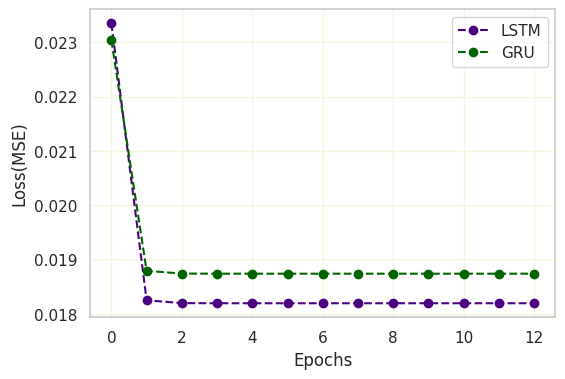

In [ ]:
loss_plot(lstm_loss.iloc[:, 1], gru_loss.iloc[:, 1])

In [ ]:
import matplotlib.patches as patches

In [ ]:
def loss_plot(lstm_loss, gru_loss):
    fig, ax = plt.subplots(figsize=(8, 5))

    # Set a modern theme
    sns.set_theme(style="whitegrid")

    # Colors and line styles
    colors = ['#4B0082', '#228B22']  # Indigo and Forest Green (Hex Codes)
    line_styles = ['-', '--']  # Solid line for LSTM, dashed for GRU

    # Plot LSTM and GRU loss curves with markers
    ax.plot(lstm_loss, linestyle=line_styles[0], marker='o',
            markersize=6, linewidth=2, color=colors[0], label='LSTM')
    ax.plot(gru_loss, linestyle=line_styles[1], marker='s',
            markersize=6, linewidth=2, color=colors[1], label='GRU')

    # Adding titles and labels with better formatting
    ax.set_xlabel("Epochs", fontsize=14, color='#333333')
    ax.set_ylabel("Loss (MSE)", fontsize=14, color='#333333')

    # Customize ticks and grid
    ax.tick_params(axis='both', which='major', labelsize=12, color='#666666')
    ax.grid(True, which='major', linestyle='--', linewidth=0.5, color='gray')

    # Adding legend with improved location and aesthetics
    ax.legend(loc='upper right', fontsize=12, frameon=True,
              framealpha=0.9, edgecolor='black')

    # Add a light background color for visual appeal
    ax.set_facecolor('#FAFAFA')
    fig.patch.set_facecolor('#FFFFFF')

    # Enhance plot borders
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

    # Add a border around the entire figure
    border = patches.Rectangle((0, 0), 1, 1, transform=fig.transFigure,
                               linewidth=1.5, edgecolor='#4D4D4D', facecolor='none')
    fig.patches.append(border)

    # Adjust layout to prevent clipping
    fig.tight_layout()

    # Save the figure with a high DPI
    fig.savefig(output_dir_path + "lstm_gru_loss_plot_improved_with_border.png", dpi=600)
    plt.show()

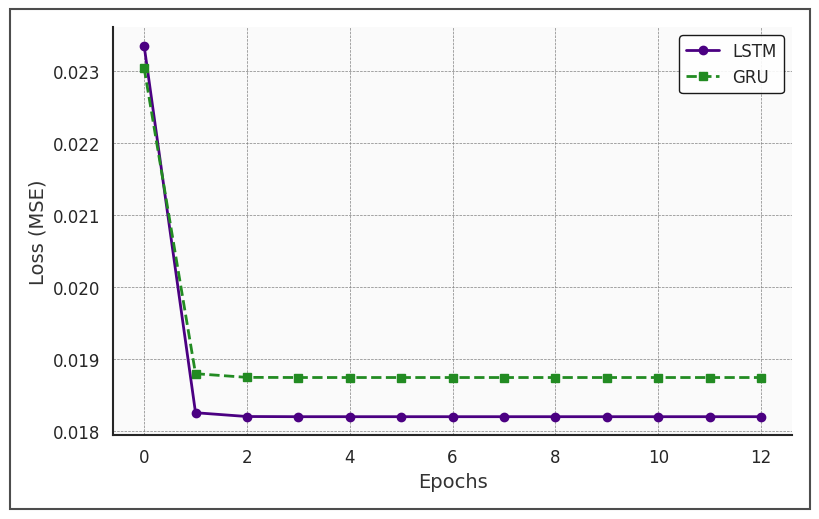

In [ ]:
loss_plot(lstm_loss.iloc[:, 1], gru_loss.iloc[:, 1])


###  **Plot 2: Average Scores Plot**

In [ ]:
#Read avg scores files

lstm_avg_scores = read_df_from_file(output_dir_path+'multiple_lstm_models_average_scores.csv')
gru_avg_scores = read_df_from_file(output_dir_path+'multiple_gru_models_average_scores.csv')

In [ ]:
def avg_test_scores_plot(lstm_avg_scores, gru_avg_scores):
  neurons = [8, 16, 32,  64,  128, 256]



  fig = plt.figure(figsize = (20, 5))
  plt.subplot(131)
  plt.plot(lstm_avg_scores['layers'], lstm_avg_scores['rmse'],
           '-o', linewidth = 2.5, color = 'indigo')
  plt.plot(gru_avg_scores['layers'], gru_avg_scores['rmse'],
           '-o', linewidth = 2.5, color = 'darkgreen')

  plt.xticks([0,1,2,3,4,5], neurons)
  plt.title("RMSE")
  plt.xlabel("Neurons")
  plt.ylabel("Avg. RMSE")
  plt.legend(['LSTM', 'GRU'],  loc = 'best')

  plt.rcParams["axes.edgecolor"] = "0.15"
  plt.rcParams["axes.linewidth"]  = 2.75
  plt.rc('xtick',labelsize=10)
  plt.rc('ytick',labelsize=10)

  plt.subplot(132)
  plt.plot(lstm_avg_scores['layers'], lstm_avg_scores['mape'],
           '-o', linewidth = 2.5, color = 'indigo')
  plt.plot(gru_avg_scores['layers'], gru_avg_scores['mape'],
           '-o', linewidth = 2.5, color = 'darkgreen')

  plt.xticks([0,1,2,3,4,5], neurons)
  plt.title("MAPE")
  plt.xlabel("Neurons")
  plt.ylabel("Avg. MAPE")
  plt.legend(['LSTM', 'GRU'],  loc = 'best')

  plt.rcParams["axes.edgecolor"] = "0.15"
  plt.rcParams["axes.linewidth"]  = 2.75
  plt.rc('xtick',labelsize=10)
  plt.rc('ytick',labelsize=10)


  plt.subplot(133)
  plt.plot(lstm_avg_scores['layers'], lstm_avg_scores['R'],
           '-o', linewidth = 2.5, color = 'indigo')
  plt.plot(gru_avg_scores['layers'], gru_avg_scores['R'],
           '-o', linewidth = 2.5, color = 'darkgreen')
  plt.xticks([0,1,2,3,4,5], neurons)
  plt.title("R")
  plt.xlabel("Neurons")
  plt.ylabel("Avg. R")
  plt.legend(['LSTM', 'GRU'],  loc = 'best')

  plt.rcParams["axes.edgecolor"] = "0.15"
  plt.rcParams["axes.linewidth"]  = 2.75
  plt.rc('xtick',labelsize=10)
  plt.rc('ytick',labelsize=10)

  fig.savefig(output_dir_path+"multiple_avg_scores_plots.png",dpi=600)
  plt.show()

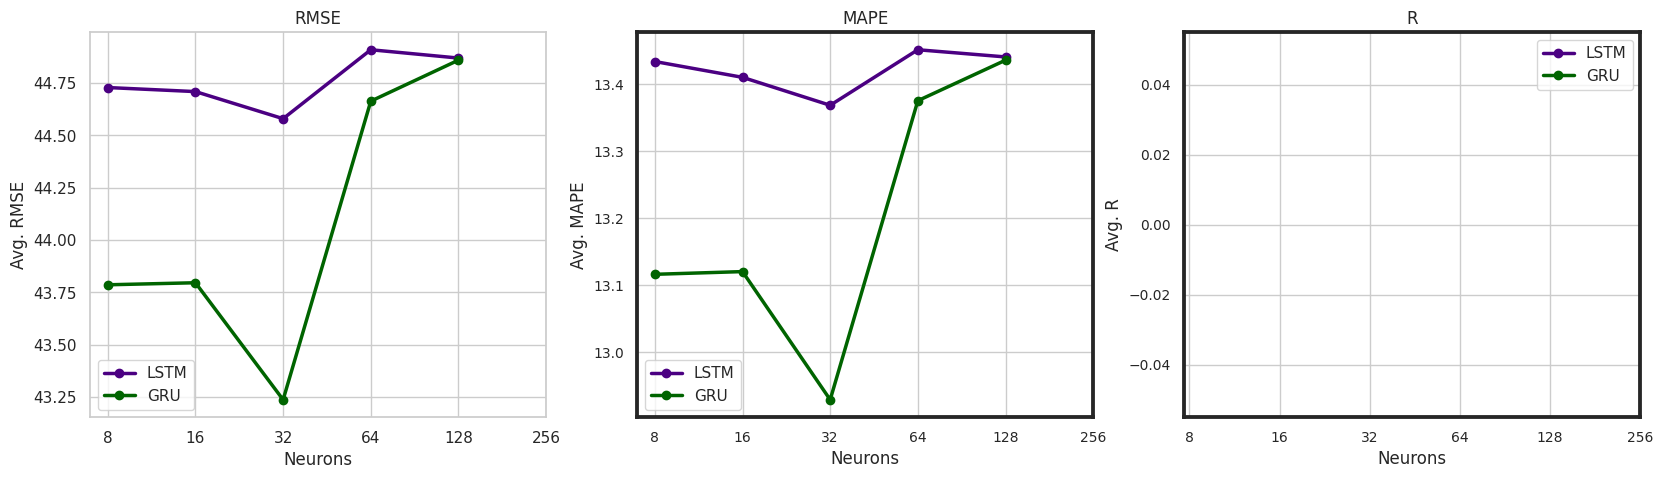

In [ ]:
avg_test_scores_plot(lstm_avg_scores, gru_avg_scores)

###  **Plot 3: True Vs Predicted Plots in Train and Test Data(By best LSTM and GRU)**

In [ ]:
#Read true vs predicted values

y_train = read_df_from_file(output_dir_path+ 'y_train.csv')
y_test =  read_df_from_file(output_dir_path+ 'y_test.csv')
lstm_train_pred = read_df_from_file(output_dir_path+ 'best_lstm_model_train_predictions.csv')
lstm_test_pred = read_df_from_file(output_dir_path+ 'best_lstm_model_test_predictions.csv')
gru_train_pred = read_df_from_file(output_dir_path+ 'best_gru_model_train_predictions.csv')
gru_test_pred = read_df_from_file(output_dir_path + 'best_gru_model_test_predictions.csv')

In [ ]:
def best_model_true_vs_prediction_plot(y_train, y_test,
                                       lstm_train_pred, lstm_test_pred,
                                       gru_train_pred, gru_test_pred):

    ##====== Visualizing true vs predicted plots for training data ========#
    fig1 = plt.figure(figsize=(12, 4))

    # Plot for LSTM on training data
    plt.subplot(121)
    plt.scatter(y_train, lstm_train_pred, marker="+", color='mediumblue')
    plt.xlabel("True")
    plt.ylabel("Predicted")
    plt.title("LSTM")

    # Adding y = x line for LSTM training data
    min_lim = min(min(y_train), min(lstm_train_pred))
    max_lim = max(max(y_train), max(lstm_train_pred))
    min_max_pair = [min_lim, max_lim]
    plt.plot(min_max_pair, min_max_pair,
             linestyle='--', color='red', label='y = x')

    plt.xlim(min_lim, max_lim)
    plt.ylim(min_lim, max_lim)

    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"] = 2.75
    plt.rc('xtick', labelsize=10)
    plt.rc('ytick', labelsize=10)

    # Plot for GRU on training data
    plt.subplot(122)
    plt.scatter(y_train, gru_train_pred, marker="+", color='mediumblue')
    plt.xlabel("True")
    plt.ylabel("Predicted")
    plt.title("GRU")

    # Adding y = x line for GRU training data
    min_lim = min(min(y_train), min(gru_train_pred))
    max_lim = max(max(y_train), max(gru_train_pred))
    min_max_pair = [min_lim, max_lim]
    plt.plot(min_max_pair, min_max_pair,
             linestyle='--', color='red', label='y = x')

    plt.xlim(min_lim, max_lim)
    plt.ylim(min_lim, max_lim)

    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"] = 2.75
    plt.rc('xtick', labelsize=10)
    plt.rc('ytick', labelsize=10)

    # Save the figure for training data
    fig1.savefig(output_dir_path + "true_vs_prediction_plot_train_data.png", dpi=600)

    ##====== Visualizing true vs predicted plots for test data ========#
    fig2 = plt.figure(figsize=(12, 4))

    # Plot for LSTM on test data
    plt.subplot(121)
    plt.scatter(y_test, lstm_test_pred, marker="+", color='mediumblue')
    plt.xlabel("True")
    plt.ylabel("Predicted")
    plt.title("LSTM")

    # Adding y = x line for LSTM test data
    min_lim = min(min(y_test), min(lstm_test_pred))
    max_lim = max(max(y_test), max(lstm_test_pred))
    min_max_pair = [min_lim, max_lim]
    plt.plot(min_max_pair, min_max_pair,
             linestyle='--', color='red', label='y = x')

    plt.xlim(min_lim, max_lim)
    plt.ylim(min_lim, max_lim)

    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"] = 2.75
    plt.rc('xtick', labelsize=10)
    plt.rc('ytick', labelsize=10)

    # Plot for GRU on test data
    plt.subplot(122)
    plt.scatter(y_test, gru_test_pred, marker="+", color='mediumblue')
    plt.xlabel("True")
    plt.ylabel("Predicted")
    plt.title("GRU")

    # Adding y = x line for GRU test data
    min_lim = min(min(y_test), min(gru_test_pred))
    max_lim = max(max(y_test), max(gru_test_pred))
    min_max_pair = [min_lim, max_lim]
    plt.plot(min_max_pair, min_max_pair,
             linestyle='--', color='red', label='y = x')

    plt.xlim(min_lim, max_lim)
    plt.ylim(min_lim, max_lim)

    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"] = 2.75
    plt.rc('xtick', labelsize=10)
    plt.rc('ytick', labelsize=10)

    # Save the figure for test data
    fig2.savefig(output_dir_path + "true_vs_prediction_plot_test_data.png", dpi=600)
    plt.show()

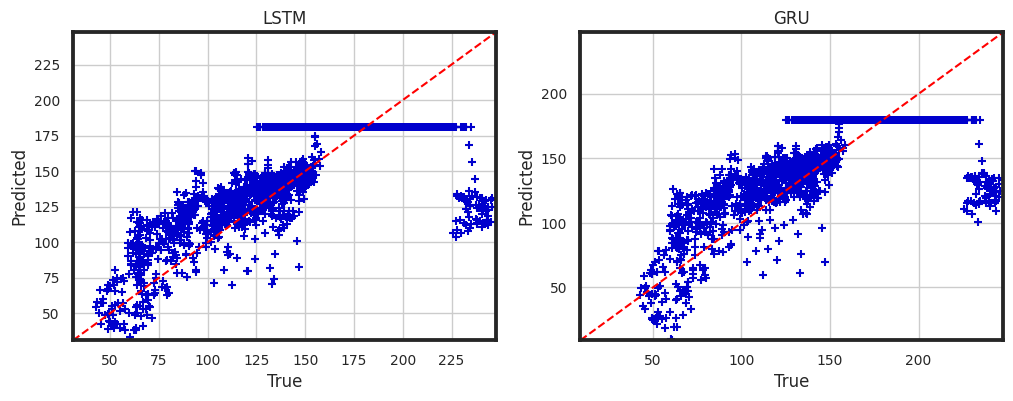

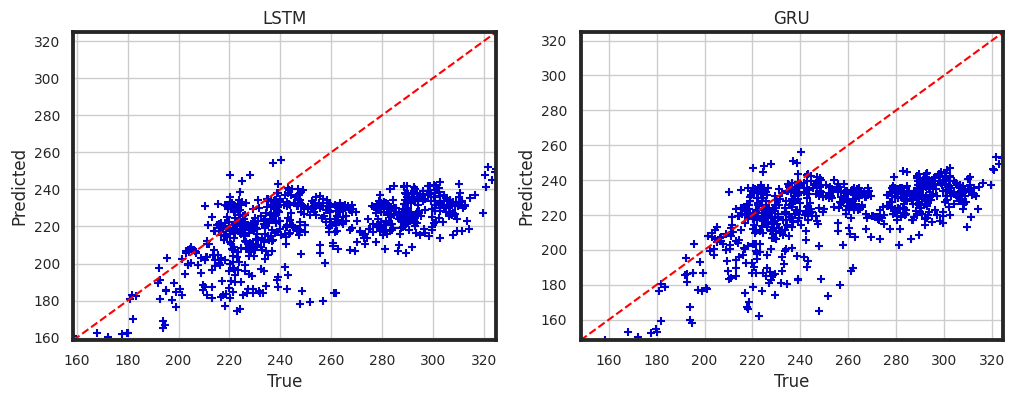

In [ ]:
# true vs  predicted
best_model_true_vs_prediction_plot(y_train.iloc[:,1],
                                   y_test.iloc[:,1],
                                   lstm_train_pred.iloc[:,1],
                                   lstm_test_pred.iloc[:,1],
                                   gru_train_pred.iloc[:,1],
                                   gru_test_pred.iloc[:,1])

### **Plot 4: Prediction Plots Given by Best LSTM and GRU**

In [ ]:
def best_model_prediction_plot(time_step,
                               data,
                               y_train,
                               y_test,
                               lstm_train_pred,
                               lstm_test_pred,
                               gru_train_pred,
                               gru_test_pred):

    # Plot for LSTM and GRU (Train Data Only)
    fig_train = plt.figure(figsize=(12, 5))

    # LSTM Train Plot
    plt.subplot(121)

    # # Initialize arrays to plot train predictions
    # train_predict_plot_data = np.empty_like(y_train)
    # train_predict_plot_data[:] = np.nan

    # # Assign train predictions for LSTM
    # train_predict_plot_data = lstm_train_pred

    # Plot true values and LSTM train predictions
    plt.plot(y_train, 'k', linewidth=1.5)
    plt.plot(lstm_train_pred, 'mediumblue', linewidth=1.5)
    plt.xlabel('')
    plt.ylabel('Number of Passengers')
    plt.title("LSTM")

    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"] = 2.75
    plt.rc('xtick', labelsize=10)
    plt.rc('ytick', labelsize=10)

    plt.legend(['True value', 'Predicted value (Train set)'], loc='best')

    # GRU Train Plot
    plt.subplot(122)

    # # Reinitialize the arrays for GRU
    # train_predict_plot_data = np.empty_like(y_train)
    # train_predict_plot_data[:] = np.nan

    # # Assign train predictions for GRU
    # train_predict_plot_data[time_step:len(gru_train_pred) + time_step] = gru_train_pred

    # Plot true values and GRU train predictions
    plt.plot(y_train, 'k', linewidth=1.5)
    plt.plot(gru_train_pred, 'mediumblue', linewidth=1.5)
    plt.xlabel('')
    plt.ylabel('Number of Passengers')
    plt.title("GRU")

    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"] = 2.75
    plt.rc('xtick', labelsize=10)
    plt.rc('ytick', labelsize=10)

    plt.legend(['True value', 'Predicted value (Train set)'], loc='best')

    # Save the train-only plot
    fig_train.savefig(output_dir_path + "best_model_predictions_train_data.png", dpi=600)

    # Plot for LSTM and GRU (Test Data Only)
    fig_test = plt.figure(figsize=(12, 5))

    # LSTM Test Plot
    plt.subplot(121)

    # Plot true values for the test data portion and LSTM test predictions
    plt.plot(y_test, linewidth=1.5)
    plt.plot(lstm_test_pred, 'darkgreen', linewidth=1.5)
    plt.xlabel('')
    plt.ylabel('Number of Passengers')
    plt.title("LSTM")

    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"] = 2.75
    plt.rc('xtick', labelsize=10)
    plt.rc('ytick', labelsize=10)

    plt.legend(['True value', 'Predicted value (Test set)'], loc='best')

    # GRU Test Plot
    plt.subplot(122)

    # Plot true values for the test data portion and GRU test predictions
    plt.plot(y_test, 'k', linewidth=1.5)
    plt.plot(gru_test_pred, 'darkgreen', linewidth=1.5)
    plt.xlabel('')
    plt.ylabel('Number of Passengers')
    plt.title("GRU")

    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"] = 2.75
    plt.rc('xtick', labelsize=10)
    plt.rc('ytick', labelsize=10)

    plt.legend(['True value', 'Predicted value (Test set)'], loc='best')

    # Save the test-only plot
    fig_test.savefig(output_dir_path + "best_model_predictions_test_data.png", dpi=600)

    plt.show()

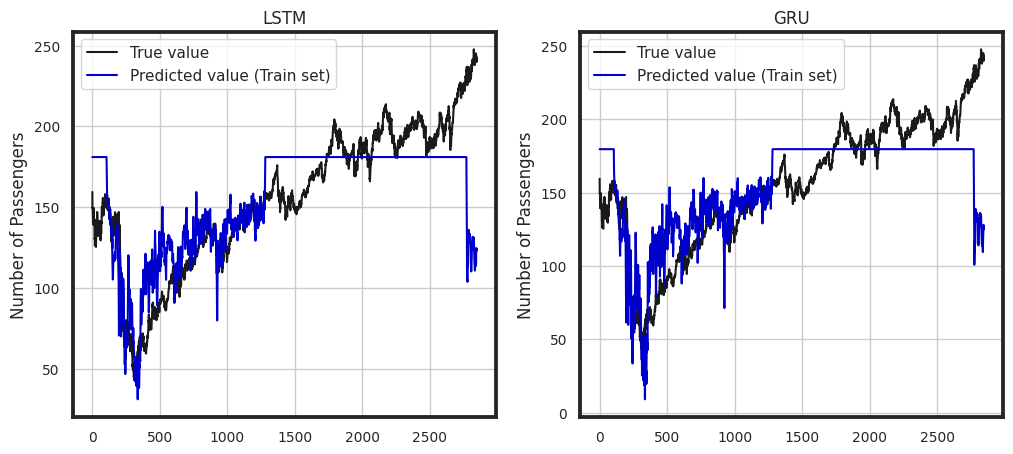

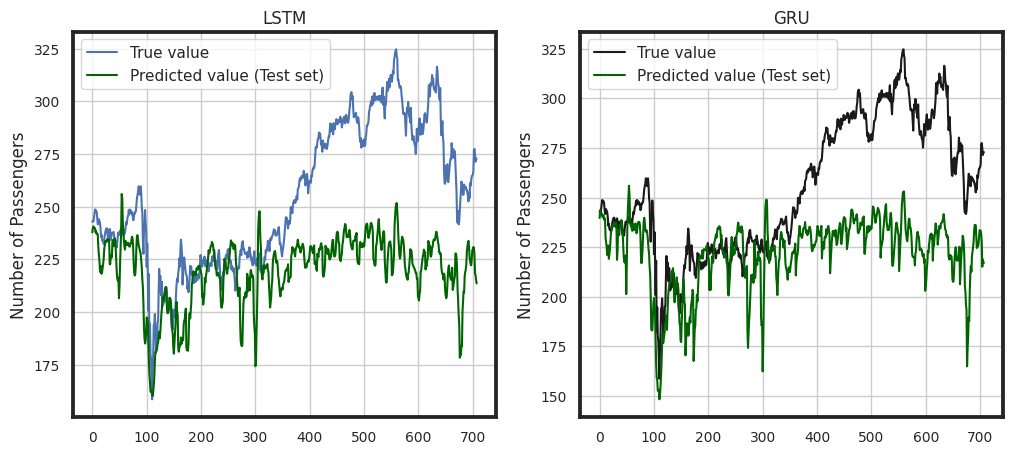

In [ ]:
best_model_prediction_plot(5, data1,
                                   y_train.iloc[:,1],
                                   y_test.iloc[:,1],
                                   lstm_train_pred.iloc[:,1],
                                   lstm_test_pred.iloc[:,1],
                                   gru_train_pred.iloc[:,1],
                                   gru_test_pred.iloc[:,1])

### **Plot 5: Comparative RMSE Boxplots of Best LSTM and GRU**

In [ ]:
#Read best rmse files

best_lstm_rmse = read_df_from_file(output_dir_path+ 'best_lstm_model_all_rmse.csv')
best_gru_rmse = read_df_from_file(output_dir_path+ 'best_gru_model_all_rmse.csv')

def best_model_comparative_rmse_boxplots(lstm_rmse, gru_rmse):
  data = pd.DataFrame()
  data['LSTM'] = lstm_rmse
  data['GRU'] = gru_rmse

  fig = plt.figure(figsize = (8,4))
  p = plt.boxplot(data, patch_artist= True)
  colors = ['mediumblue', 'darkgreen']
  for i, box in enumerate(p['boxes']):
    box.set(color= 'blue', linewidth = 1.2)
    # change fill color
    box.set(facecolor = colors[i])
  plt.xticks([1,2], ['LSTM','GRU'])
  plt.ylabel('RMSE')

  plt.rcParams["axes.edgecolor"] = "0.15"
  plt.rcParams["axes.linewidth"]  = 2.75
  plt.rc('xtick',labelsize=10)
  plt.rc('ytick',labelsize=10)

  fig.savefig(output_dir_path+"comparative_rmse_boxplots.png",dpi=600)
  plt.show()


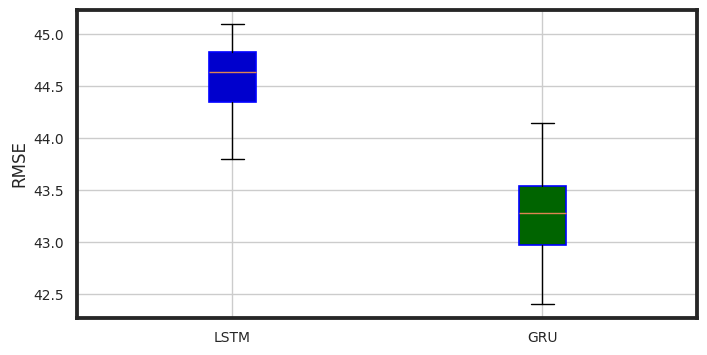

In [ ]:
best_model_comparative_rmse_boxplots(best_lstm_rmse.iloc[:,1], best_gru_rmse.iloc[:,1])

### **Plot6: All score boxplots**

In [ ]:
# Read all scores files
lstm_all_rmse = read_df_from_file(output_dir_path +'multiple_lstm_models_all_rmse.csv')
lstm_all_mape = read_df_from_file(output_dir_path+'multiple_lstm_models_all_mape.csv')
lstm_all_R = read_df_from_file(output_dir_path+'multiple_lstm_models_all_R.csv')

gru_all_rmse = read_df_from_file(output_dir_path+'multiple_gru_models_all_rmse.csv')
gru_all_mape = read_df_from_file(output_dir_path+'multiple_gru_models_all_mape.csv')
gru_all_R = read_df_from_file(output_dir_path+'multiple_gru_models_all_R.csv')

In [ ]:
def all_scores_boxplot(lstm_rmse, lstm_mape, lstm_R,  gru_rmse, gru_mape, gru_R):

  neurons = [8, 16, 32,  64,  128, 256]



  fig = plt.figure(figsize = (19,4))
  plt.subplot(131)
  p1 = plt.boxplot(lstm_rmse.T, patch_artist=True)
  for i, box in enumerate(p1['boxes']):
    # change outline color
    box.set(color= 'blue', linewidth = 1.2)
    # change fill color
    box.set(facecolor = 'mediumblue')
  plt.xticks([1,2,3,4,5,6], neurons)
  plt.title("RMSE")
  plt.xlabel('Number of LSTM neurons')
  plt.ylabel('RMSE')

  plt.rcParams["axes.edgecolor"] = "0.15"
  plt.rcParams["axes.linewidth"]  = 2.75
  plt.rc('xtick',labelsize=10)
  plt.rc('ytick',labelsize=10)



  plt.subplot(132)
  p2 = plt.boxplot(lstm_mape.T, patch_artist=True)
  for i, box in enumerate(p2['boxes']):
    # change outline color
    box.set(color= 'blue', linewidth = 1.2)
    # change fill color
    box.set(facecolor = 'indigo')
  plt.xticks([1,2,3,4,5,6], neurons)
  plt.title("MAPE")
  plt.xlabel('Number of LSTM neurons')
  plt.ylabel('MAPE')

  plt.rcParams["axes.edgecolor"] = "0.15"
  plt.rcParams["axes.linewidth"]  = 2.75
  plt.rc('xtick',labelsize=10)
  plt.rc('ytick',labelsize=10)

  plt.subplot(133)
  p3 = plt.boxplot(lstm_R.T, patch_artist=True)
  for i, box in enumerate(p3['boxes']):
    # change outline color
    box.set(color= 'blue', linewidth = 1.2)
    # change fill color
    box.set(facecolor = 'darkgreen')
  plt.xticks([1,2,3,4,5,6], neurons)
  plt.title("R")
  plt.xlabel('Number of LSTM neurons')
  plt.ylabel('R')

  plt.rcParams["axes.edgecolor"] = "0.15"
  plt.rcParams["axes.linewidth"]  = 2.75
  plt.rc('xtick',labelsize=10)
  plt.rc('ytick',labelsize=10)

  fig.savefig(output_dir_path+"lstm_all_scores_boxplots.png",dpi=600)


  fig = plt.figure(figsize = (19,4))
  plt.subplot(131)
  p4 = plt.boxplot(gru_rmse.T, patch_artist=True)
  for i, box in enumerate(p4['boxes']):
    # change outline color
    box.set(color= 'blue', linewidth = 1.2)
    # change fill color
    box.set(facecolor = 'mediumblue')
  plt.xticks([1,2,3,4,5,6], neurons)
  plt.title("RMSE")
  plt.xlabel('Number of GRU neurons')
  plt.ylabel('RMSE')

  plt.rcParams["axes.edgecolor"] = "0.15"
  plt.rcParams["axes.linewidth"]  = 2.75
  plt.rc('xtick',labelsize=10)
  plt.rc('ytick',labelsize=10)


  plt.subplot(132)
  p5 = plt.boxplot(gru_mape.T, patch_artist=True)
  for i, box in enumerate(p5['boxes']):
    # change outline color
    box.set(color= 'blue', linewidth = 1.2)
    # change fill color
    box.set(facecolor = 'indigo')
  plt.xticks([1,2,3,4,5,6], neurons)
  plt.title("MAPE")
  plt.xlabel('Number of GRU neurons')
  plt.ylabel('MAPE')

  plt.rcParams["axes.edgecolor"] = "0.15"
  plt.rcParams["axes.linewidth"]  = 2.75
  plt.rc('xtick',labelsize=10)
  plt.rc('ytick',labelsize=10)


  plt.subplot(133)
  p6 = plt.boxplot(gru_R.T, patch_artist=True)
  for i, box in enumerate(p6['boxes']):
    # change outline color
    box.set(color= 'blue', linewidth = 1.2)
    # change fill color
    box.set(facecolor = 'darkgreen')
  plt.xticks([1,2,3,4,5,6], neurons)
  plt.title("R")
  plt.xlabel('Number of GRU neurons')
  plt.ylabel('R')

  plt.rcParams["axes.edgecolor"] = "0.15"
  plt.rcParams["axes.linewidth"]  = 2.75
  plt.rc('xtick',labelsize=10)
  plt.rc('ytick',labelsize=10)

  fig.savefig(output_dir_path+"gru_all_scores_boxplots.png",dpi=600)
  plt.show()


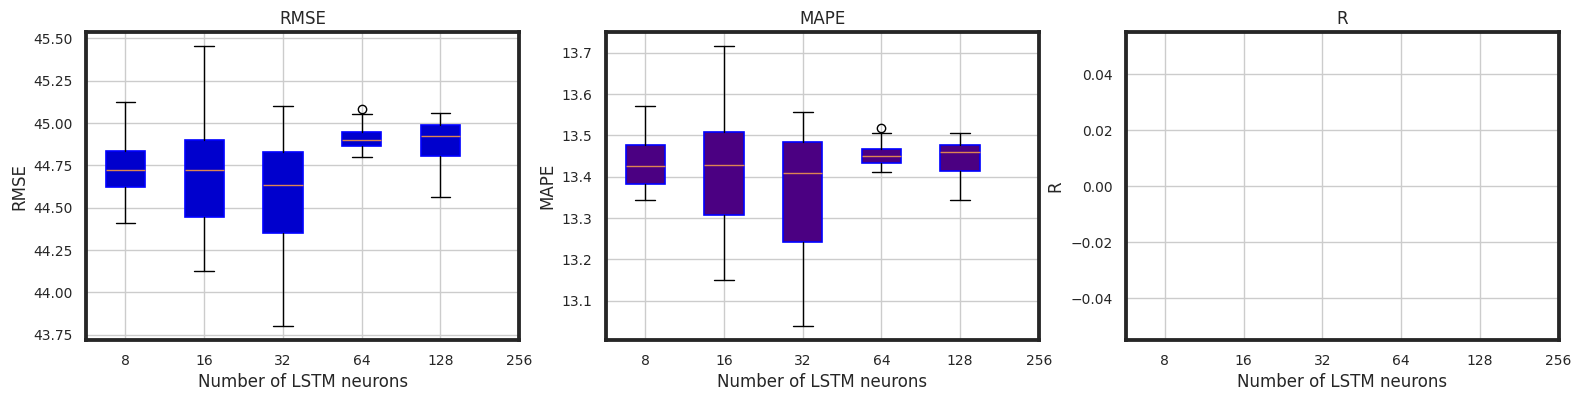

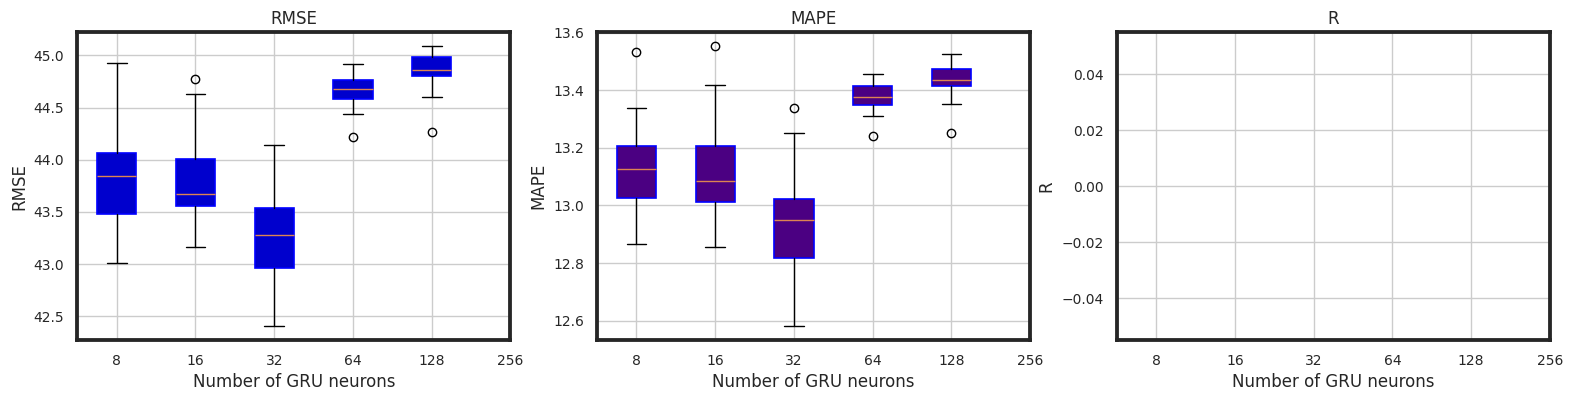

In [ ]:
all_scores_boxplot(lstm_all_rmse.iloc[:, 1:], lstm_all_mape.iloc[:, 1:],  lstm_all_R.iloc[:, 1:],
                      gru_all_rmse.iloc[:, 1:], gru_all_mape.iloc[:, 1:], gru_all_R.iloc[:, 1:])

### **Plot 7: Statistical Analysis**

In [ ]:

def comparative_qq_plots(data1, data2):
  fig = plt.figure(figsize = (16,5))
  ax1= fig.add_subplot(121)
  scipy.stats.probplot(data1, dist=scipy.stats.norm, sparams=(0,1), plot=ax1)
  ax1.get_lines()[0].set_marker('o')
  ax1.get_lines()[0].set_markerfacecolor('mediumblue')
  ax1.get_lines()[0].set_markersize(8.0)
  ax1.get_lines()[1].set_linewidth(3.0)
  plt.title("(a)")

  plt.rcParams["axes.edgecolor"] = "0.15"
  plt.rcParams["axes.linewidth"]  = 2.75
  plt.rc('xtick',labelsize=10)
  plt.rc('ytick',labelsize=10)


  ax2= fig.add_subplot(122)
  scipy.stats.probplot(data2, dist=scipy.stats.norm, sparams=(0,1), plot=ax2)
  ax2.get_lines()[0].set_marker('o')
  ax2.get_lines()[0].set_markerfacecolor('mediumblue')
  ax2.get_lines()[0].set_markersize(8.0)
  ax2.get_lines()[1].set_linewidth(3.0)
  plt.title("(b)")


  plt.rcParams["axes.edgecolor"] = "0.15"
  plt.rcParams["axes.linewidth"]  = 2.75
  plt.rc('xtick',labelsize=10)
  plt.rc('ytick',labelsize=10)


  fig.savefig(output_dir_path+ "best_model_rmse_qq_plots.png",dpi=600)
  plt.show()



import scipy

def perform_normality_test(lstm_rmse, gru_rmse):
  print("Performaing Normality Tests\n")
  print("lstm_rmse: ")
  print(scipy.stats.normaltest(lstm_rmse))
  print("gru_rmse:")
  print(scipy.stats.normaltest(gru_rmse))

def perform_pairwise_ttests(lstm_rmse, gru_rmse):

  print("\n Two-sample ttest between lstm_rmse and  gru_rmse")
  print(scipy.stats.ttest_ind(lstm_rmse, gru_rmse, equal_var = False))



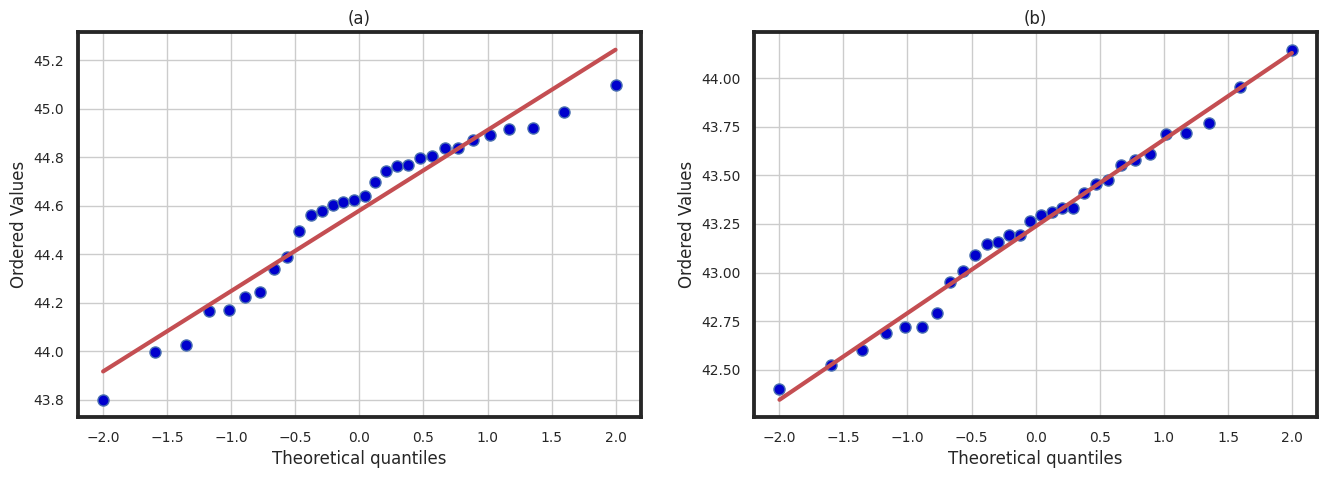

Performaing Normality Tests

lstm_rmse: 
NormaltestResult(statistic=2.799371810469947, pvalue=0.24667443092240185)
gru_rmse:
NormaltestResult(statistic=0.22255513266568677, pvalue=0.8946903785335959)

 Two-sample ttest between lstm_rmse and  gru_rmse
TtestResult(statistic=13.551402680961557, pvalue=4.817277775468147e-19, df=54.18771093600343)


In [ ]:
comparative_qq_plots(best_lstm_rmse.iloc[:,1], best_gru_rmse.iloc[:,1])
perform_normality_test(best_lstm_rmse.iloc[:,1], best_gru_rmse.iloc[:,1])
perform_pairwise_ttests(best_lstm_rmse.iloc[:,1], best_gru_rmse.iloc[:,1])

#**Summarry**

Overall I think the GRU model would be the best model to use with this dataset. It preformed better with most different amounts of neurons than the LSTM model.We can see this in the box plots for RMSE and MAPE. The best model for GRU had signficantly lower RMSE than the LSTM. For neurons 8-32 GRU's MAPE and RMSE means were all lower than LSTM and also had a more compact IQR, however they did have outliers which we do not see in the other model. For neurons 64 and 128 LSTM actually had similar RMSE and MAPE as the GRU model. We can see in the true versus predicted plots that both models are clustered around the true values which means they are both performing well. The GRU model's clsuters appears tighter than the LSTM model however.